In [1]:
import os
import json
import numpy as np
import torch

import matplotlib.pyplot as plt
# plt.style.use('dark_background')
import seaborn as sns
import scipy

import matplotlib.lines as mlines

In [2]:
def sample_colormap(colormap_name, n):
    # Get the colormap
    colormap = plt.get_cmap(colormap_name)
    # Generate n evenly spaced values between 0 and 1
    values = np.linspace(0, 1, n)
    # Map the values to colors in the colormap
    colors = colormap(values)
    return colors

In [3]:
from quality_metrics.common import load_dataset, save_dataset

/home/laetitia/miniconda3/envs/aces/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
quality_key = 'norm_pp_diff'

In [23]:
# create new dataset.json with train puzzles not in the generated sets
# ds = json.load(open('data/dataset.json', 'r'))
len(ds)

4138

In [24]:
train = [p for p in ds if p['origin'] == 'train']
aces = [p for p in ds if p['origin'] == 'aces']
elm = [p for p in ds if p['origin'] == 'elm']
rd_gen = [p for p in ds if p['origin'] == 'rd_gen']

In [25]:
aces = aces[133:]
elm = elm[133:]
rd_gen = rd_gen[133:]

In [26]:
new_ds = train + rd_gen + elm + aces
len(new_ds)

3739

In [27]:
json.dump(new_ds, open('data/dataset.json', 'w'))

In [106]:
path_train_archive = 'data/dataset_quality_puzzles_train_1.json'
path_test_archive = 'data/dataset_quality_puzzles_test_1.json'

In [107]:
dataset_train_archive = load_dataset(path_train_archive)
dataset_test_archive = load_dataset(path_test_archive)

In [100]:
train = [p for p in dataset_train_archive if p.origin == 'train'] 
aces = [p for p in dataset_train_archive if p.origin == 'aces']
rd_gen = [p for p in dataset_train_archive if p.origin == 'rd_gen']
elm = [p for p in dataset_train_archive if p.origin == 'elm']
aces = aces[133:]
elm = elm[133:]
rd_gen = rd_gen[133:]
dataset_train_archive = train + aces + rd_gen + elm

In [101]:
len(dataset_train_archive)

3739

In [102]:
train = [p for p in dataset_test_archive if p.origin == 'train'] 
aces = [p for p in dataset_test_archive if p.origin == 'aces']
rd_gen = [p for p in dataset_test_archive if p.origin == 'rd_gen']
elm = [p for p in dataset_test_archive if p.origin == 'elm']
aces = aces[133:]
elm = elm[133:]
rd_gen = rd_gen[133:]
dataset_test_archive = train + aces + rd_gen + elm
len(dataset_test_archive)

In [104]:
save_dataset(dataset_train_archive, path_train_archive)
save_dataset(dataset_test_archive, path_test_archive)

In [70]:
archive = json.load(open('data/puzzles_train_1.json'))

In [71]:
len(archive)

155

In [72]:
dataset_train_archive[-1].origin

'elm'

In [73]:
dataset_test_archive[0]

Problem(idx='Study_1:0', instruction="def f(s: str):\n    return s.count('o') == 1000 and s.count('oo') == 0", completion="def g():\n    return ('h' + 'o') * 1000", quality={'pp_diff': [0.0023380517959594727, 0.10596907138824463, 0.0494387149810791, 0.30987727642059326, 0.040902674198150635, 0.22684389352798462, 0.21948015689849854, -0.11063385009765625, -0.00885772705078125, -0.040248334407806396, 0.17260026931762695, 0.007615908980369568, 0.040866777300834656, 0.17046508193016052, 0.03105539083480835, -0.011733829975128174, 0.01764678955078125, 0.05050551891326904, 0.013381481170654297, -0.021967291831970215, -0.011910200119018555, 0.0014266371726989746, -0.08751416206359863, -0.013999700546264648, -0.06381487846374512, 0.02564111351966858, 0.2533515691757202, 0.03788793087005615, -0.01823246479034424, 0.03134909272193909, 0.0882071852684021, -0.013782501220703125, 0.17570200562477112, -0.052751779556274414, 0.060194820165634155, 0.028481483459472656, -0.03282570838928223, 0.18012660

(array([ 2.,  0.,  2.,  0.,  0.,  1.,  3.,  2.,  4., 14., 18., 19., 14.,
         9.,  5.,  5.,  5.,  2.,  2.,  2.,  2.,  2.,  3.,  1.,  1.,  1.,
         4.,  2.,  1.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,  2.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.29902333, -0.27215814, -0.24529296, -0.21842777, -0.19156259,
        -0.1646974 , -0.13783221, -0.11096703, -0.08410184, -0.05723666,
        -0.03037147, -0.00350628,  0.0233589 ,  0.05022409,  0.07708928,
         0.10395446,  0.13081965,  0.15768483,  0.18455002,  0.21141521,
         0.23828039,  0.26514558,  0.29201076,  0.31887595,  0.34574114,
         0.37260632,  0.39947151,  0.42633669,  0.45320188,  0.480067

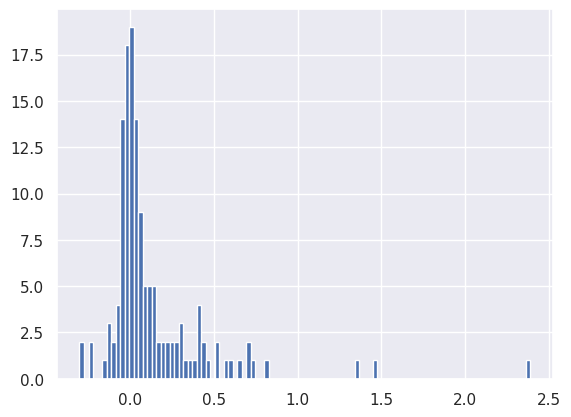

In [74]:
plt.hist(dataset_train_archive[0].quality[quality_key], bins=100)

(array([ 1.,  0.,  3.,  3.,  4.,  3.,  0.,  4.,  4.,  3.,  9.,  9., 15.,
        19.,  7.,  5.,  5.,  5.,  5.,  2.,  2.,  3.,  1.,  1.,  2.,  0.,
         1.,  3.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  2.,  0.,  1.,
         0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.29136807, -0.26835677, -0.24534547, -0.22233418, -0.19932288,
        -0.17631159, -0.15330029, -0.13028899, -0.1072777 , -0.0842664 ,
        -0.0612551 , -0.03824381, -0.01523251,  0.00777879,  0.03079008,
         0.05380138,  0.07681267,  0.09982397,  0.12283527,  0.14584656,
         0.16885786,  0.19186916,  0.21488045,  0.23789175,  0.26090305,
         0.28391434,  0.30692564,  0.32993694,  0.35294823,  0.375959

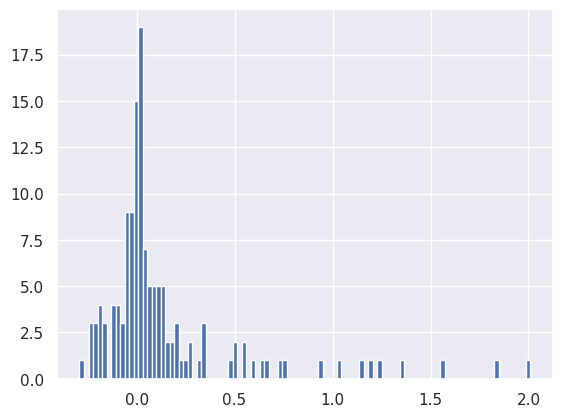

In [75]:
plt.hist(dataset_train_archive[1].quality[quality_key], bins=100)

(array([ 1.,  0.,  0.,  1.,  1.,  1.,  1.,  3.,  5.,  4.,  3.,  4.,  6.,
         7., 15., 13., 17.,  8.,  6.,  6.,  2.,  2.,  2.,  2.,  3.,  2.,
         1.,  2.,  1.,  2.,  1.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.30874464, -0.28913964, -0.26953465, -0.24992965, -0.23032465,
        -0.21071966, -0.19111466, -0.17150967, -0.15190467, -0.13229967,
        -0.11269468, -0.09308968, -0.07348469, -0.05387969, -0.03427469,
        -0.0146697 ,  0.0049353 ,  0.0245403 ,  0.04414529,  0.06375029,
         0.08335528,  0.10296028,  0.12256528,  0.14217027,  0.16177527,
         0.18138026,  0.20098526,  0.22059026,  0.24019525,  0.259800

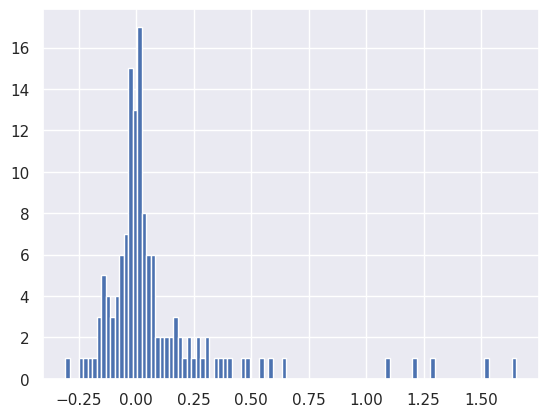

In [76]:
plt.hist(dataset_train_archive[2].quality[quality_key], bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  1.,
         2.,  1.,  2.,  1.,  5.,  3.,  2.,  7.,  5.,  4.,  5.,  3.,  9.,
         6., 10.,  7.,  9., 10.,  3.,  5.,  1.,  3.,  3.,  4.,  2.,  1.,
         0.,  3.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.58107358, -0.56709611, -0.55311864, -0.53914116, -0.52516369,
        -0.51118622, -0.49720875, -0.48323127, -0.4692538 , -0.45527633,
        -0.44129885, -0.42732138, -0.41334391, -0.39936644, -0.38538896,
        -0.37141149, -0.35743402, -0.34345654, -0.32947907, -0.3155016 ,
        -0.30152413, -0.28754665, -0.27356918, -0.25959171, -0.24561424,
        -0.23163676, -0.21765929, -0.20368182, -0.18970434, -0.175726

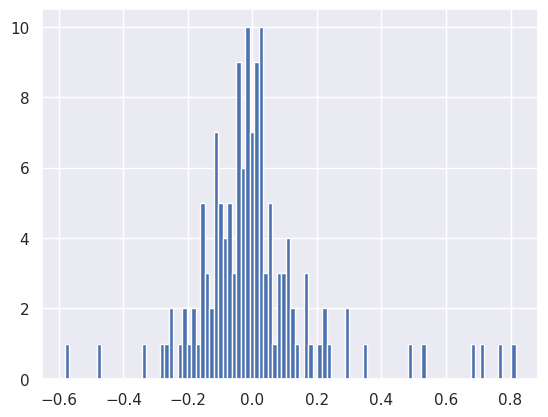

In [77]:
plt.hist(dataset_train_archive[-1].quality[quality_key], bins=100)

In [78]:
stds = []
for i, el in enumerate(dataset_train_archive):
    try:
        stds.append(np.std(el.quality[quality_key]))
    except:
        print(i)

20
45
46
47
48
49
81
82
83
225
226
343
345
346
347
348
349
350
351
352
354
360
374
402
605
667
718
771


In [79]:
min(stds)

0.14314780325938742

In [80]:
max(stds)

6.309001983327821

In [81]:
mins = [min(el.quality[quality_key]) for el in dataset_train_archive if quality_key in el.quality]

In [82]:
max(mins)

-0.1163150817155838

In [83]:
min(mins)

-0.807263195514679

In [84]:
maxs = [min(el.quality[quality_key]) for el in dataset_train_archive if quality_key in el.quality]

In [109]:
# heatmap for puzzles vs ref puzzles

# filter puzzles
dataset_train_archive = [p for p in dataset_train_archive if quality_key in p.quality]
dataset_test_archive = [p for p in dataset_test_archive if quality_key in p.quality]

# train set puzzles
matrix_train = torch.tensor([p.quality[quality_key] for p in dataset_train_archive])
matrix_test = torch.tensor([p.quality[quality_key] for p in dataset_test_archive])

In [86]:
def plot_matrix(matrix, vmin=None, vmax=None, xmin=None, xmax=None):
    plt.rcdefaults()
    #     matrix[0, 3] = 1
    ymin = 0
    ymax = matrix.shape[1]
    if xmin is None:
        xmin = 0
    if xmax is None:
        xmax = matrix.shape[0]
    
    plt.figure(dpi=300)
    if vmin is not None and vmax is not None:
        plt.imshow(matrix, cmap='viridis', vmin=vmin, vmax=vmax, extent=[ymin, ymax, xmin, xmax])
    else:
        plt.imshow(matrix, cmap='viridis', extent=[xmin, xmax, ymin, ymax])

    # for i in range(len(matrix)):
    #     for j in range(len(matrix[i])):
    # #         print(matrix[i, j] * 1000)
    #         if matrix[i, j].item() >= 0:
    #             t = '+'
    #         else:
    #             t = '-'
    #         text = plt.text(j, i, t,
    #                         ha="center", va="center", color="black", fontsize=12)
    
    # Display the plot
    plt.colorbar()  # To show the color bar
    plt.title('Prediction progress matrix')

    plt.show()
    
    sns.set_theme()

In [87]:
matrix_train.shape
train_min = matrix_train.min()
train_max = matrix_train.max()
test_min = matrix_test.min()
test_max = matrix_test.max()
total_min = min(train_min, test_min)
total_max = max(train_max, test_max)

In [88]:
print(dataset_train_archive[3170].completion)

def g():
    return 'level'


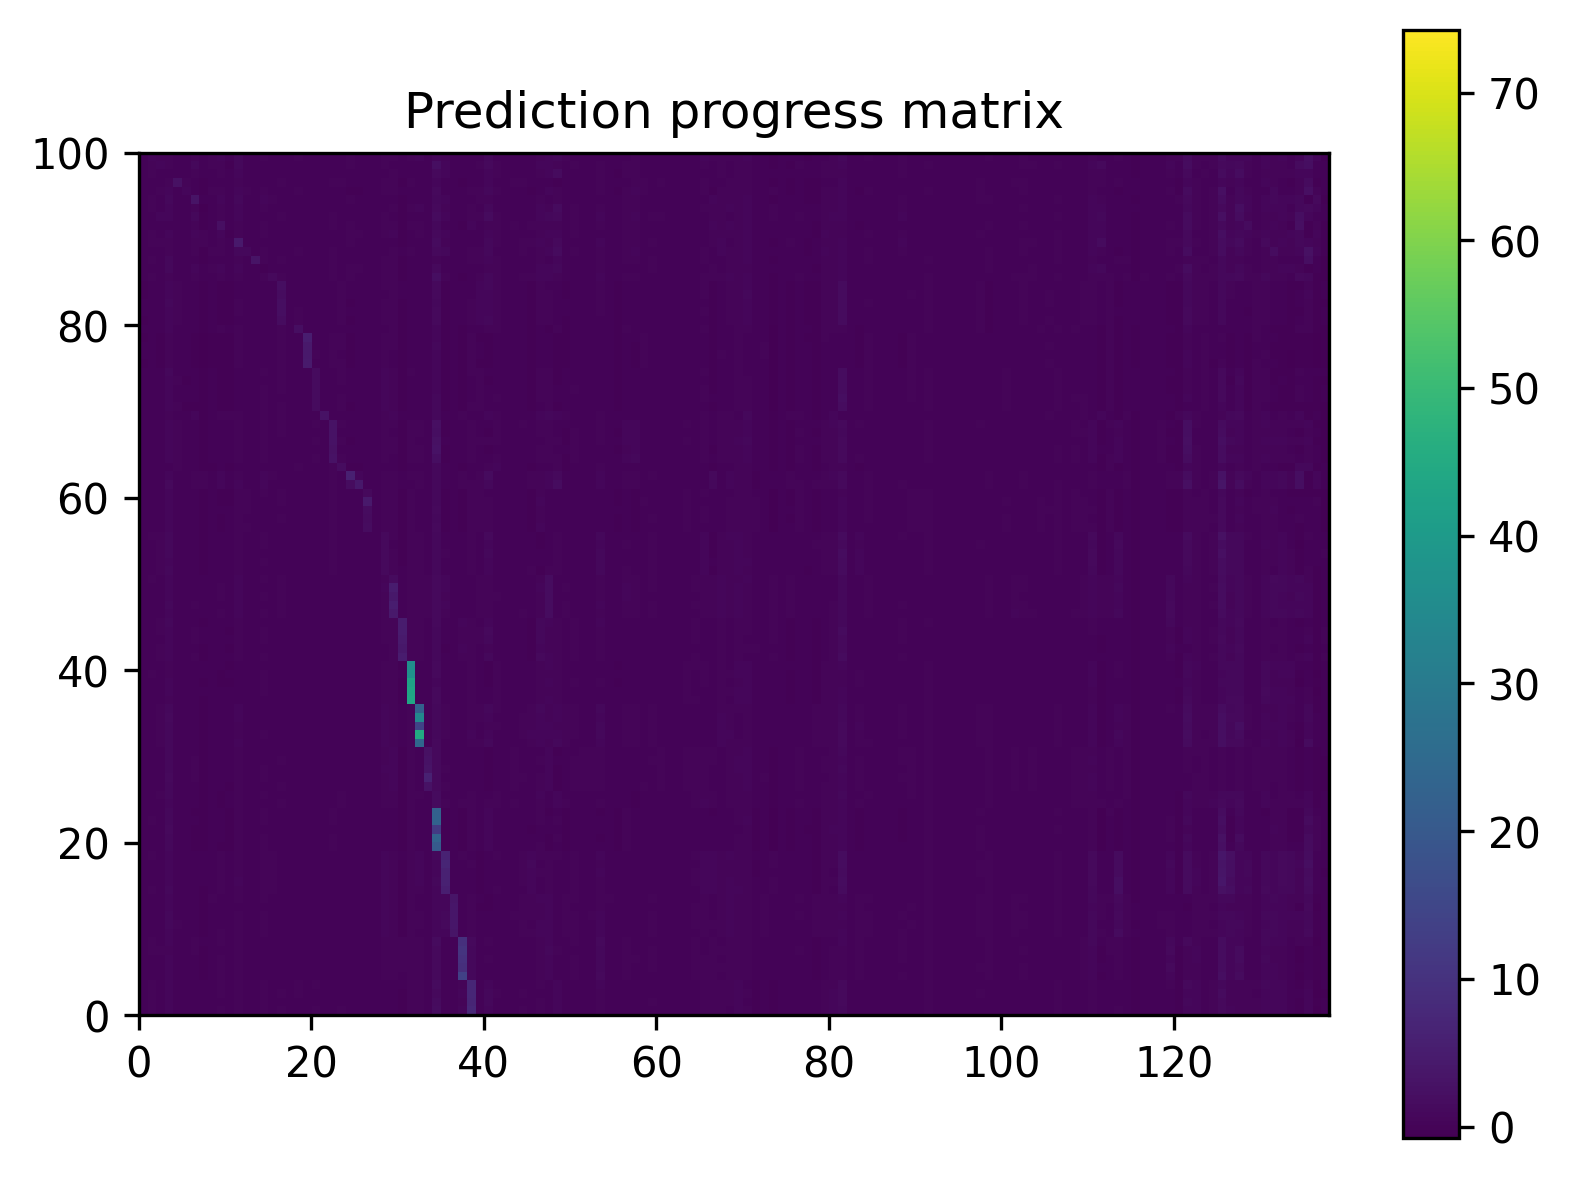

In [89]:
plot_matrix(matrix_train[:100], vmin=total_min, vmax=total_max)

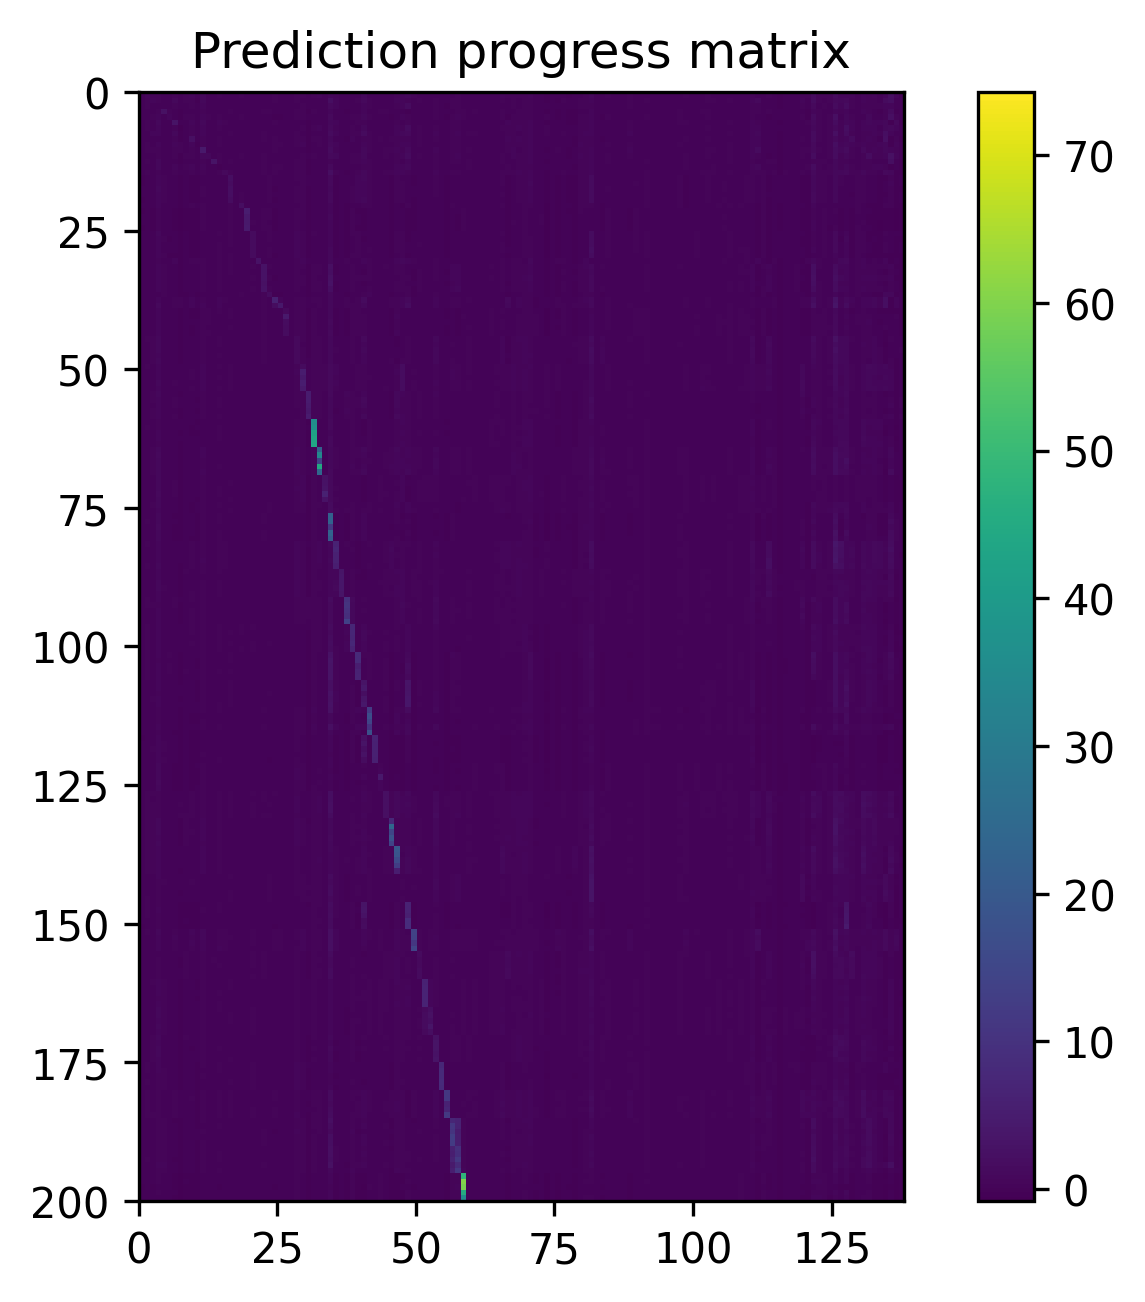

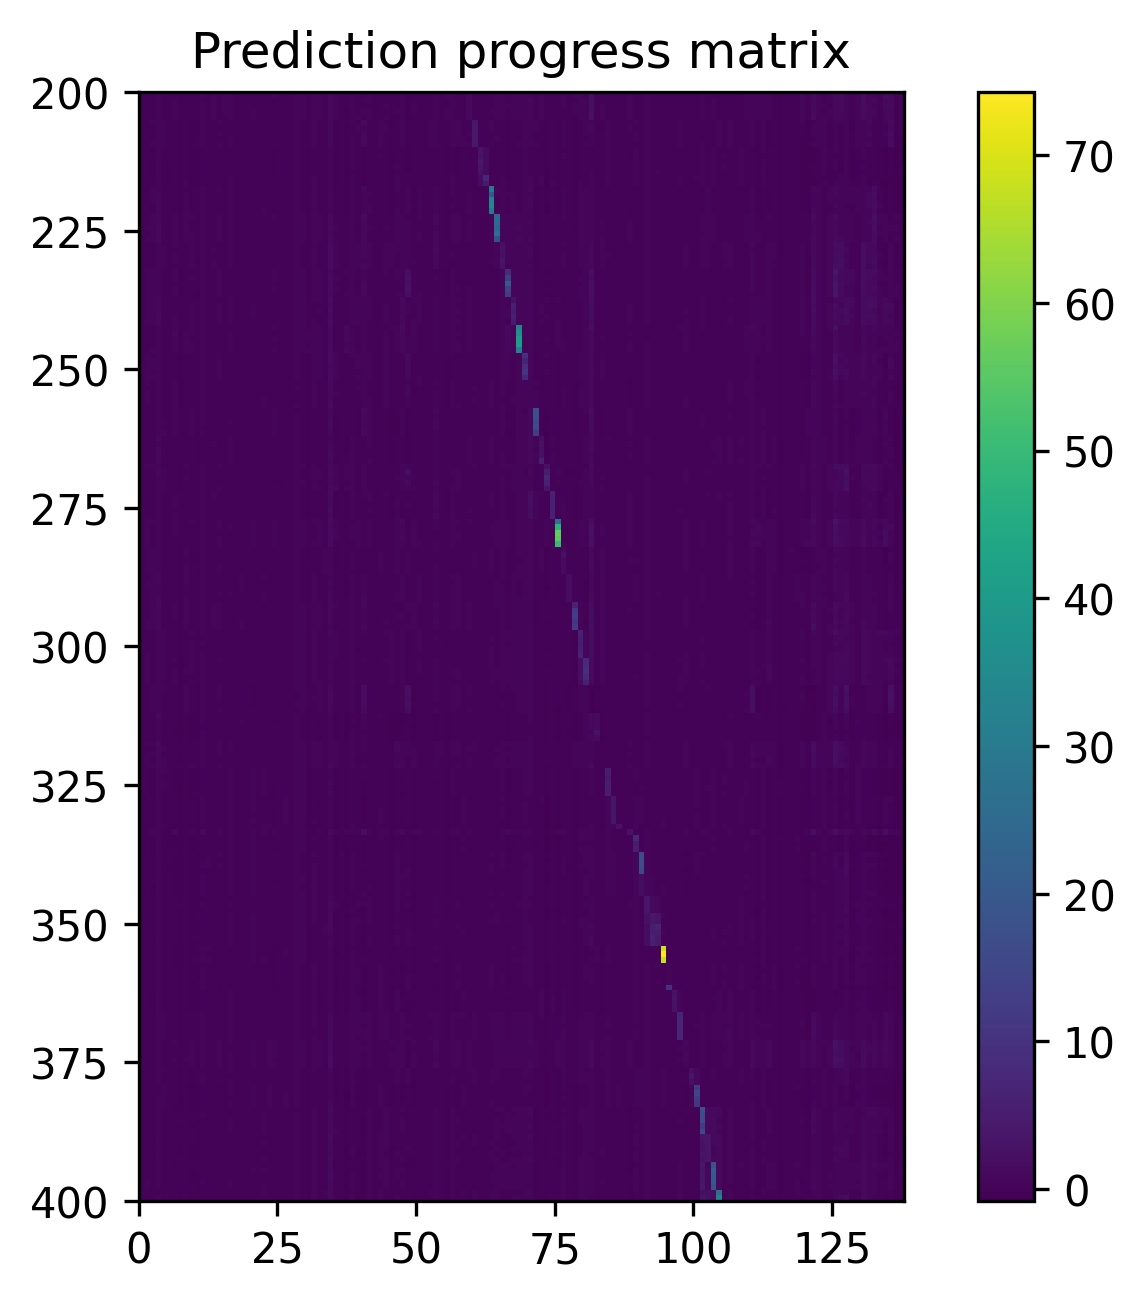

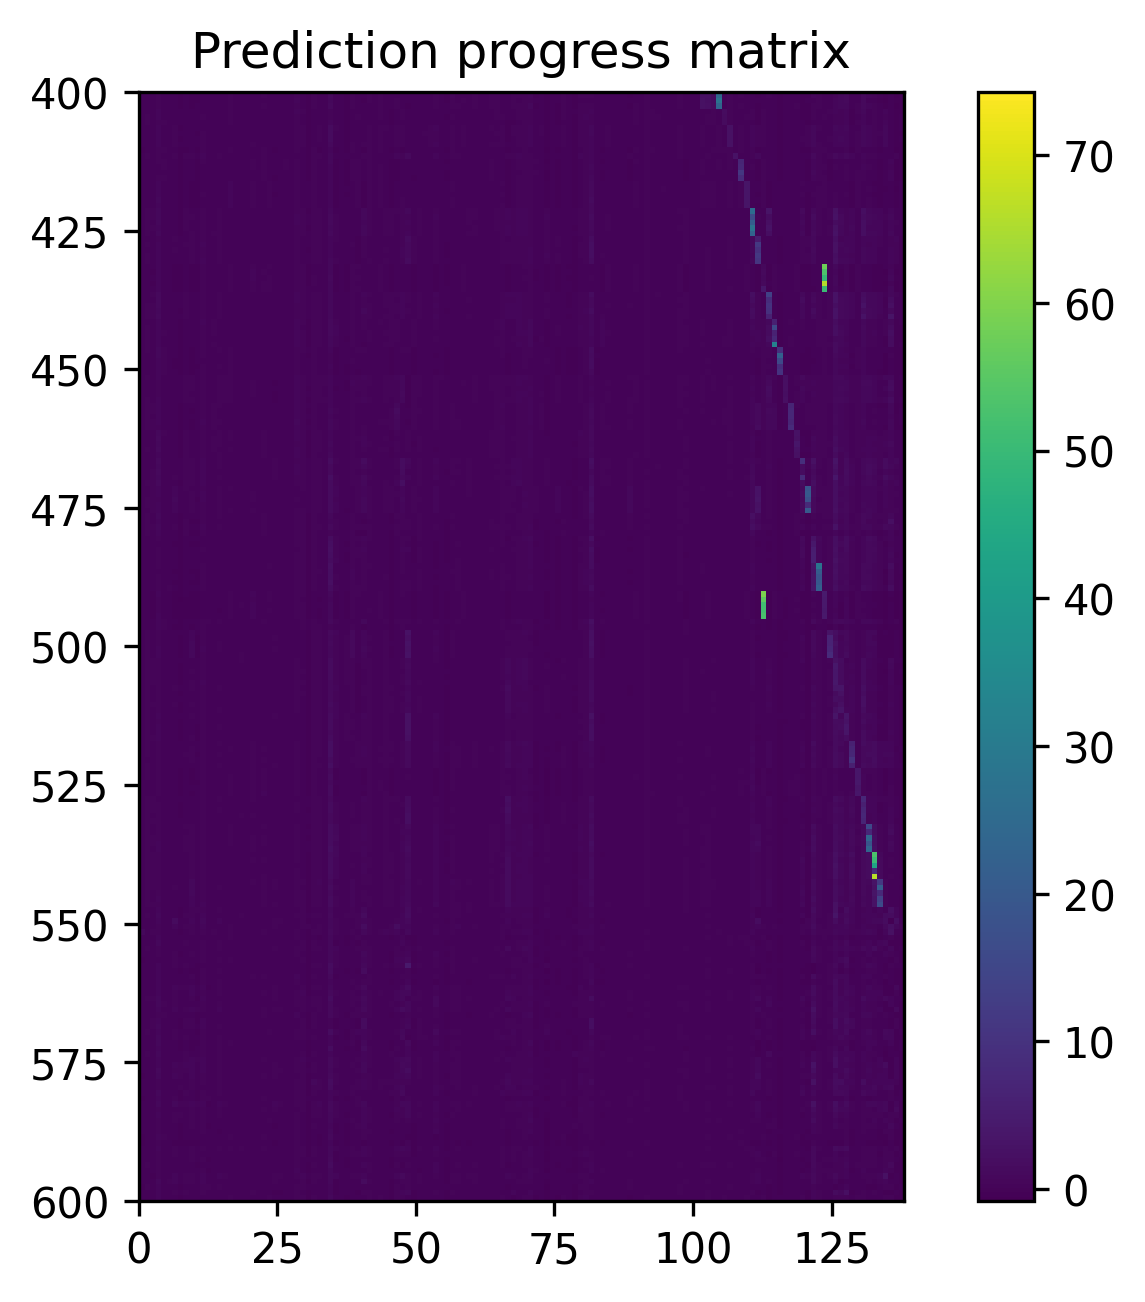

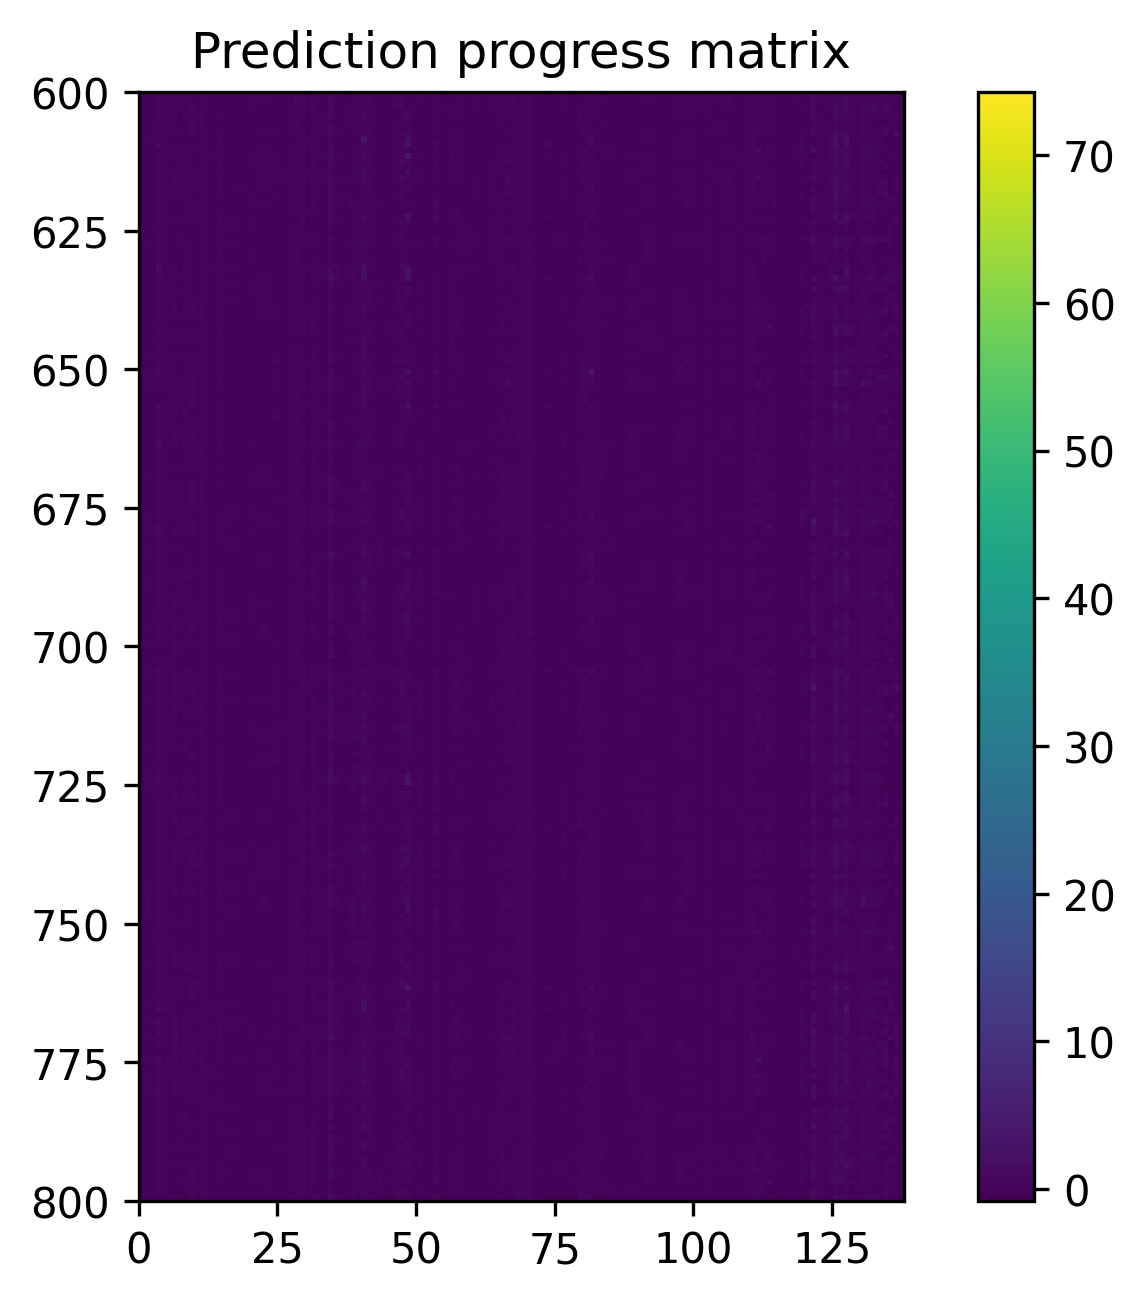

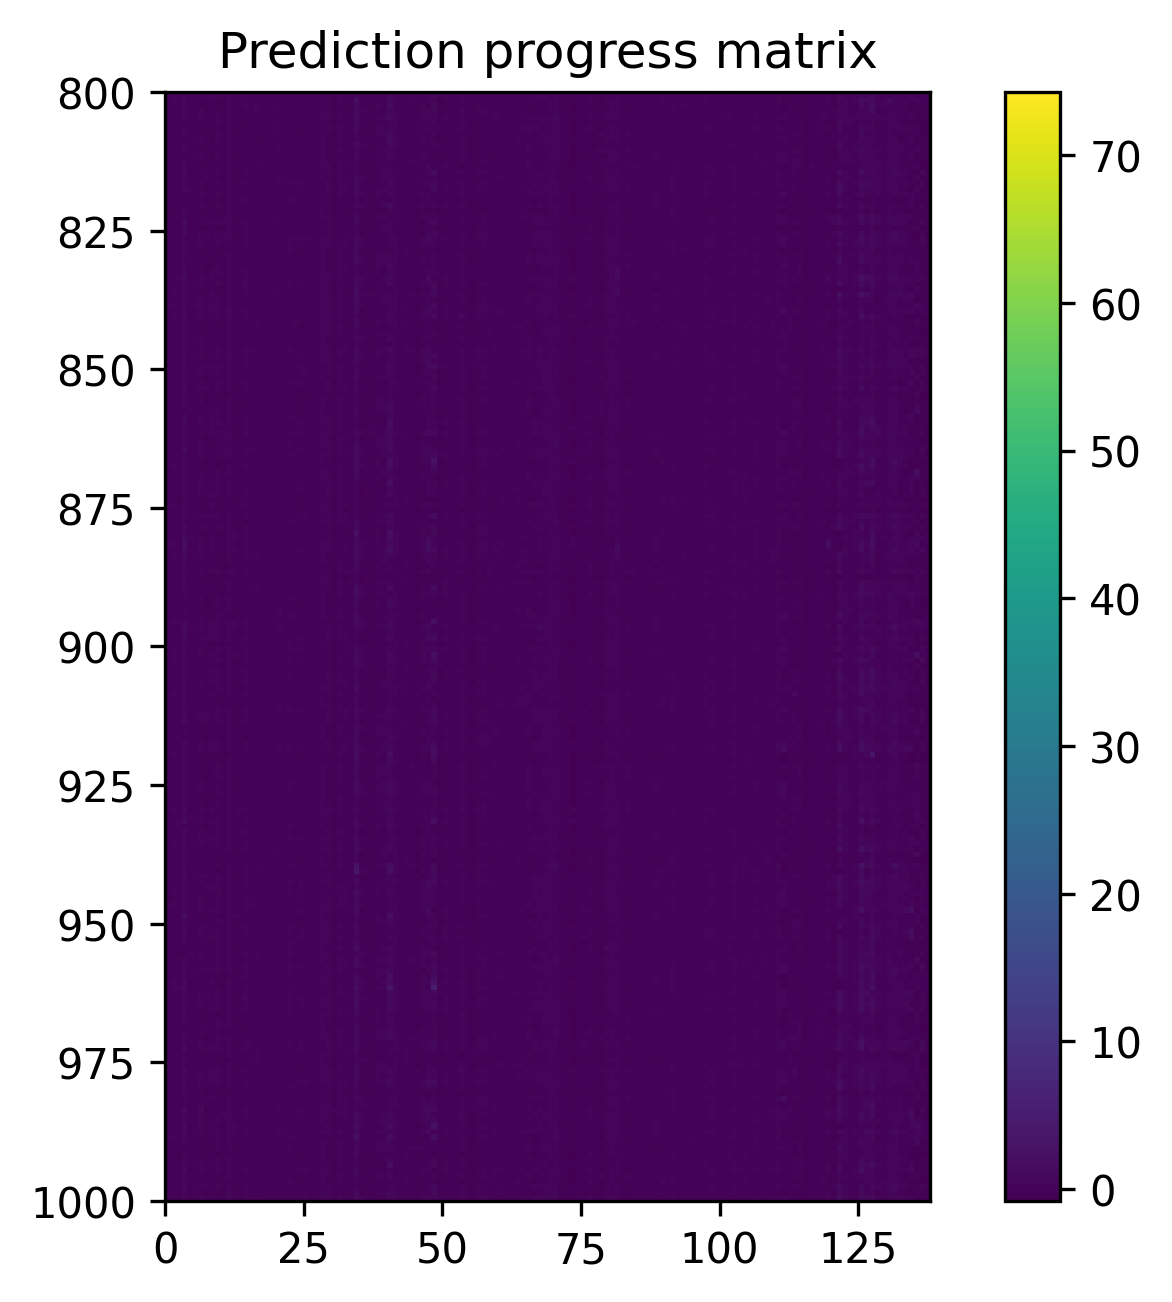

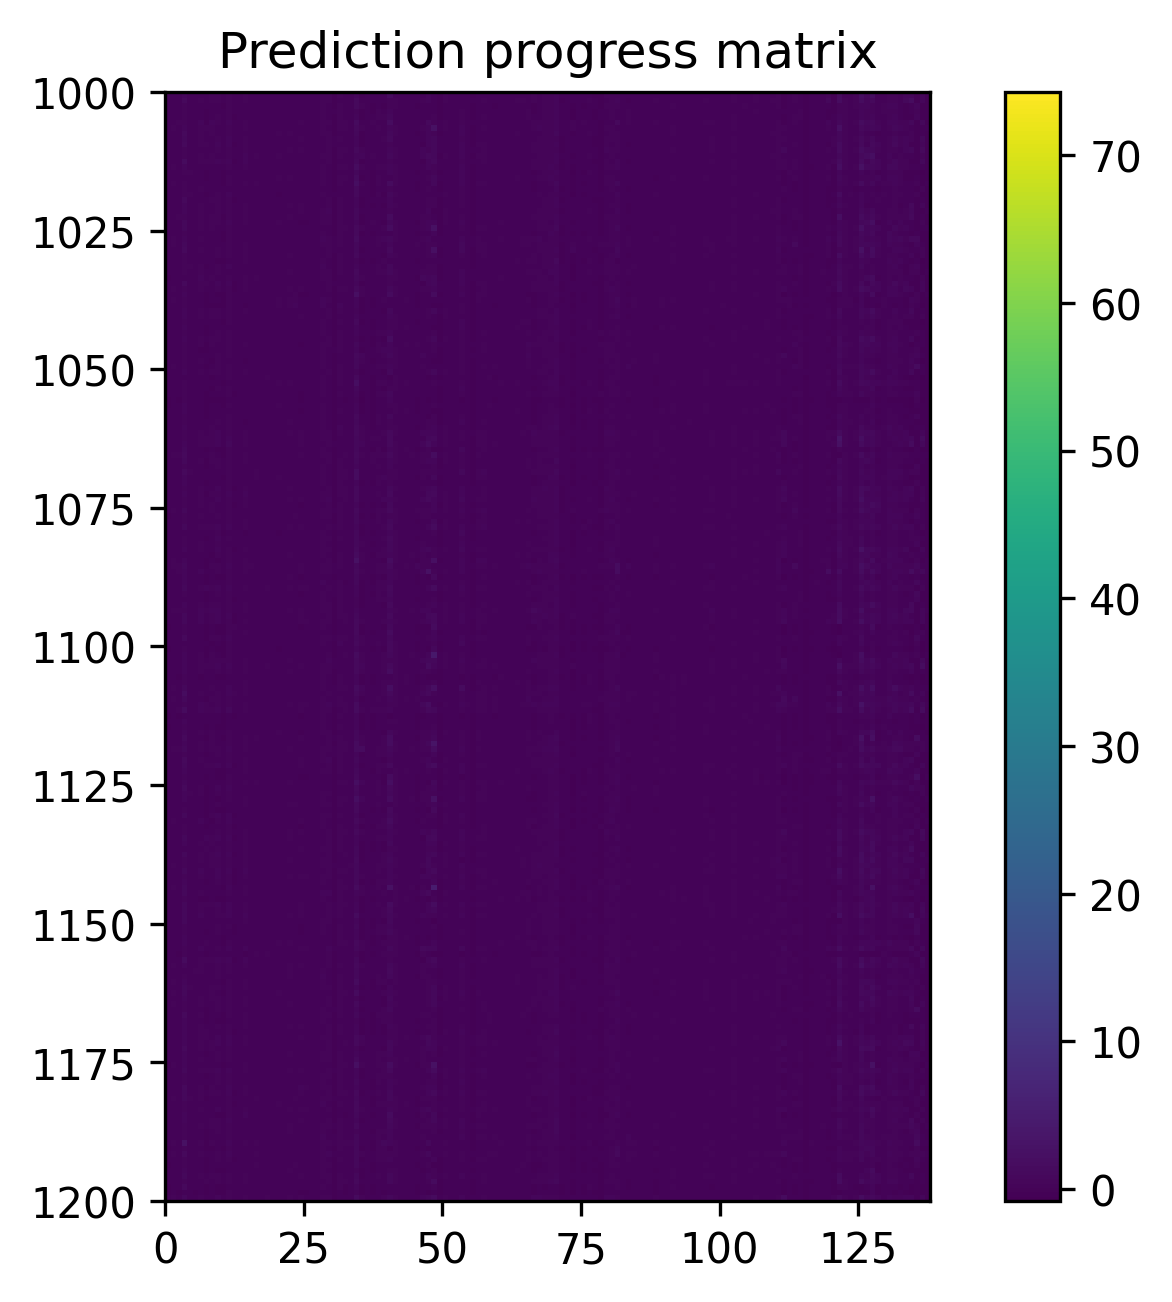

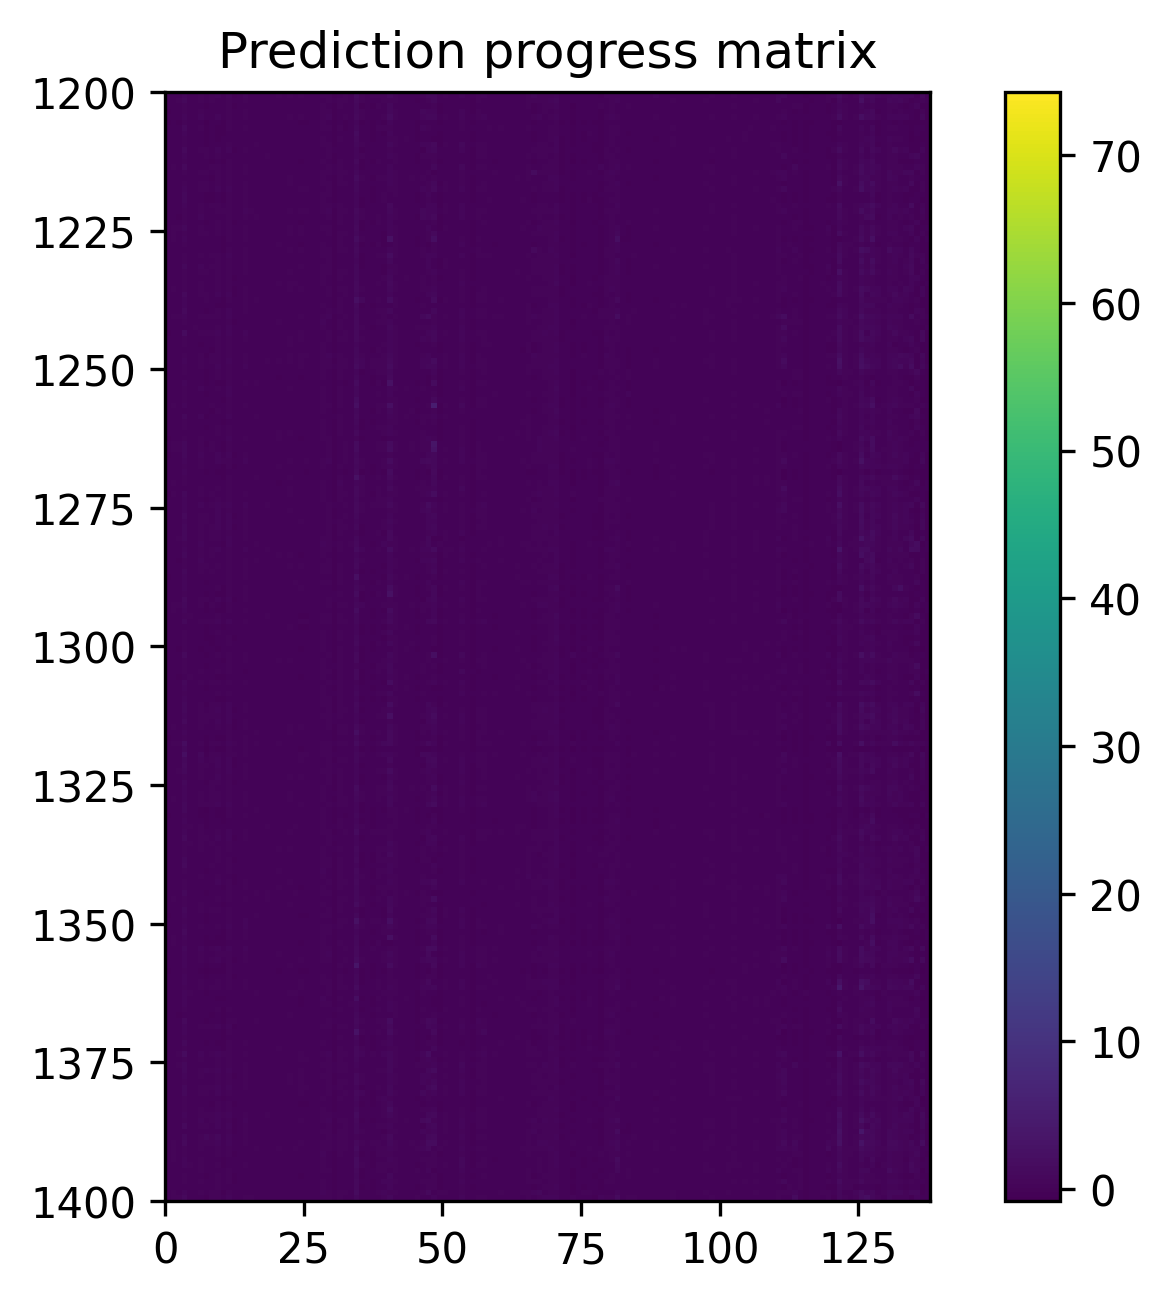

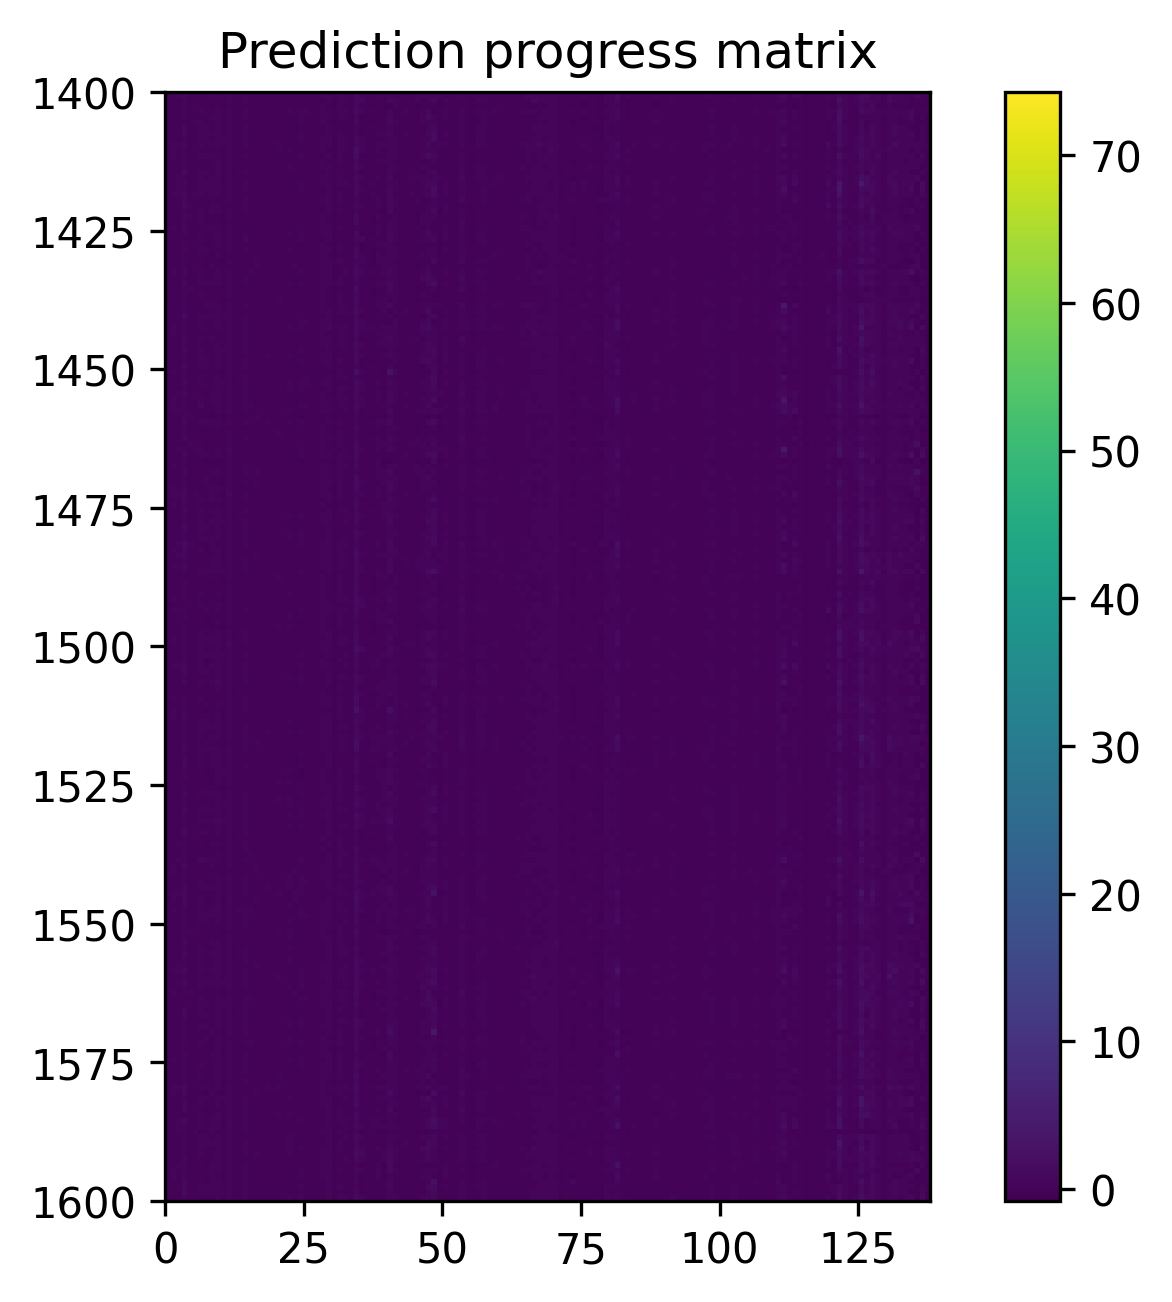

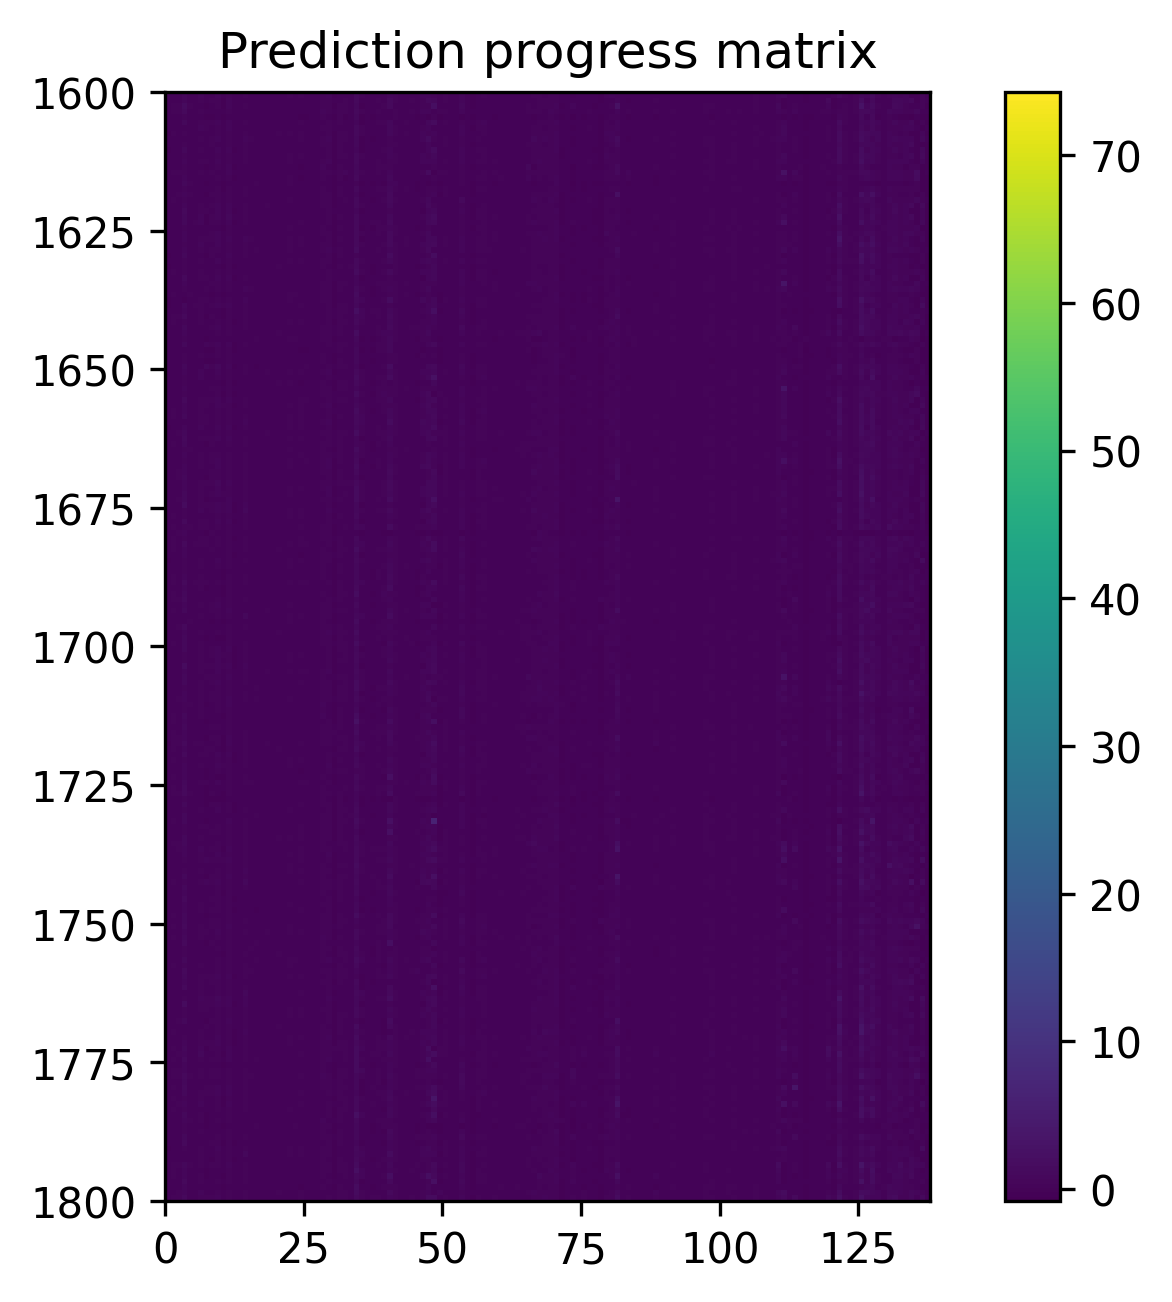

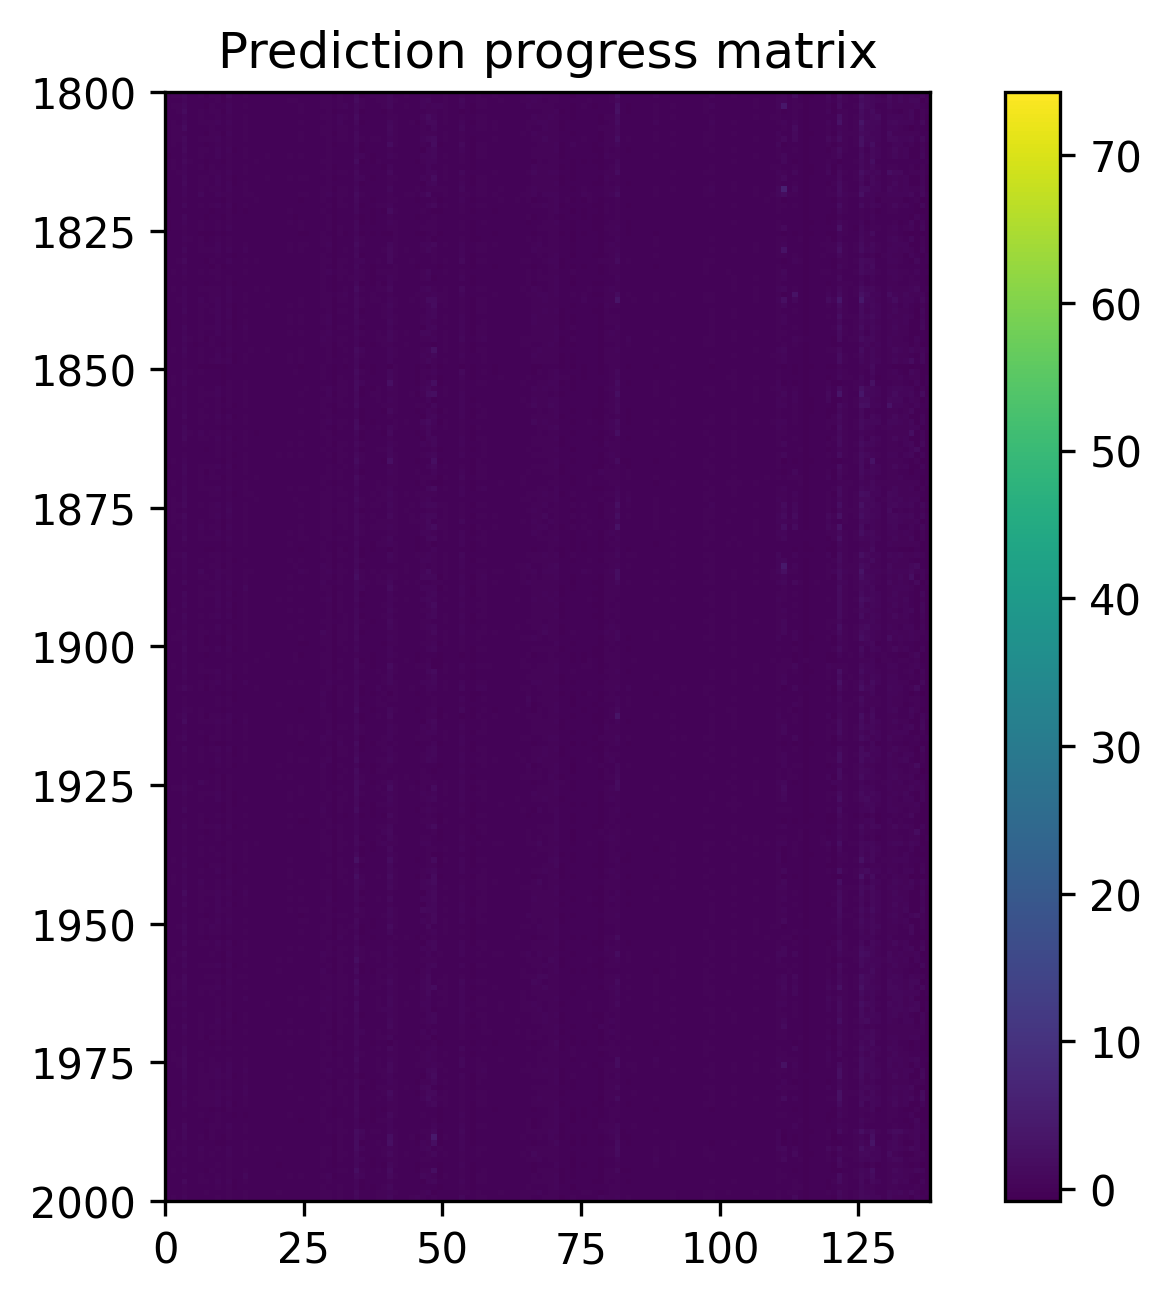

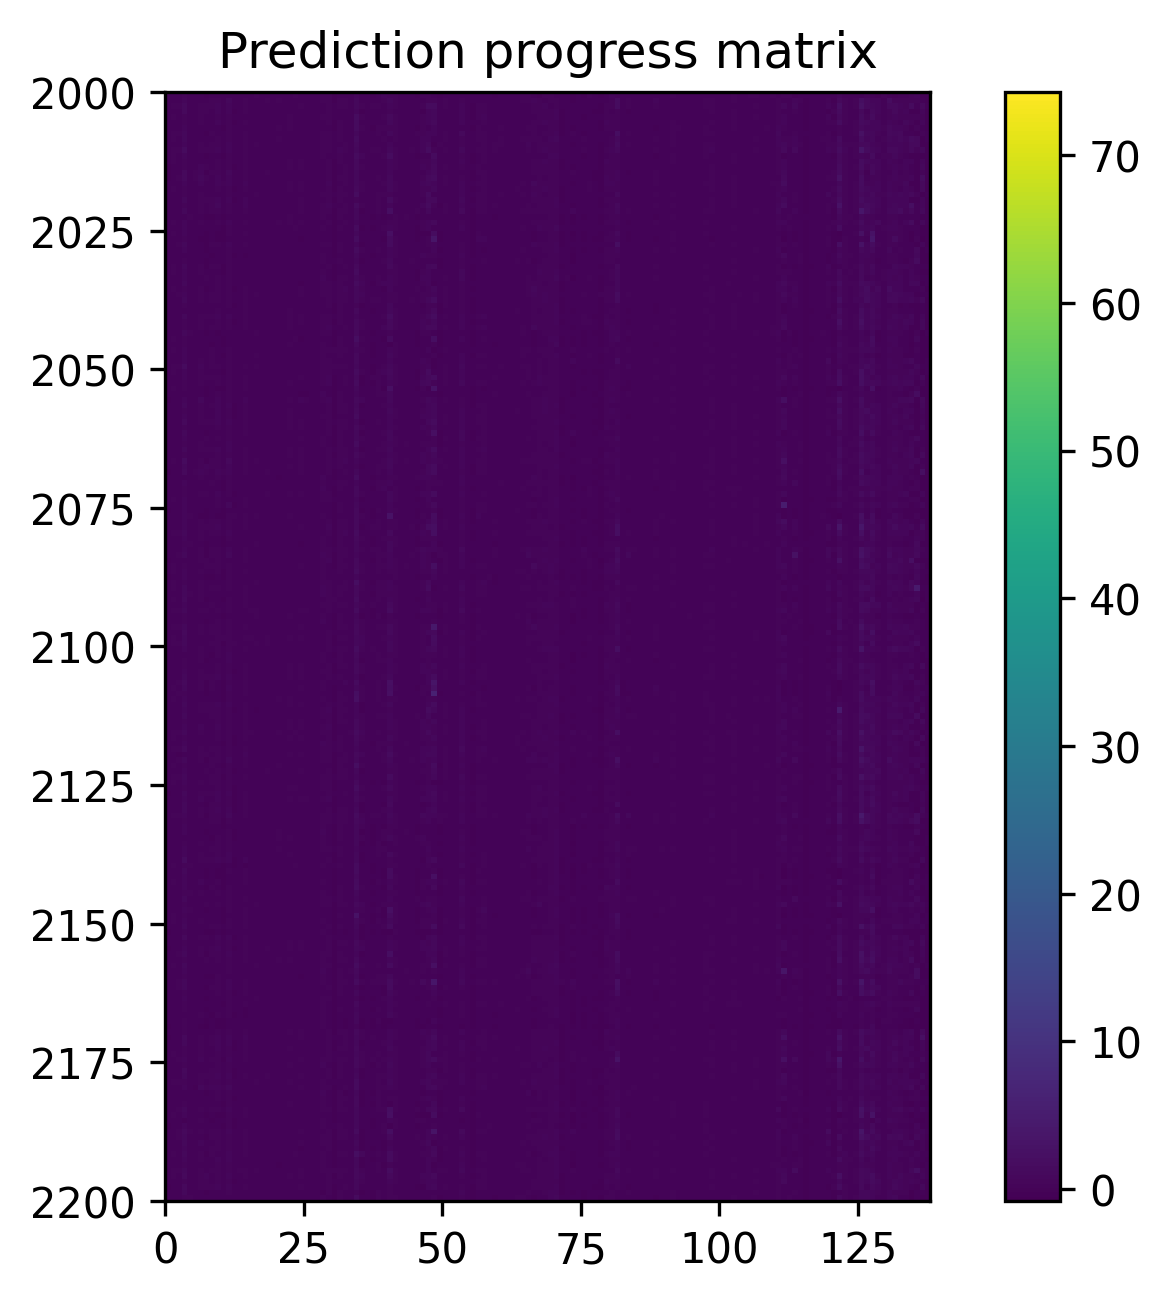

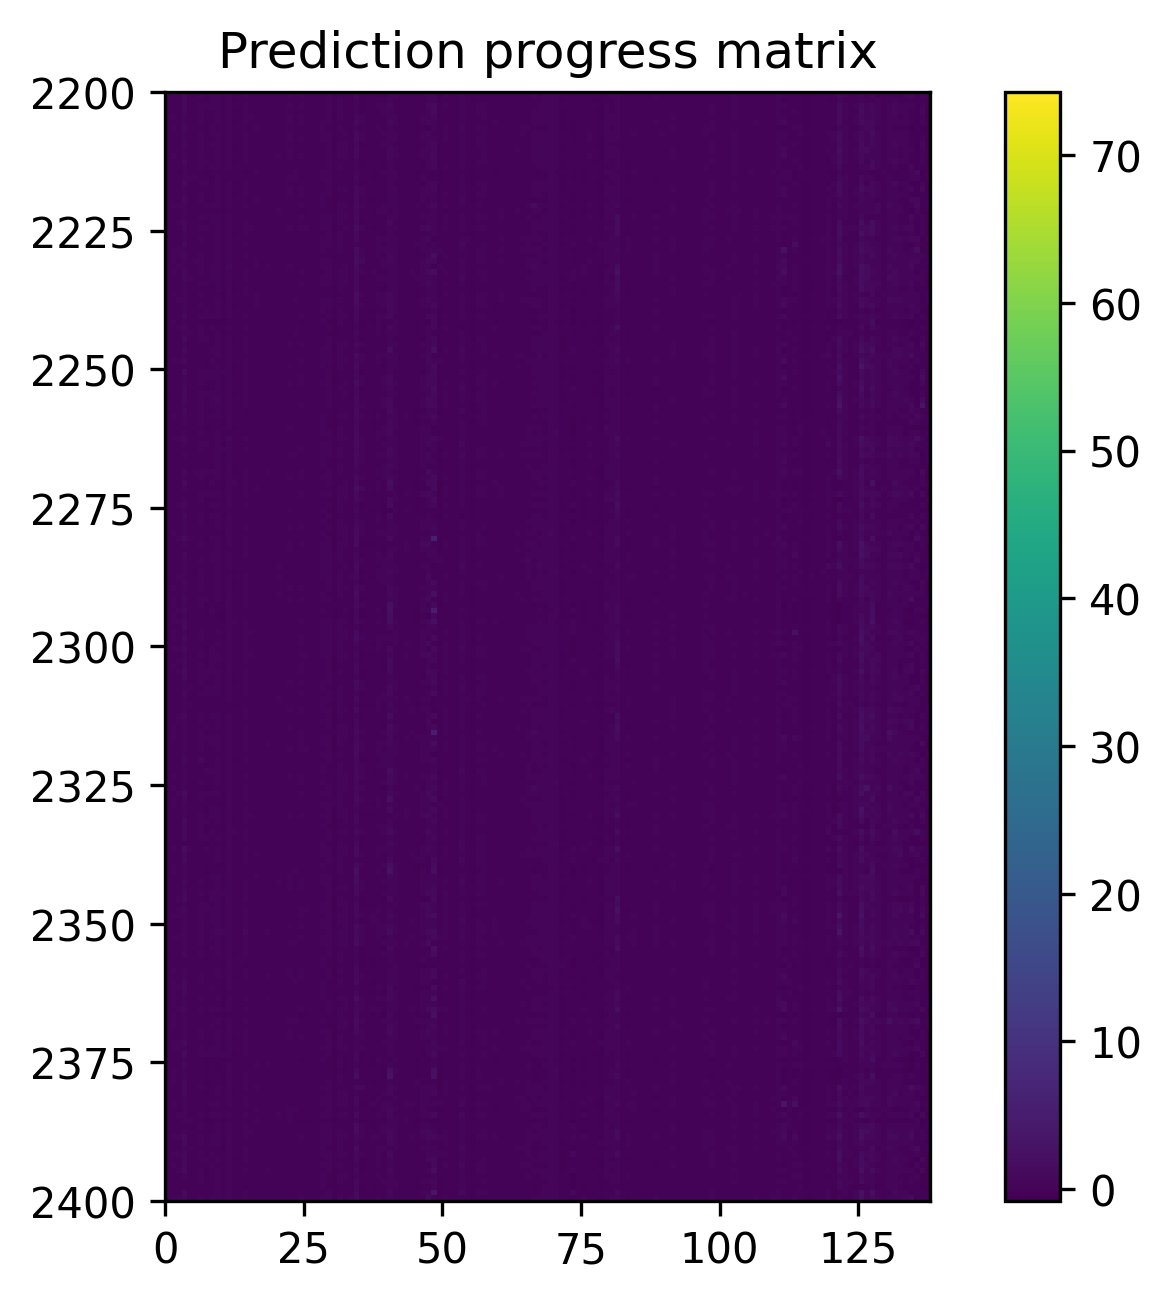

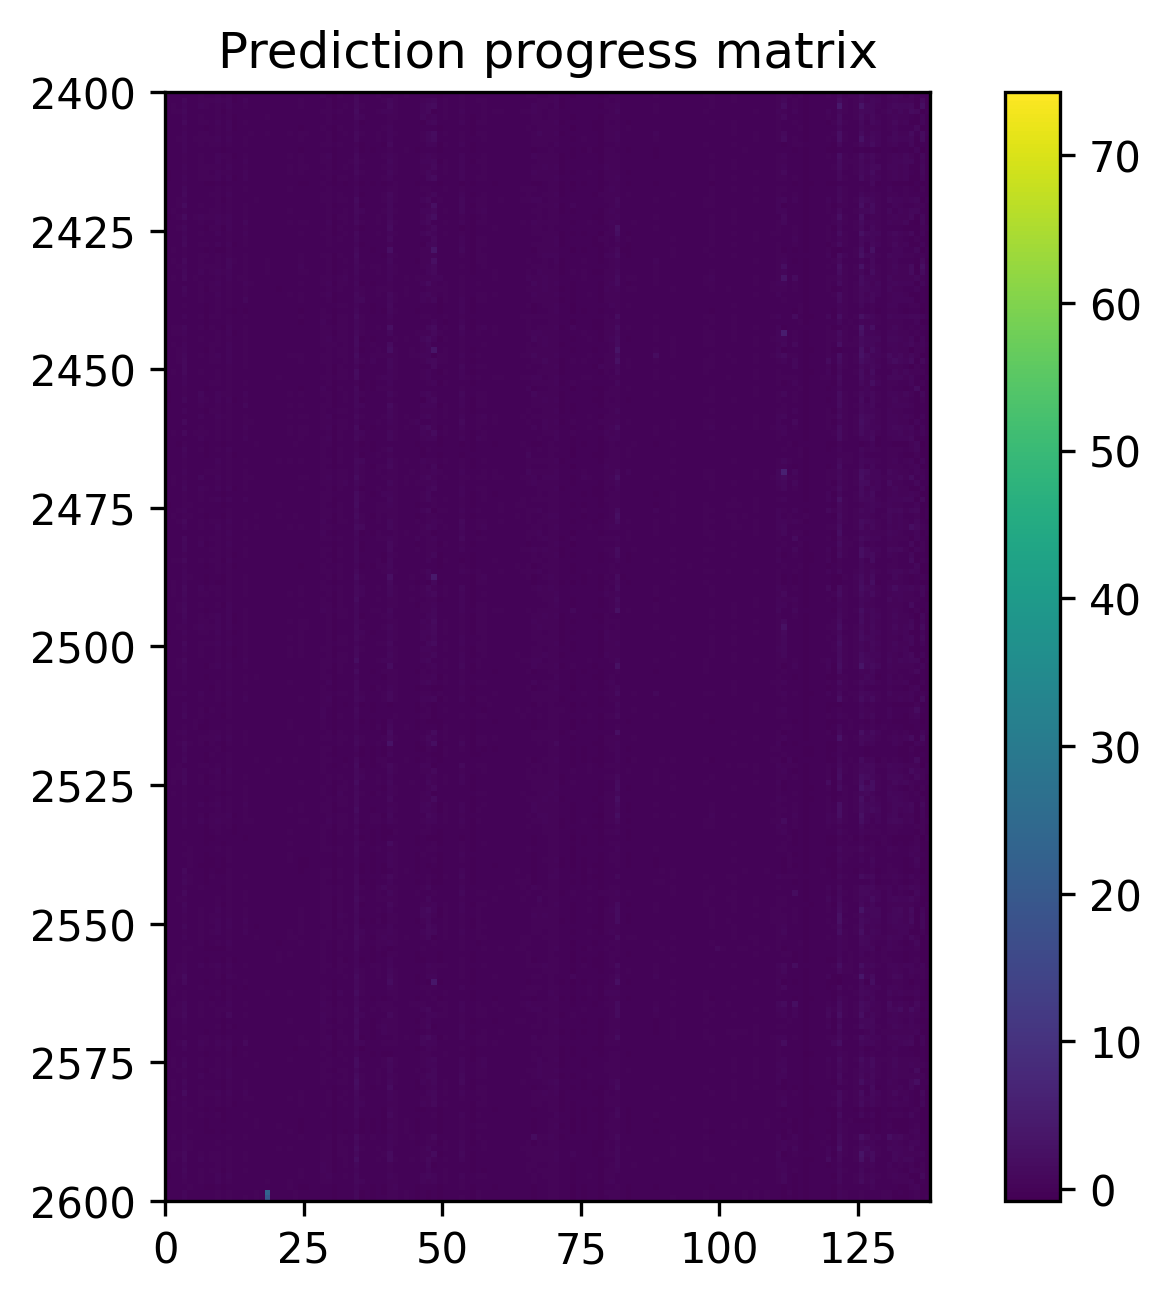

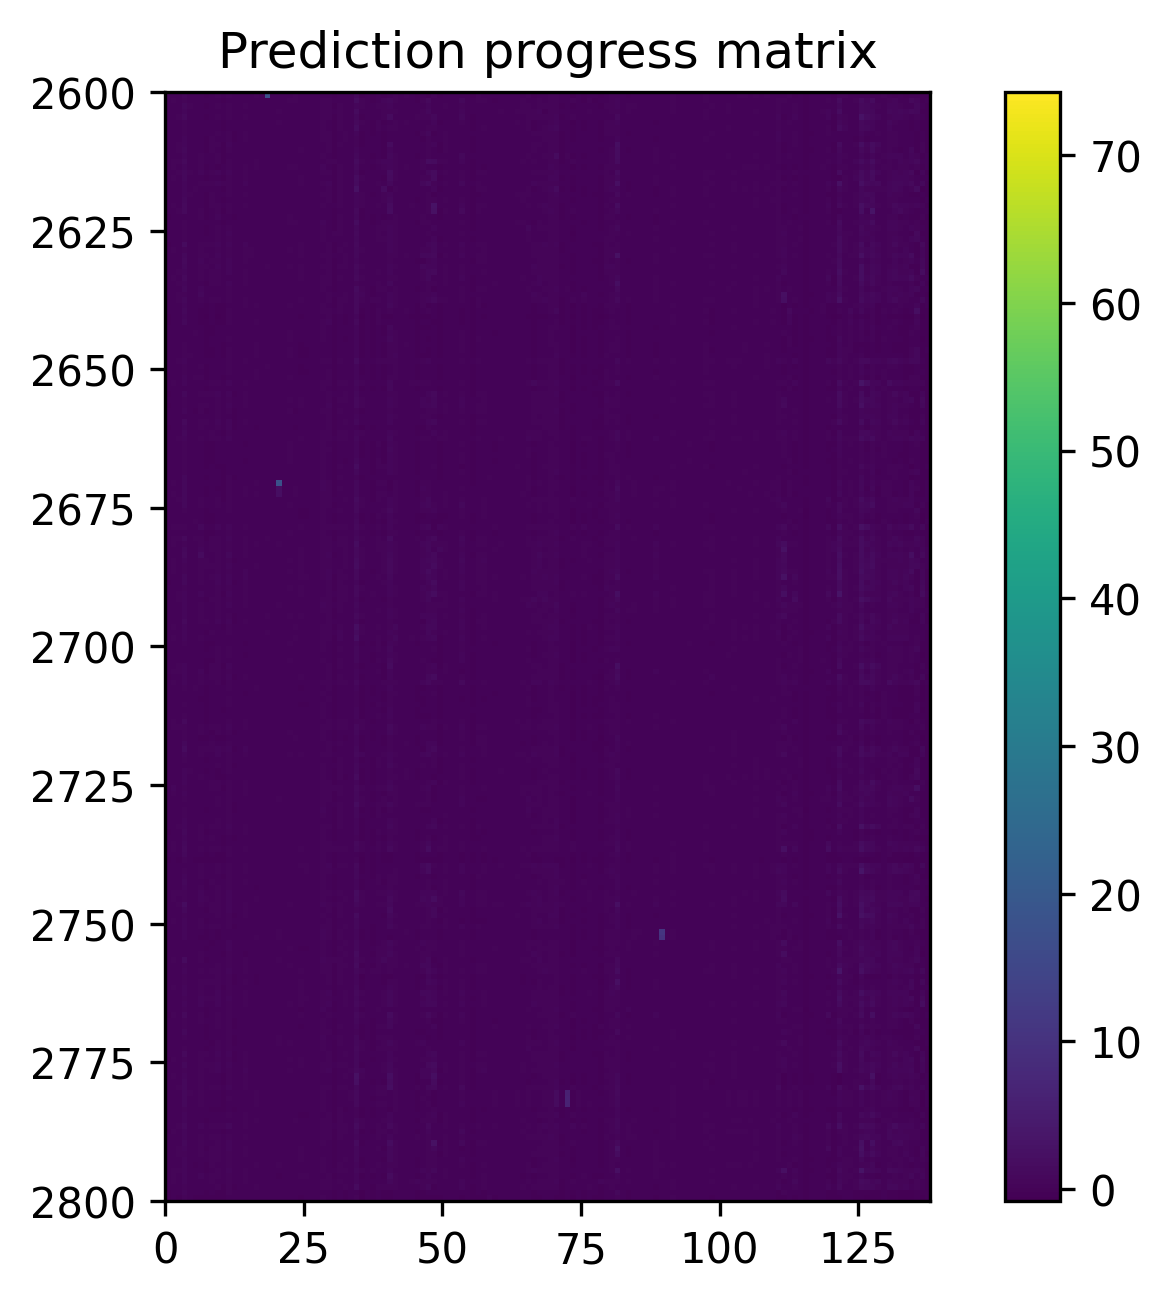

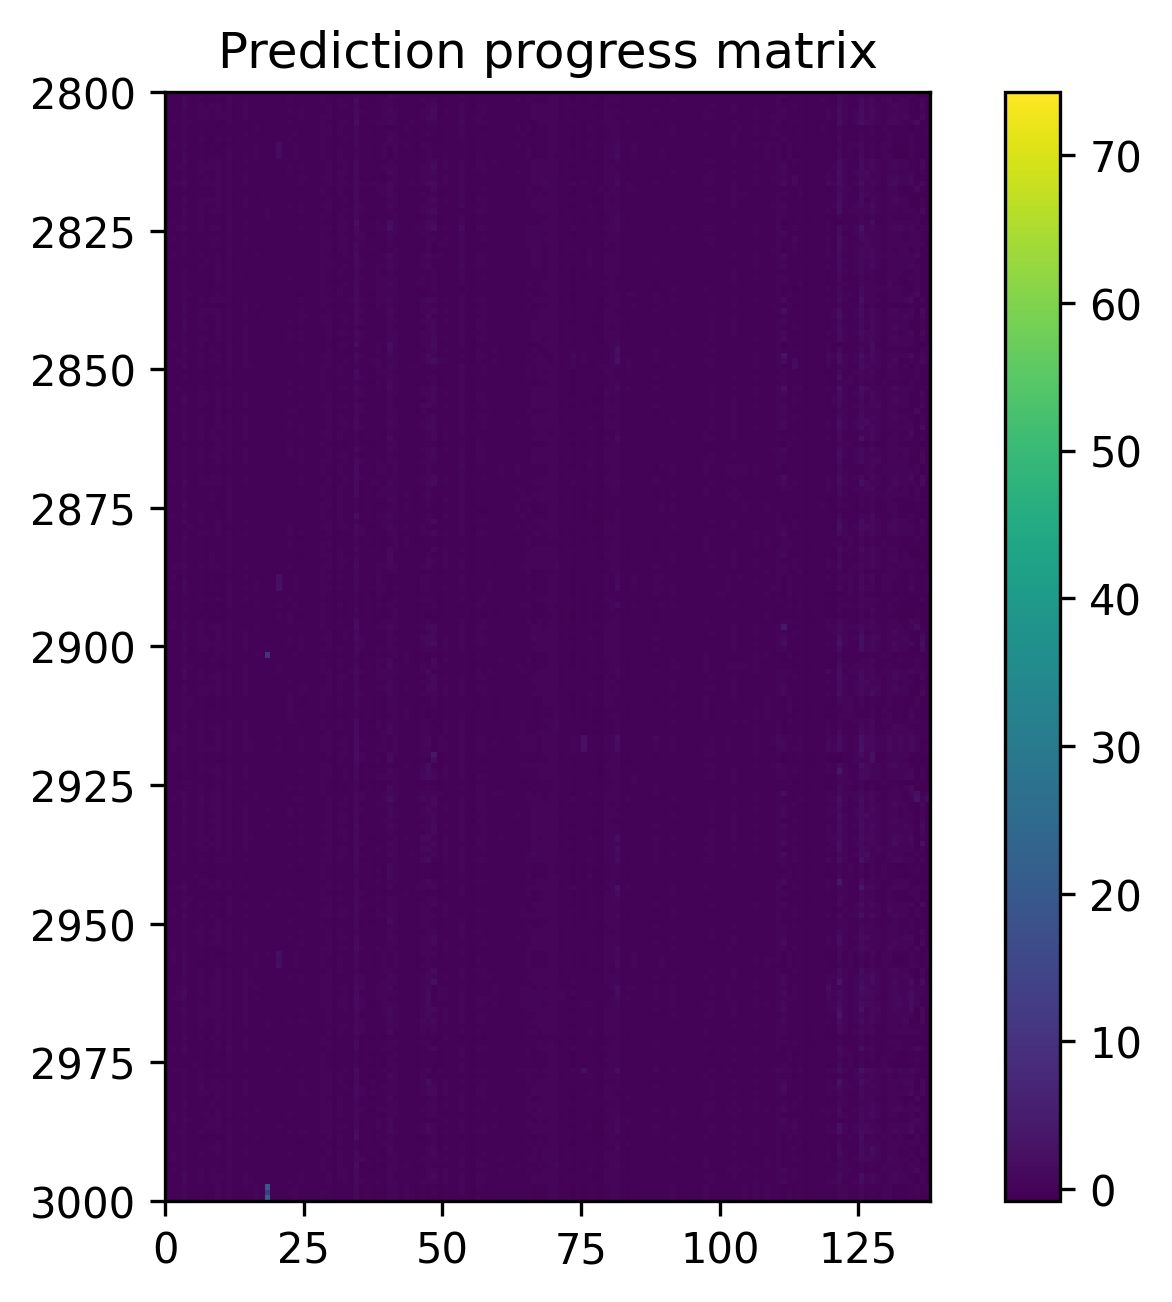

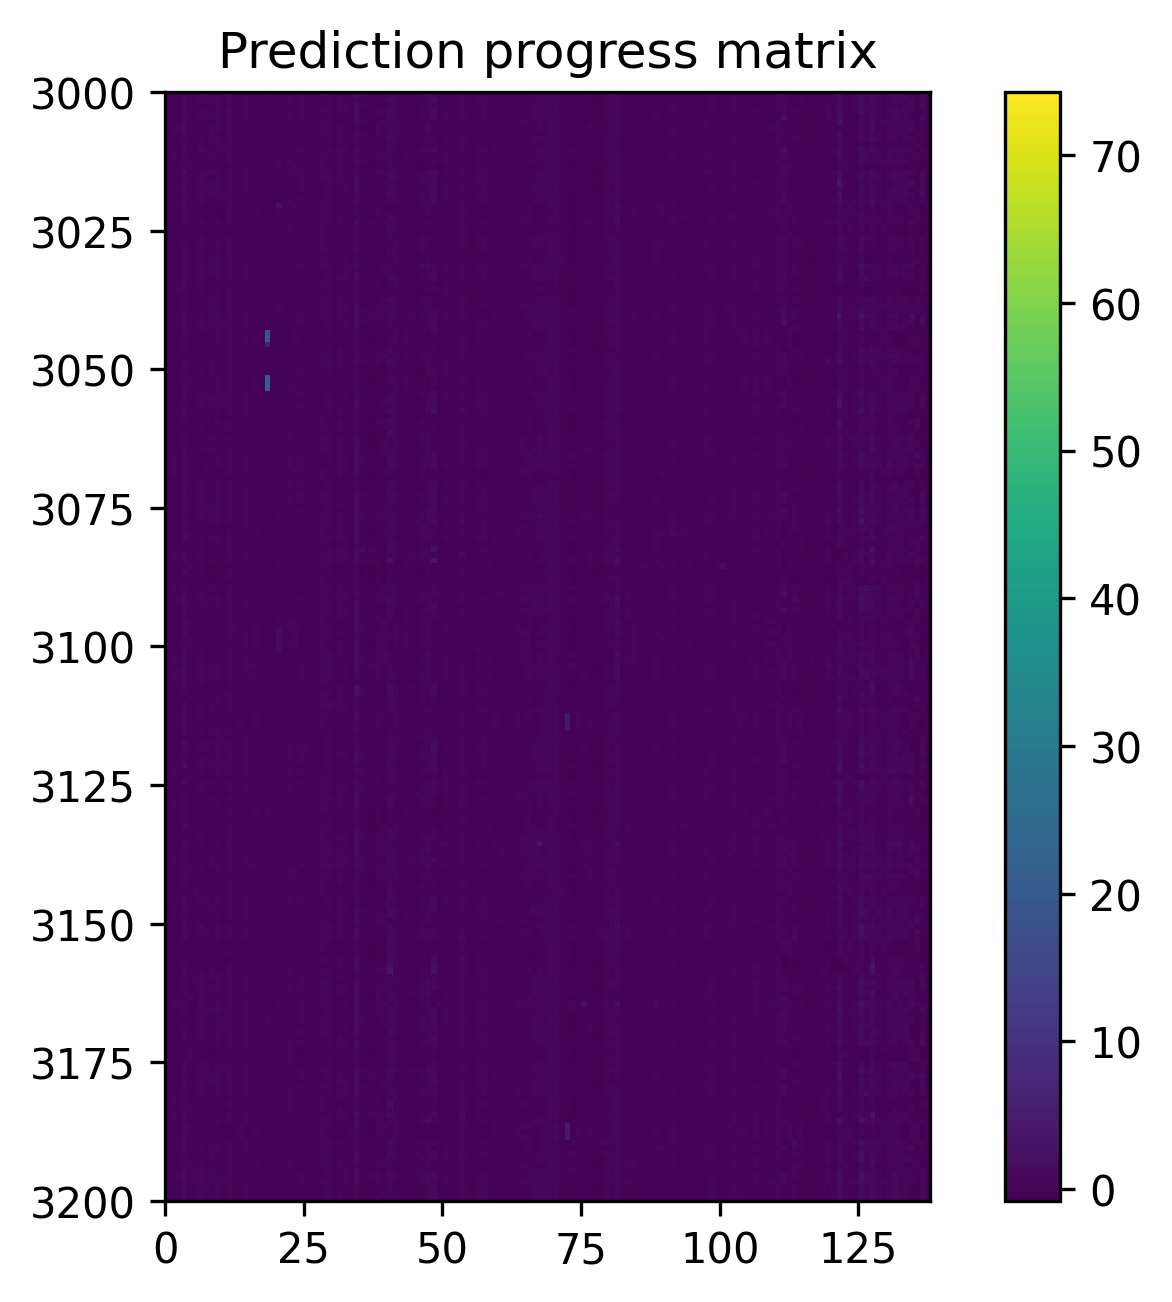

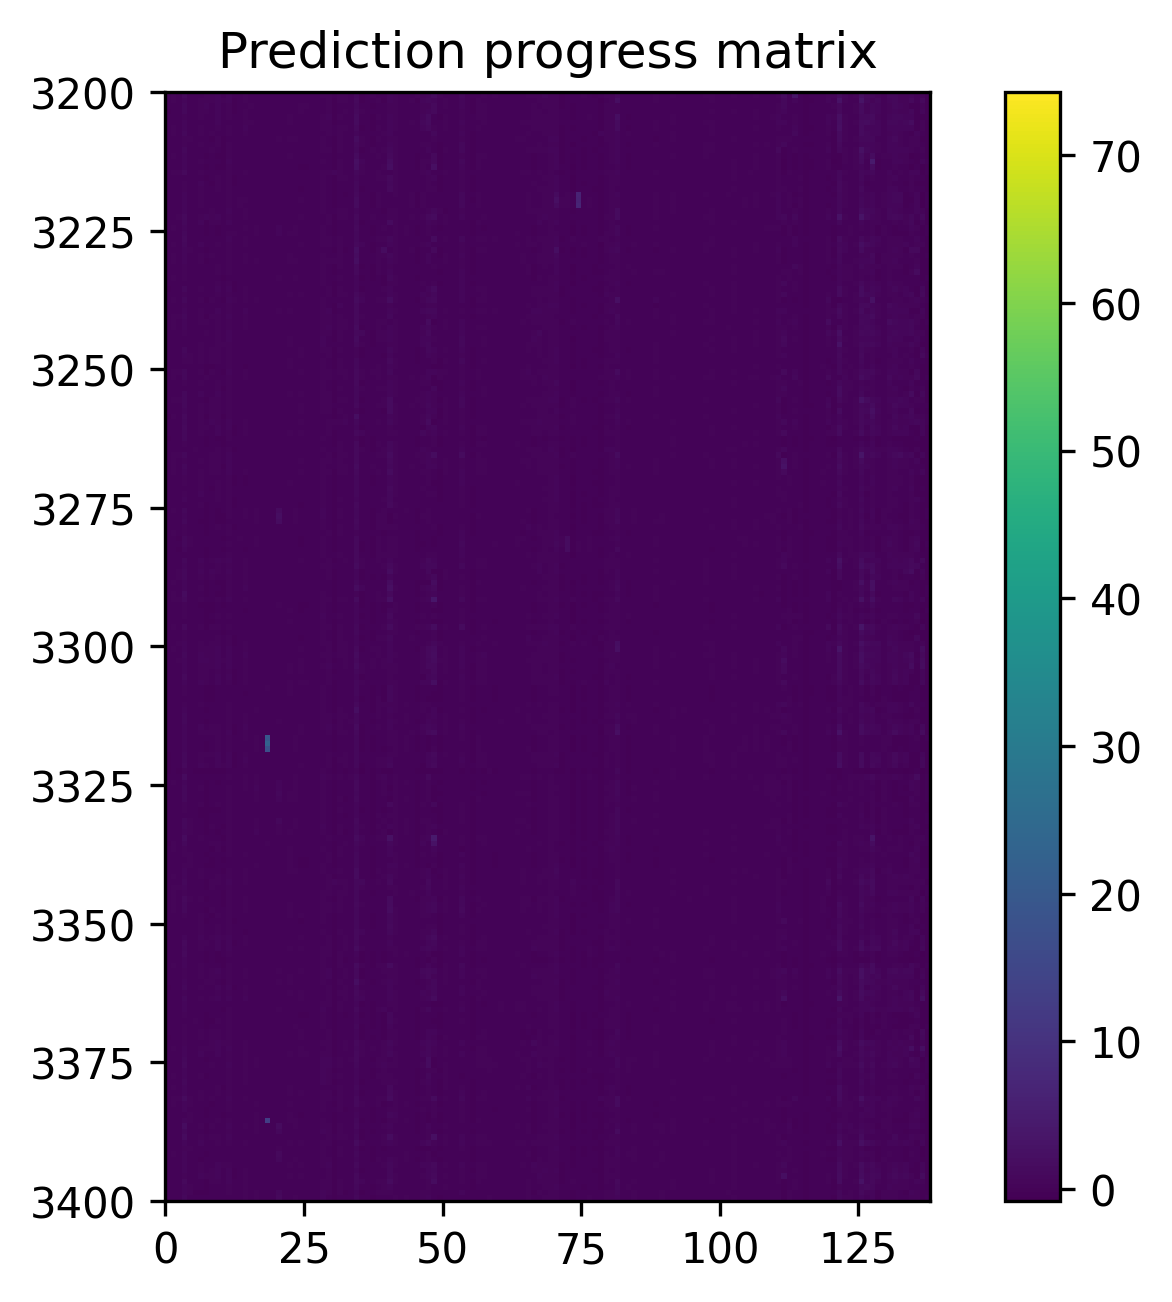

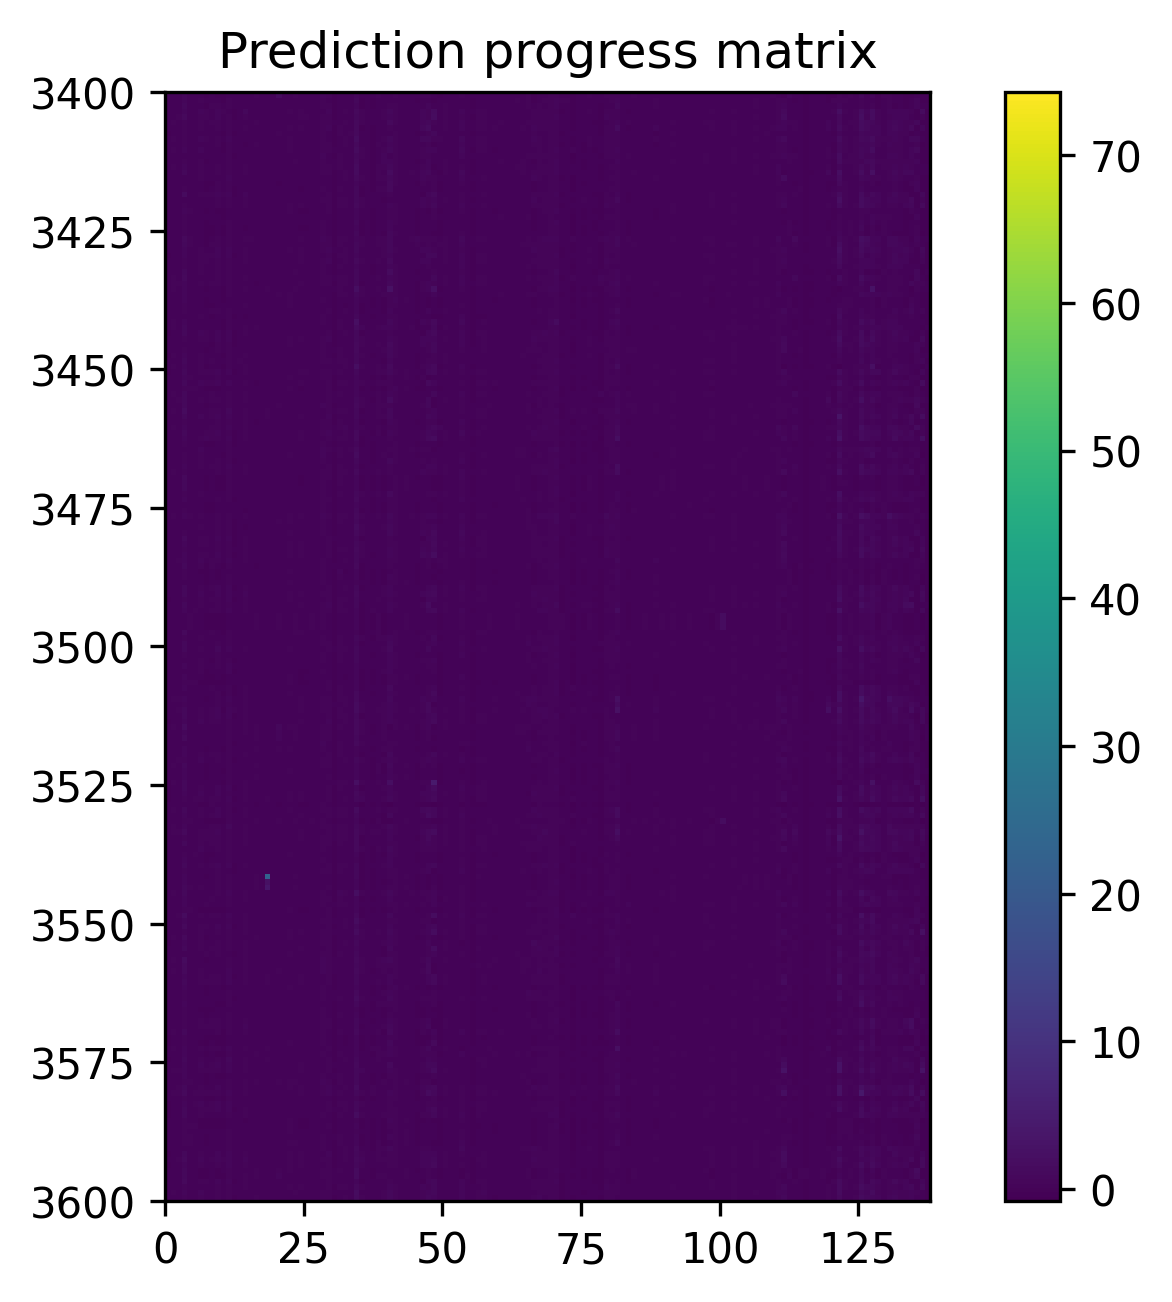

In [90]:
l = 200
for i in range(0, matrix_train.shape[0] // l):
    plot_matrix(matrix_train[i*l:(i+1)*l], 
                vmin=total_min, vmax=total_max, xmin=(i+1)*l, xmax=i*l)

In [91]:
matrix_train.shape

torch.Size([3711, 138])

In [92]:
matrix_test.shape

torch.Size([3711, 230])

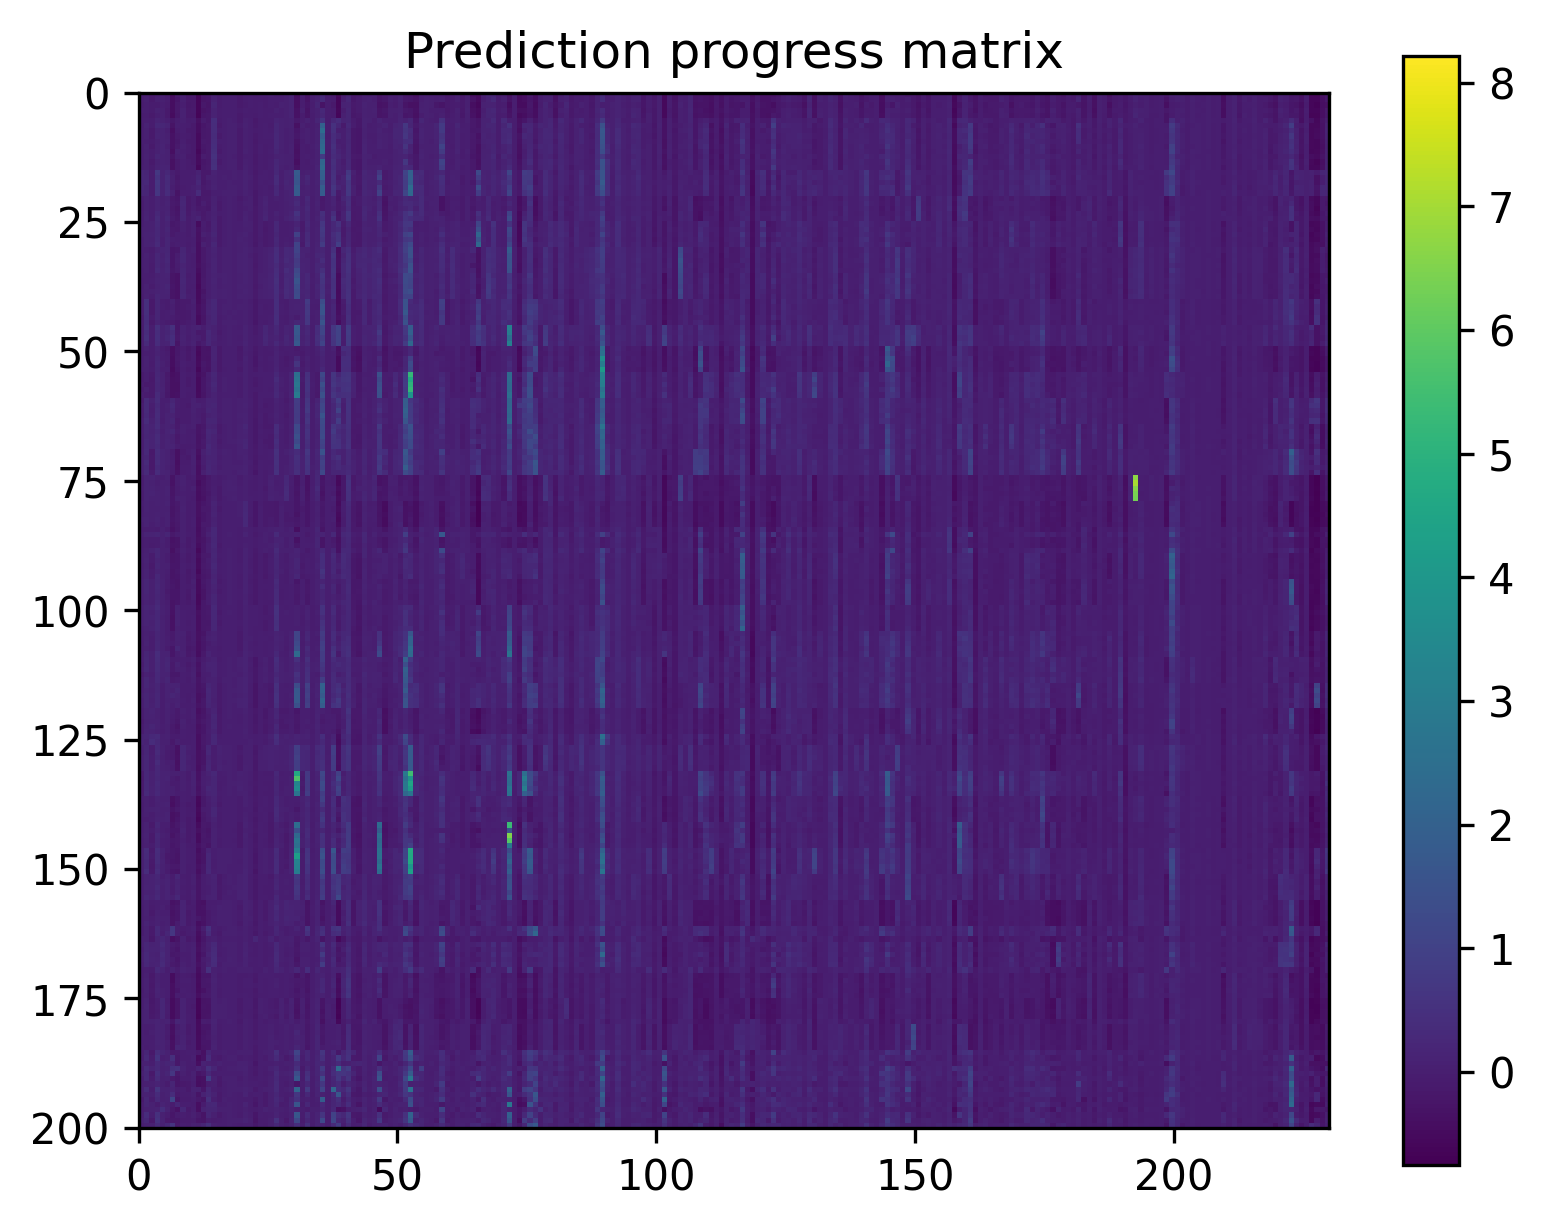

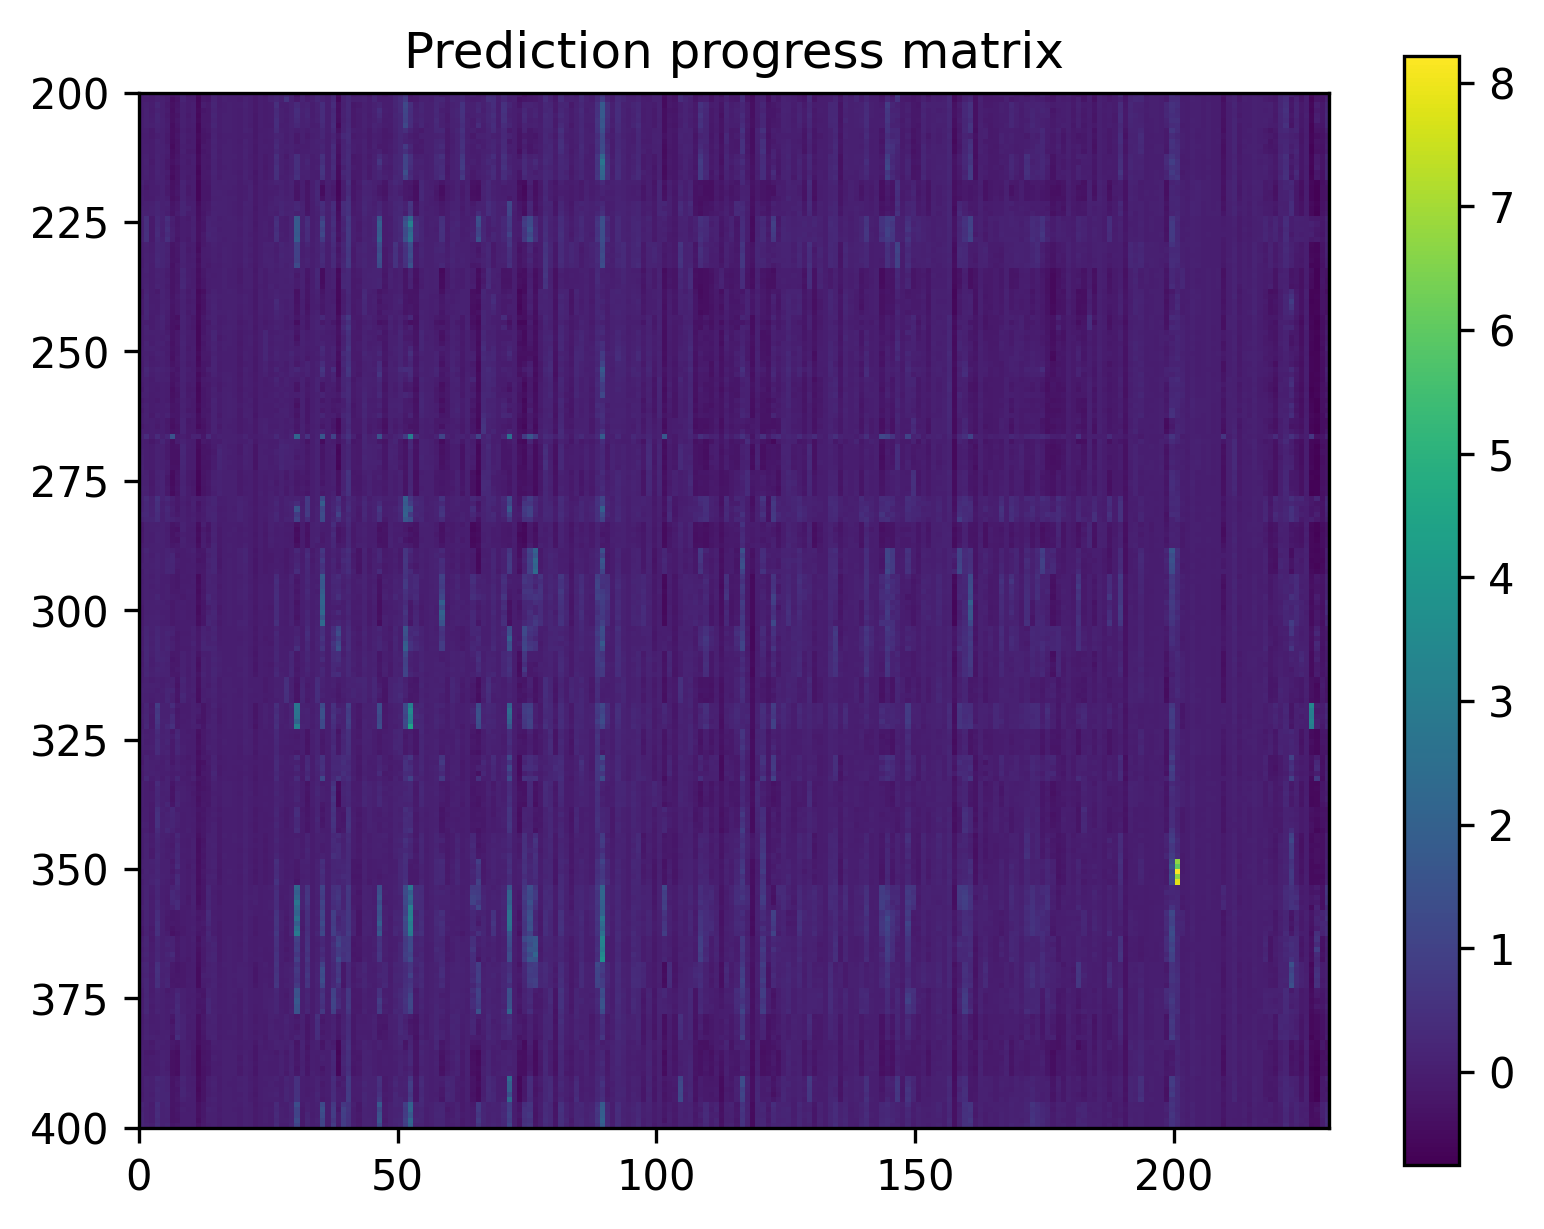

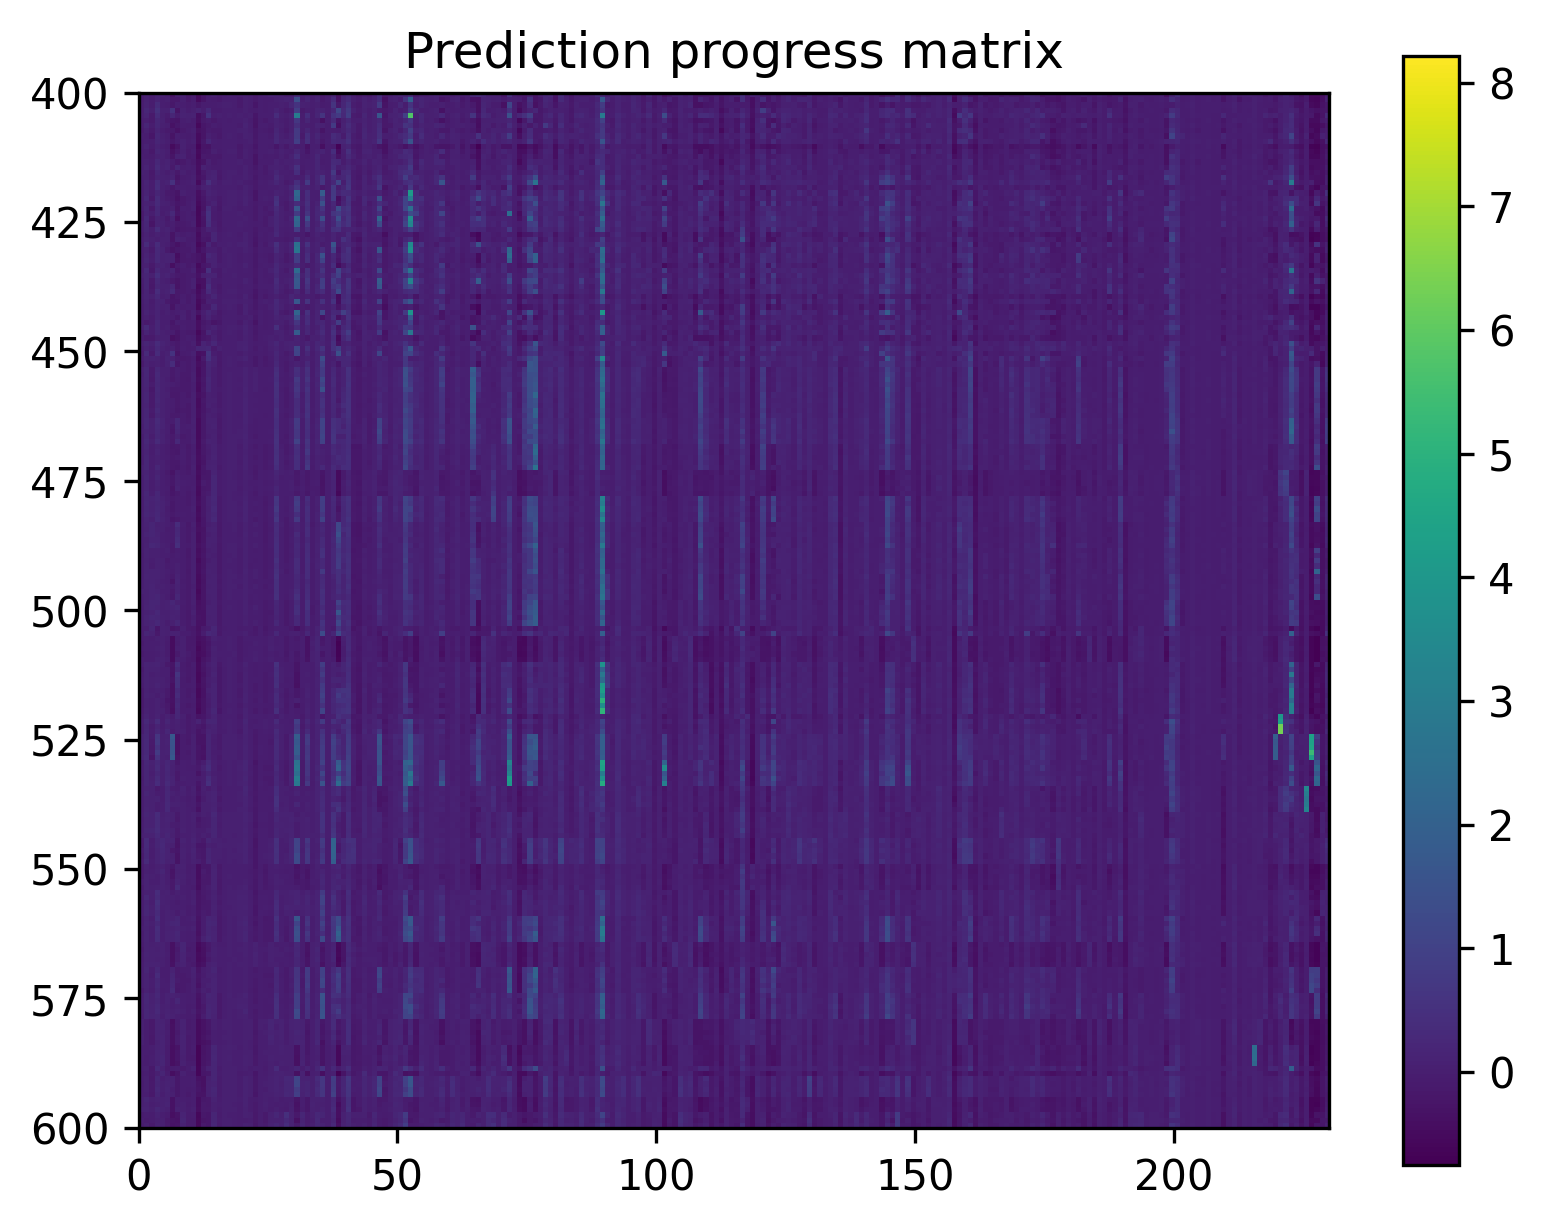

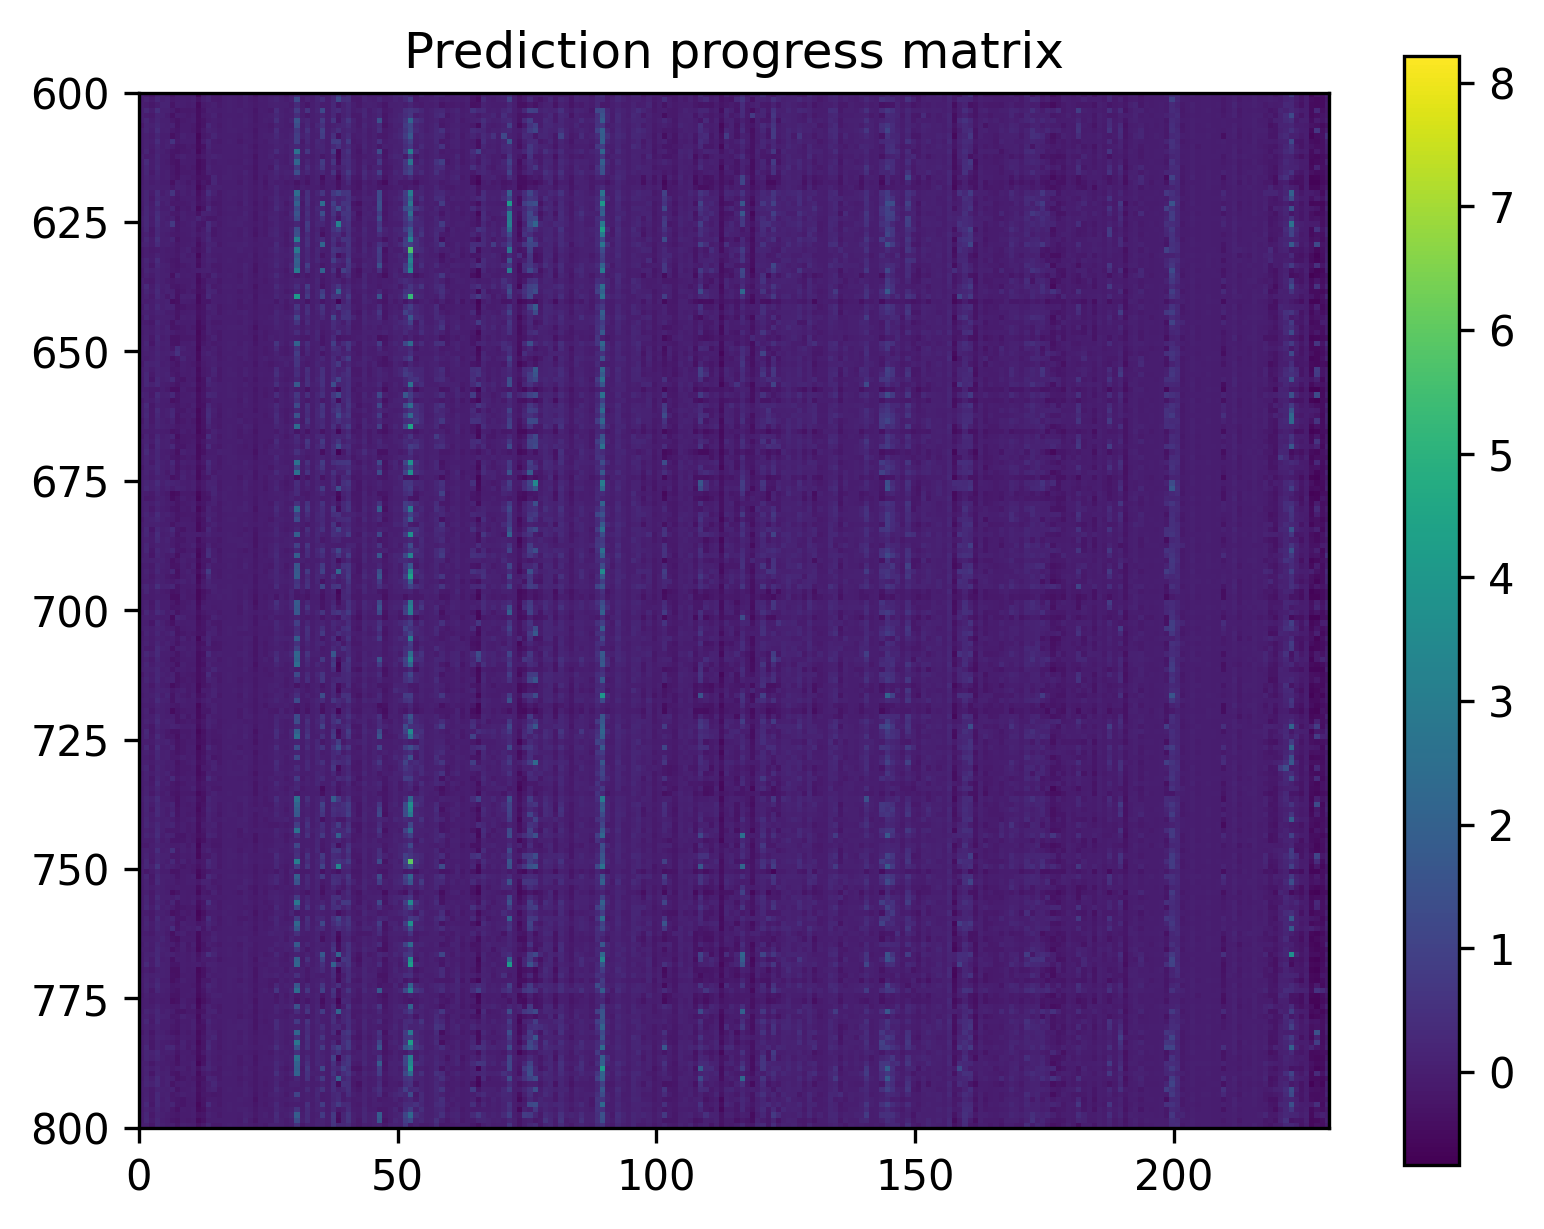

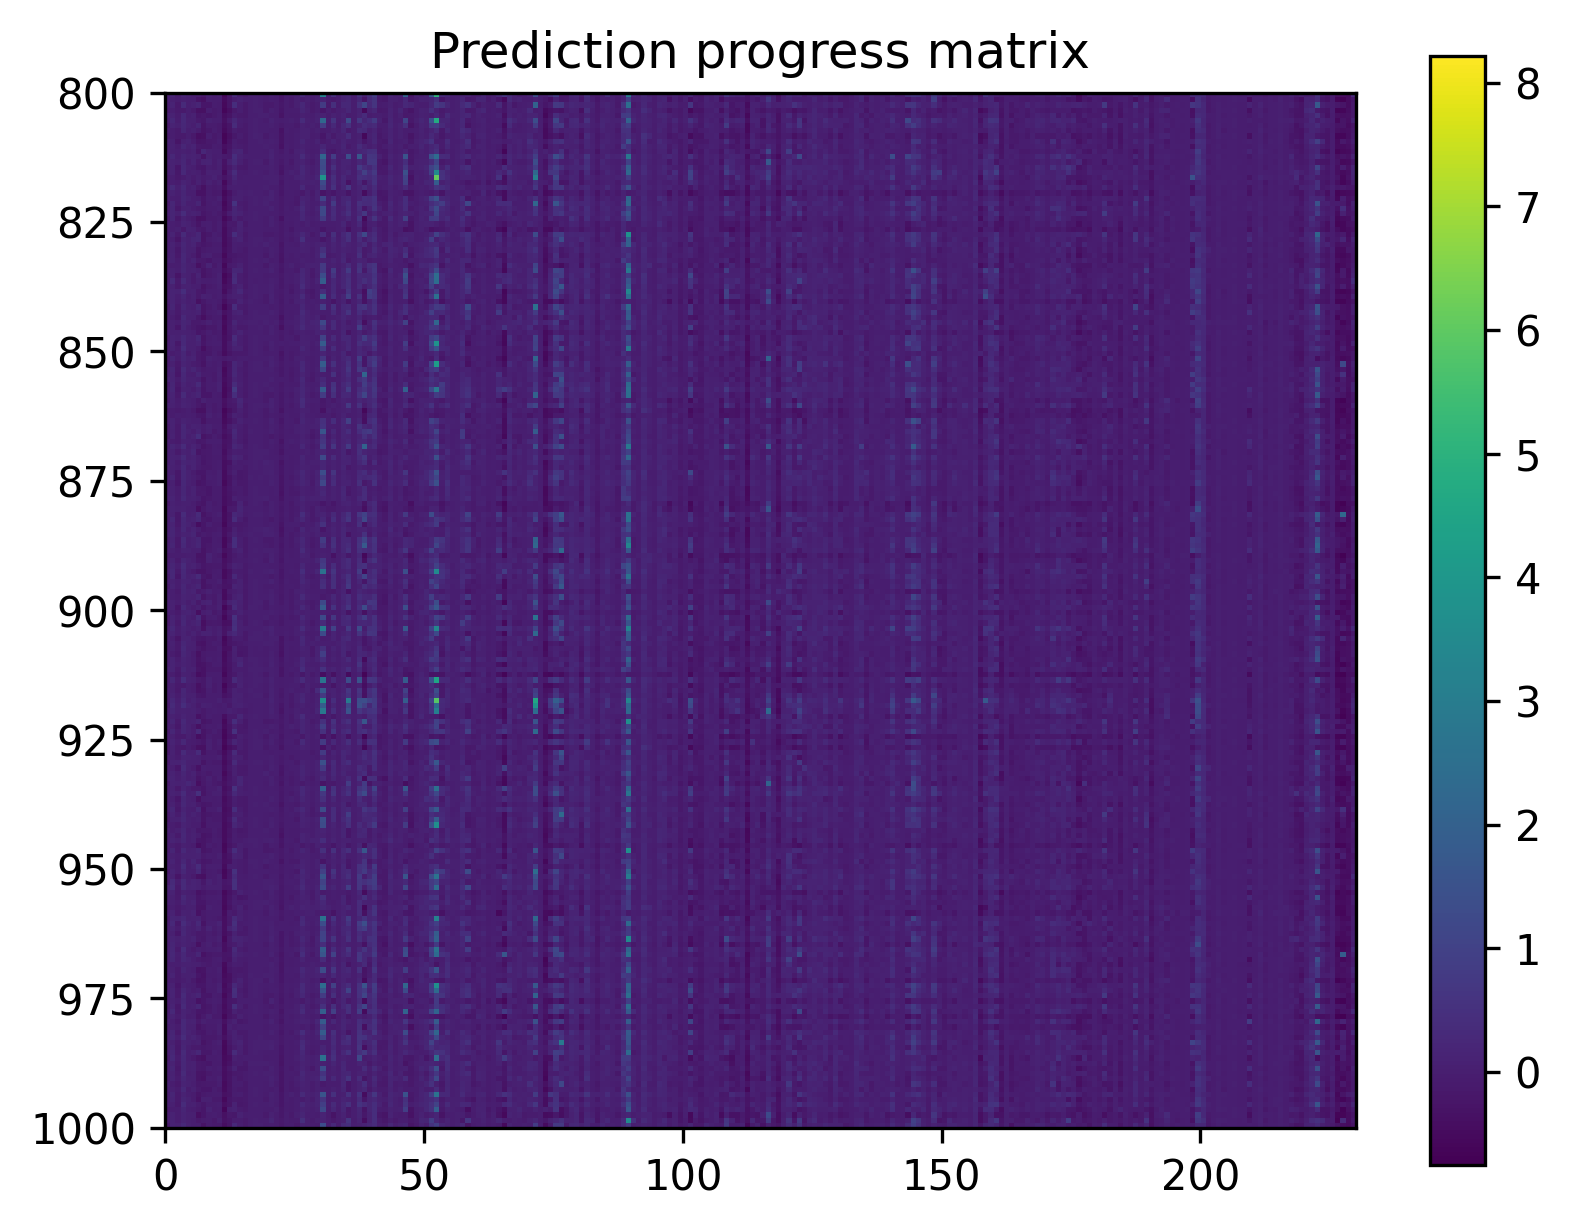

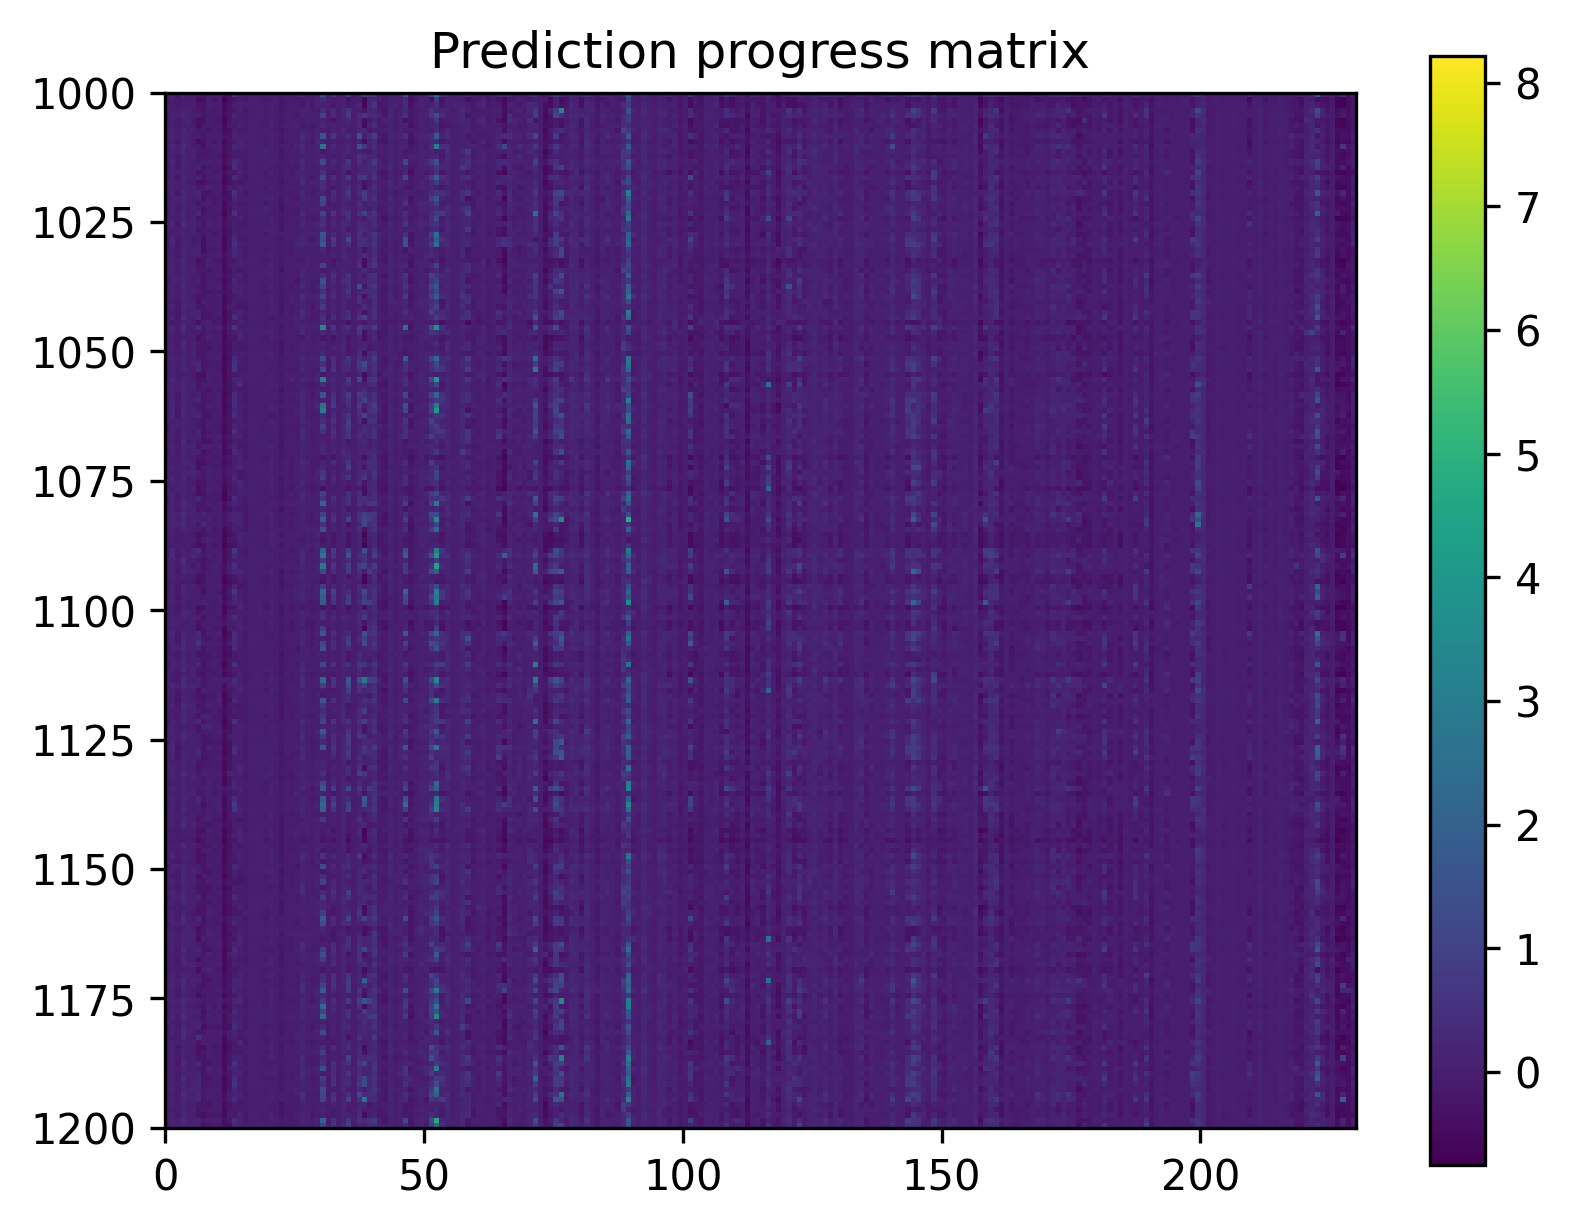

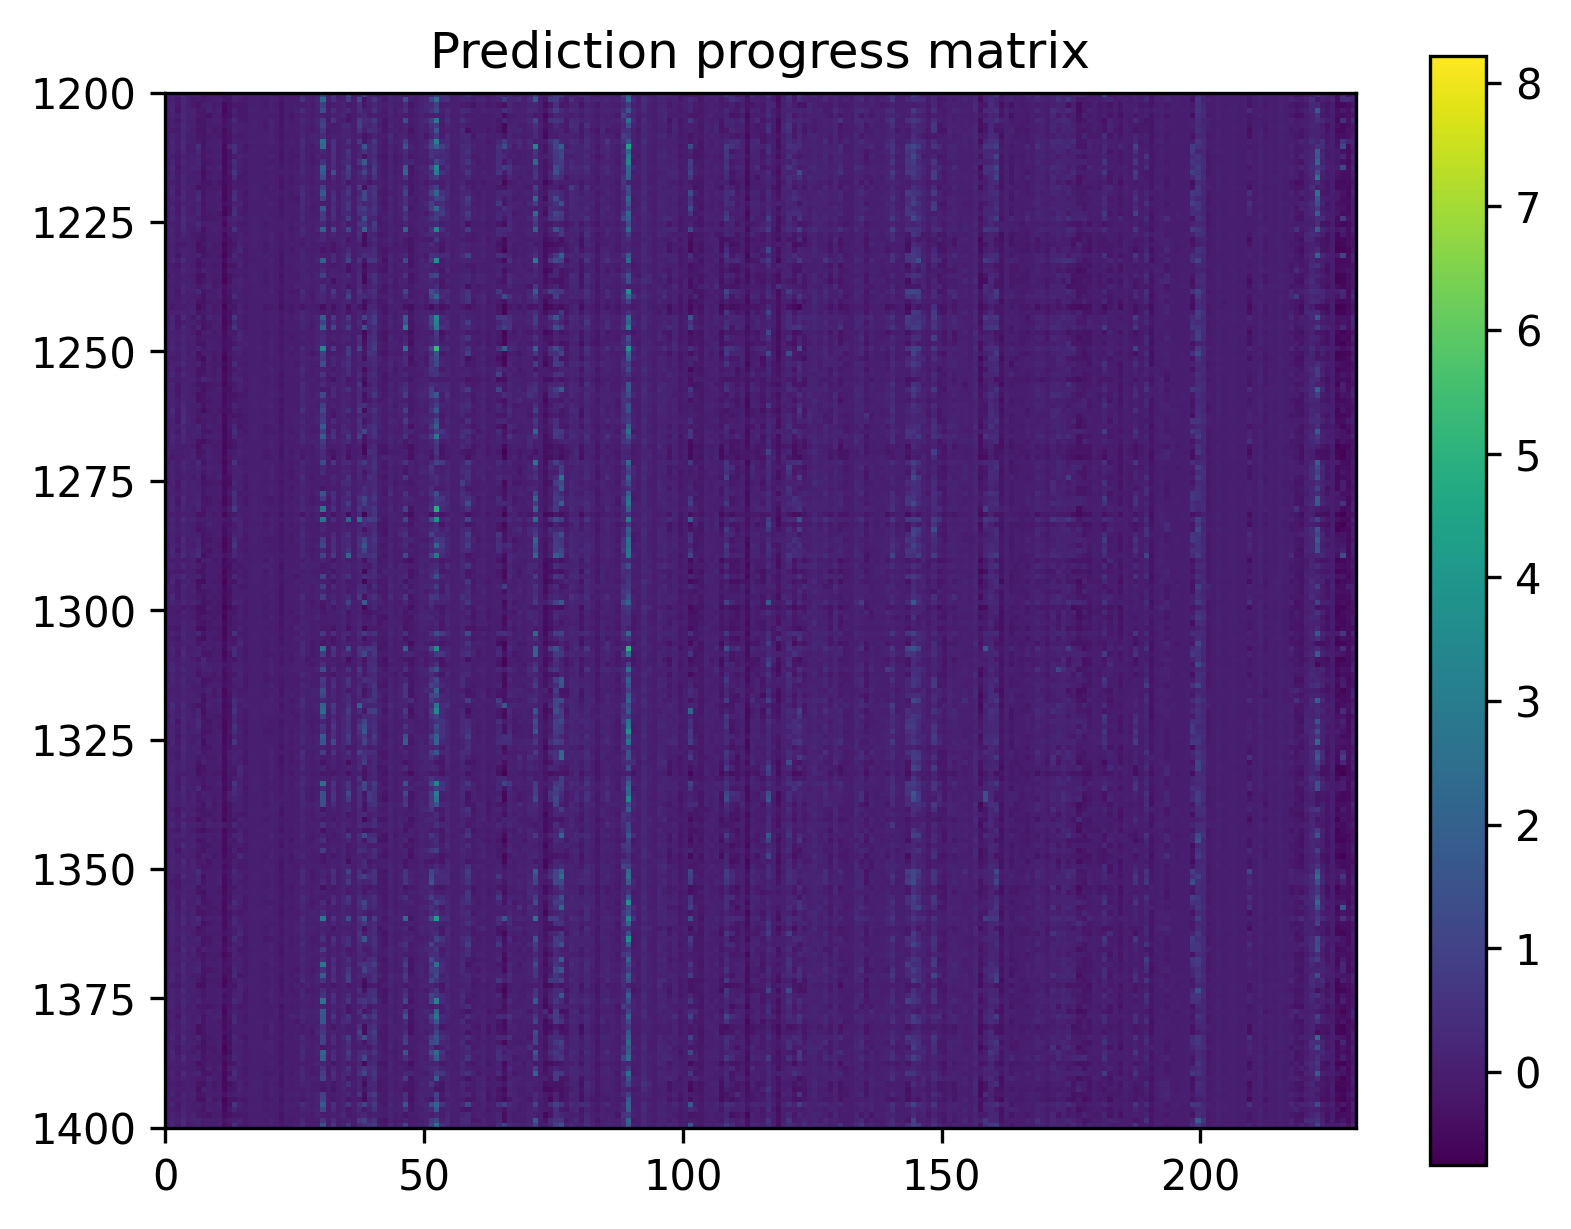

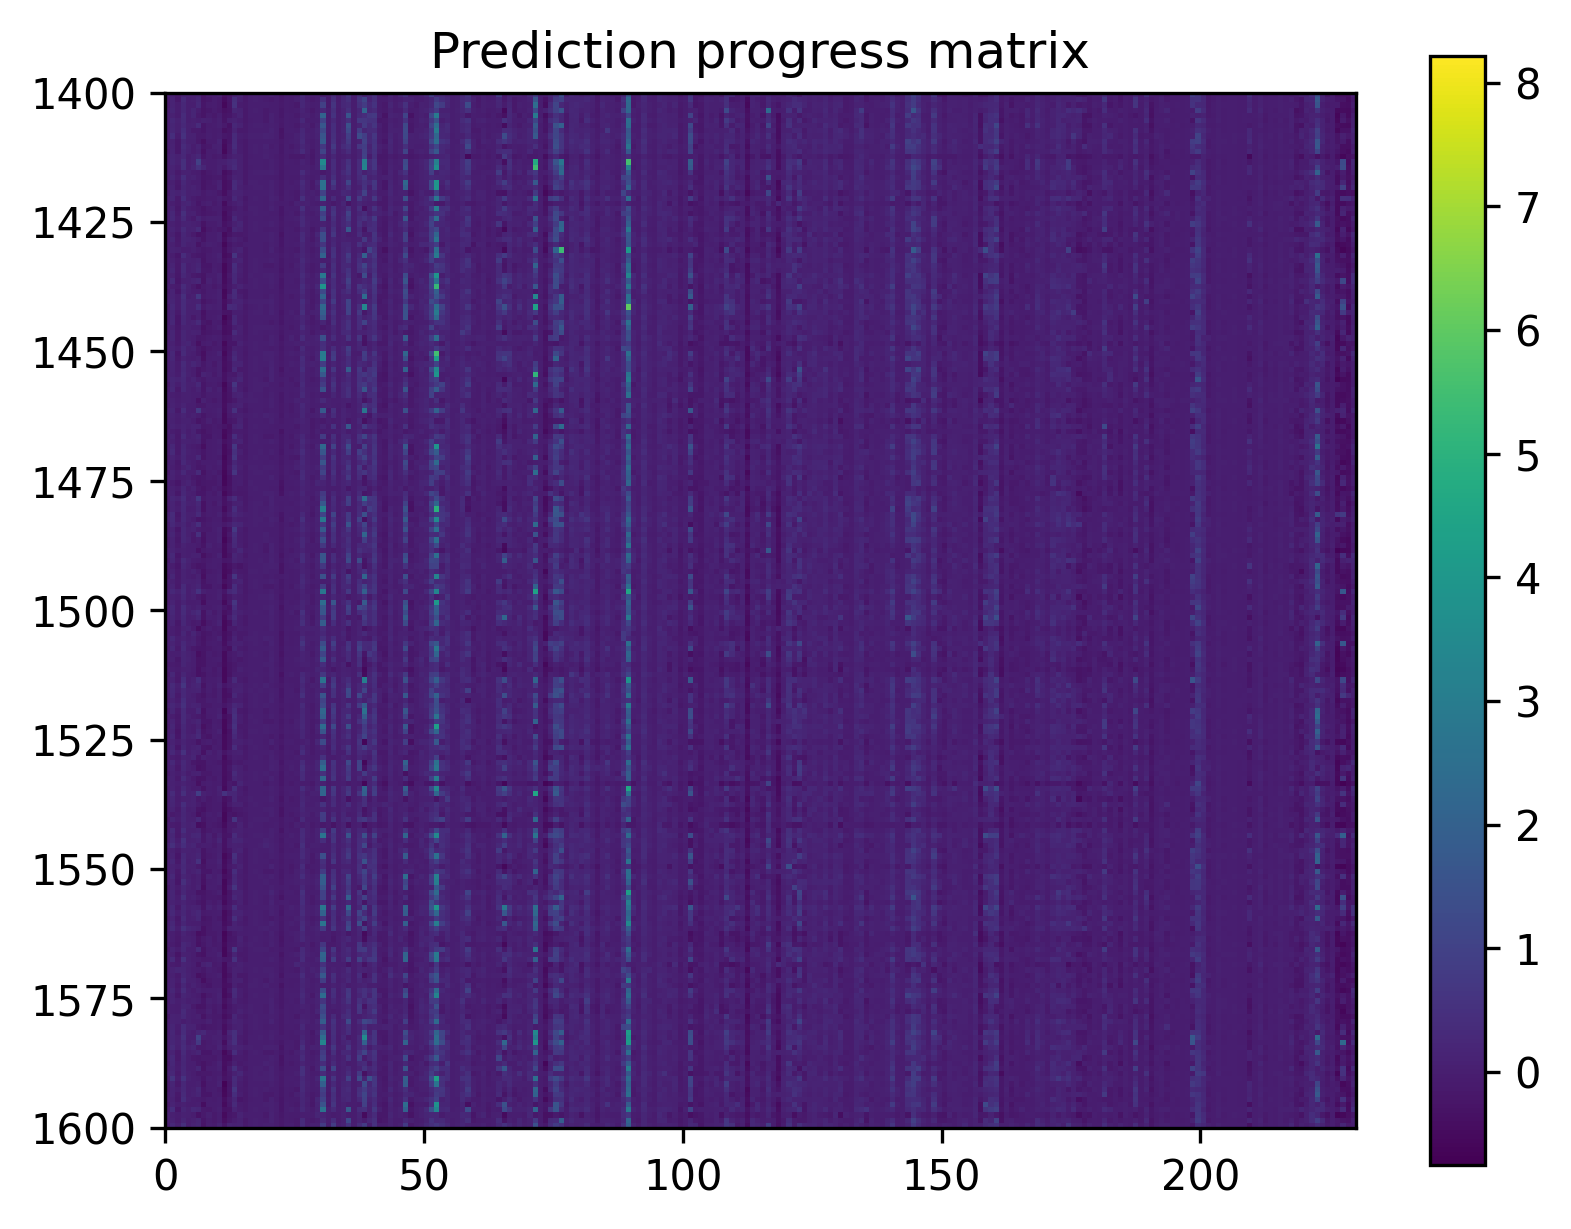

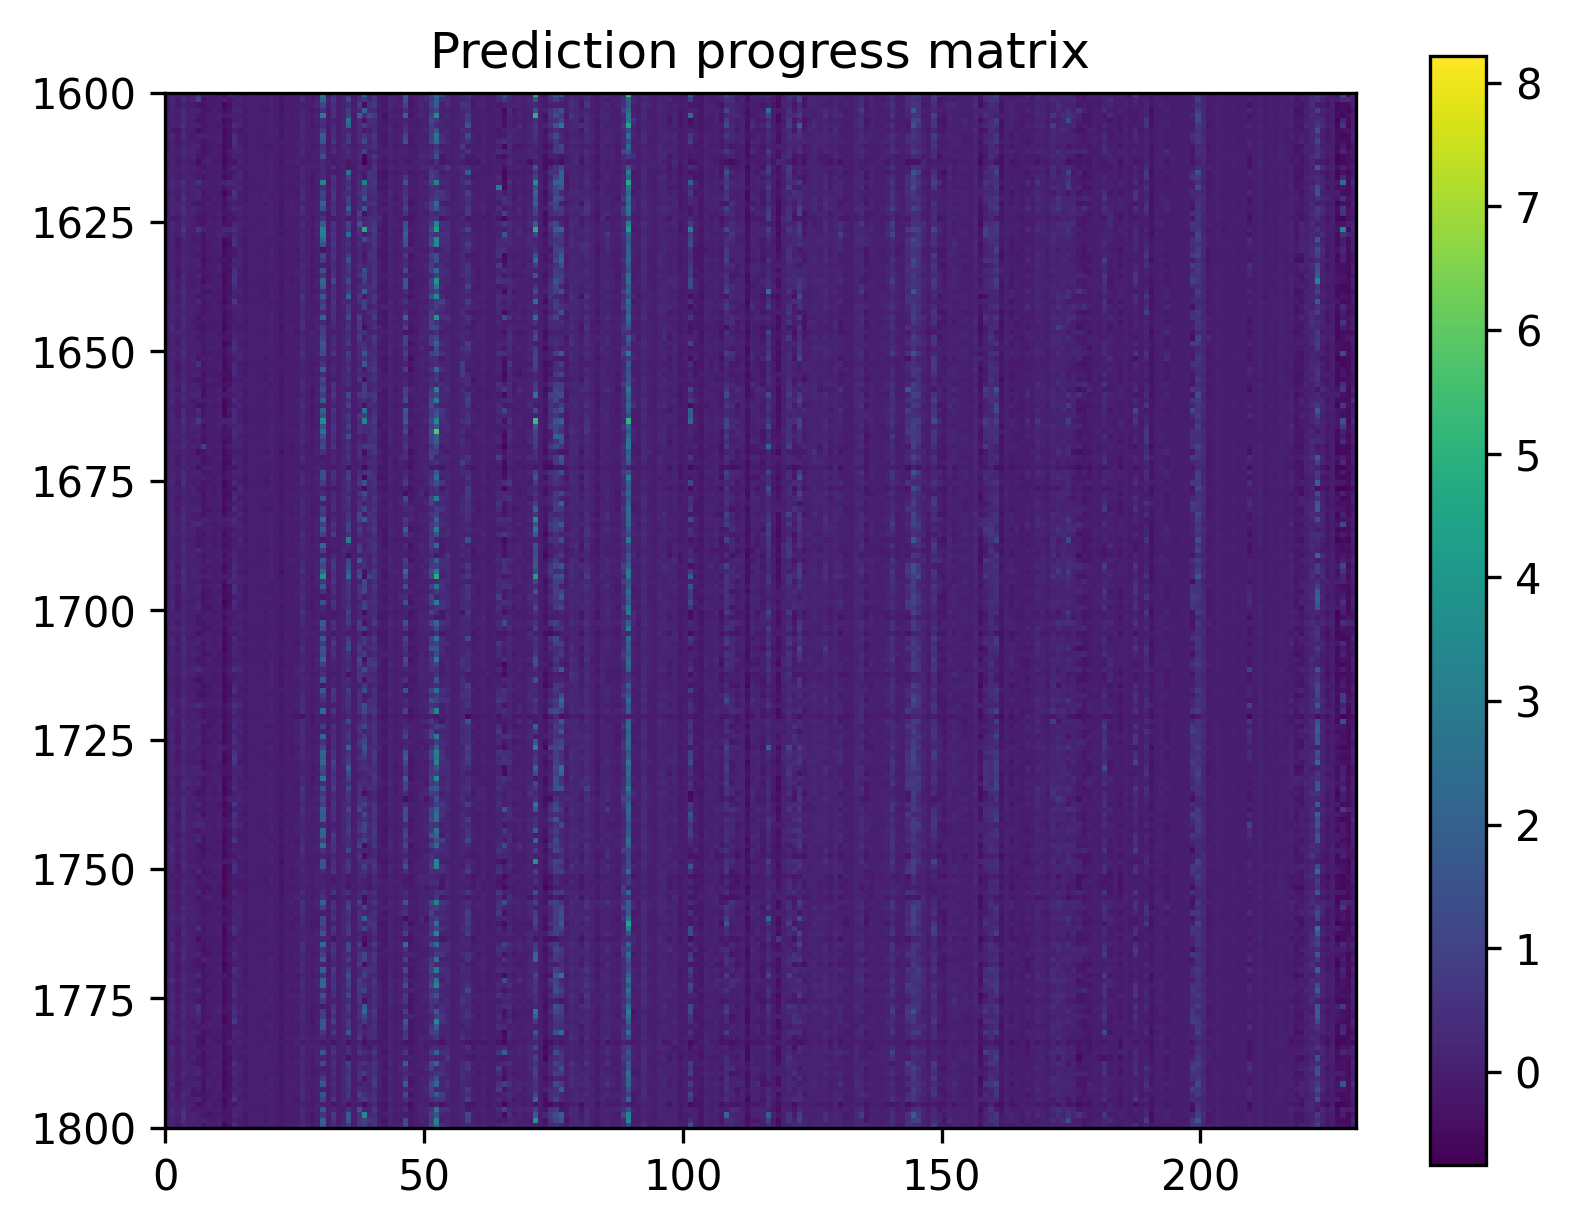

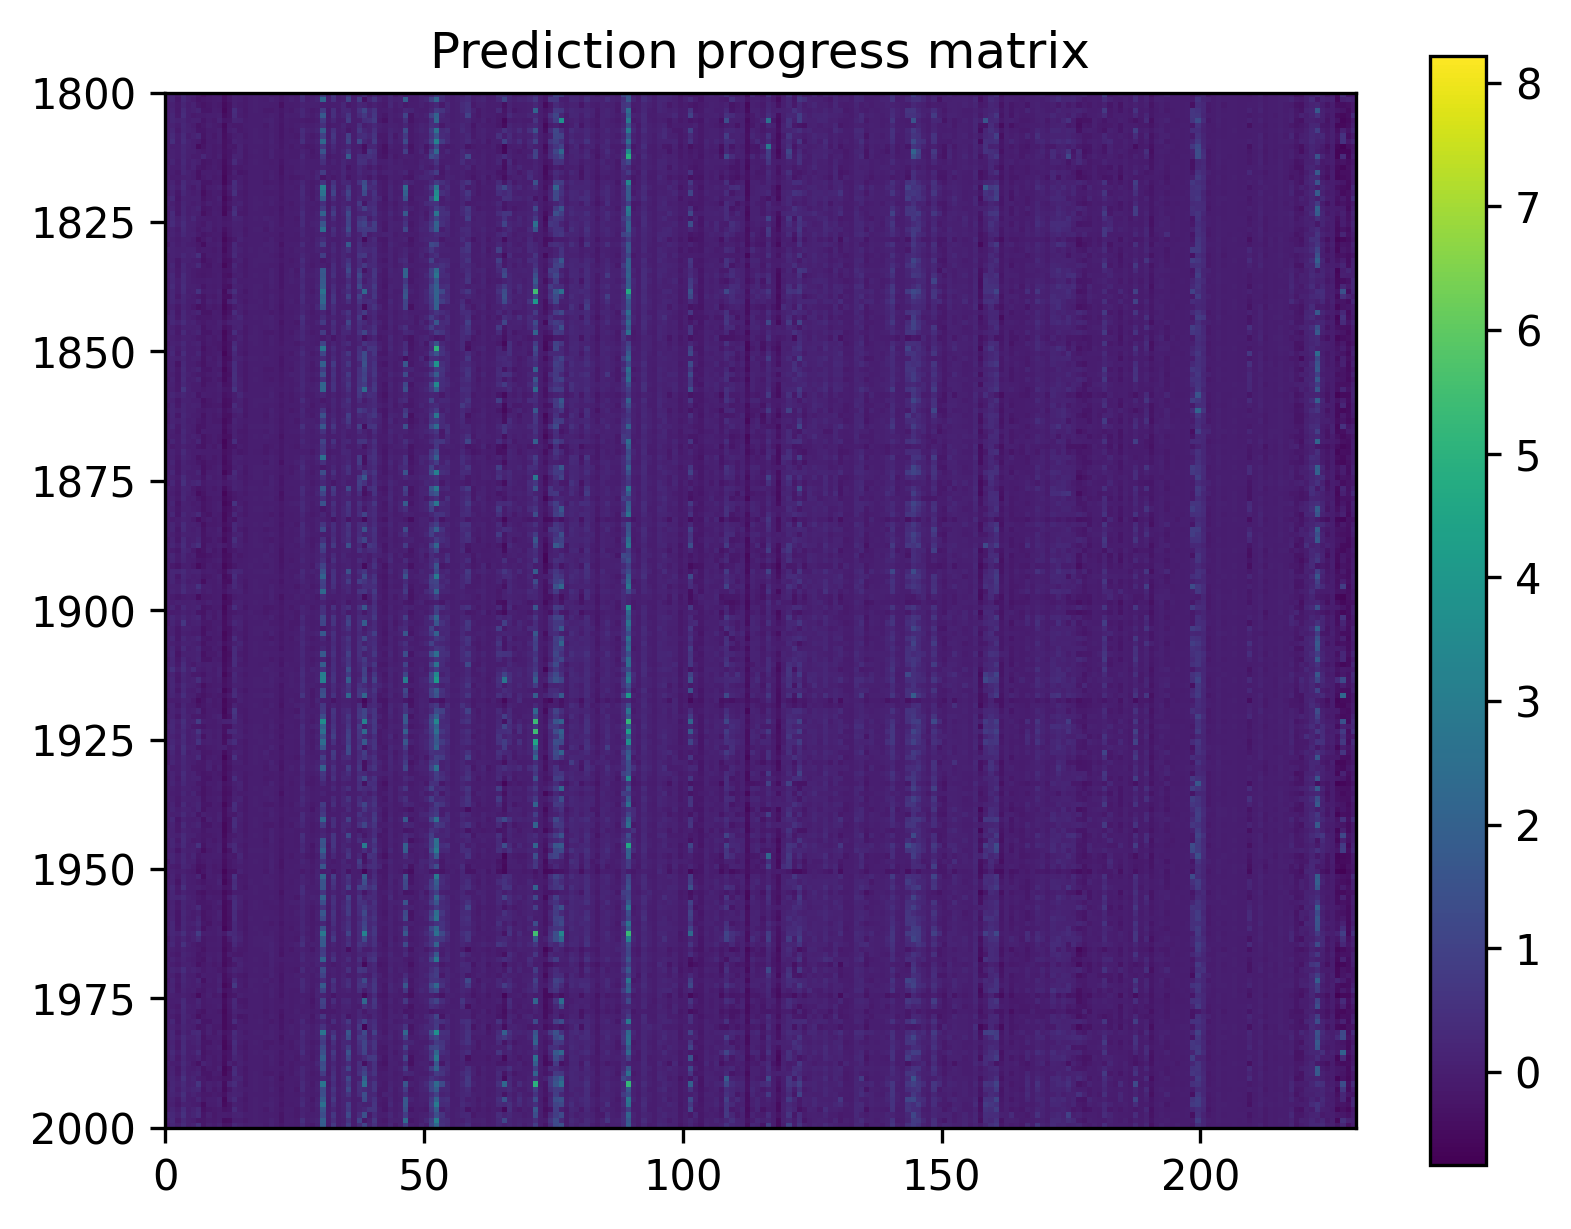

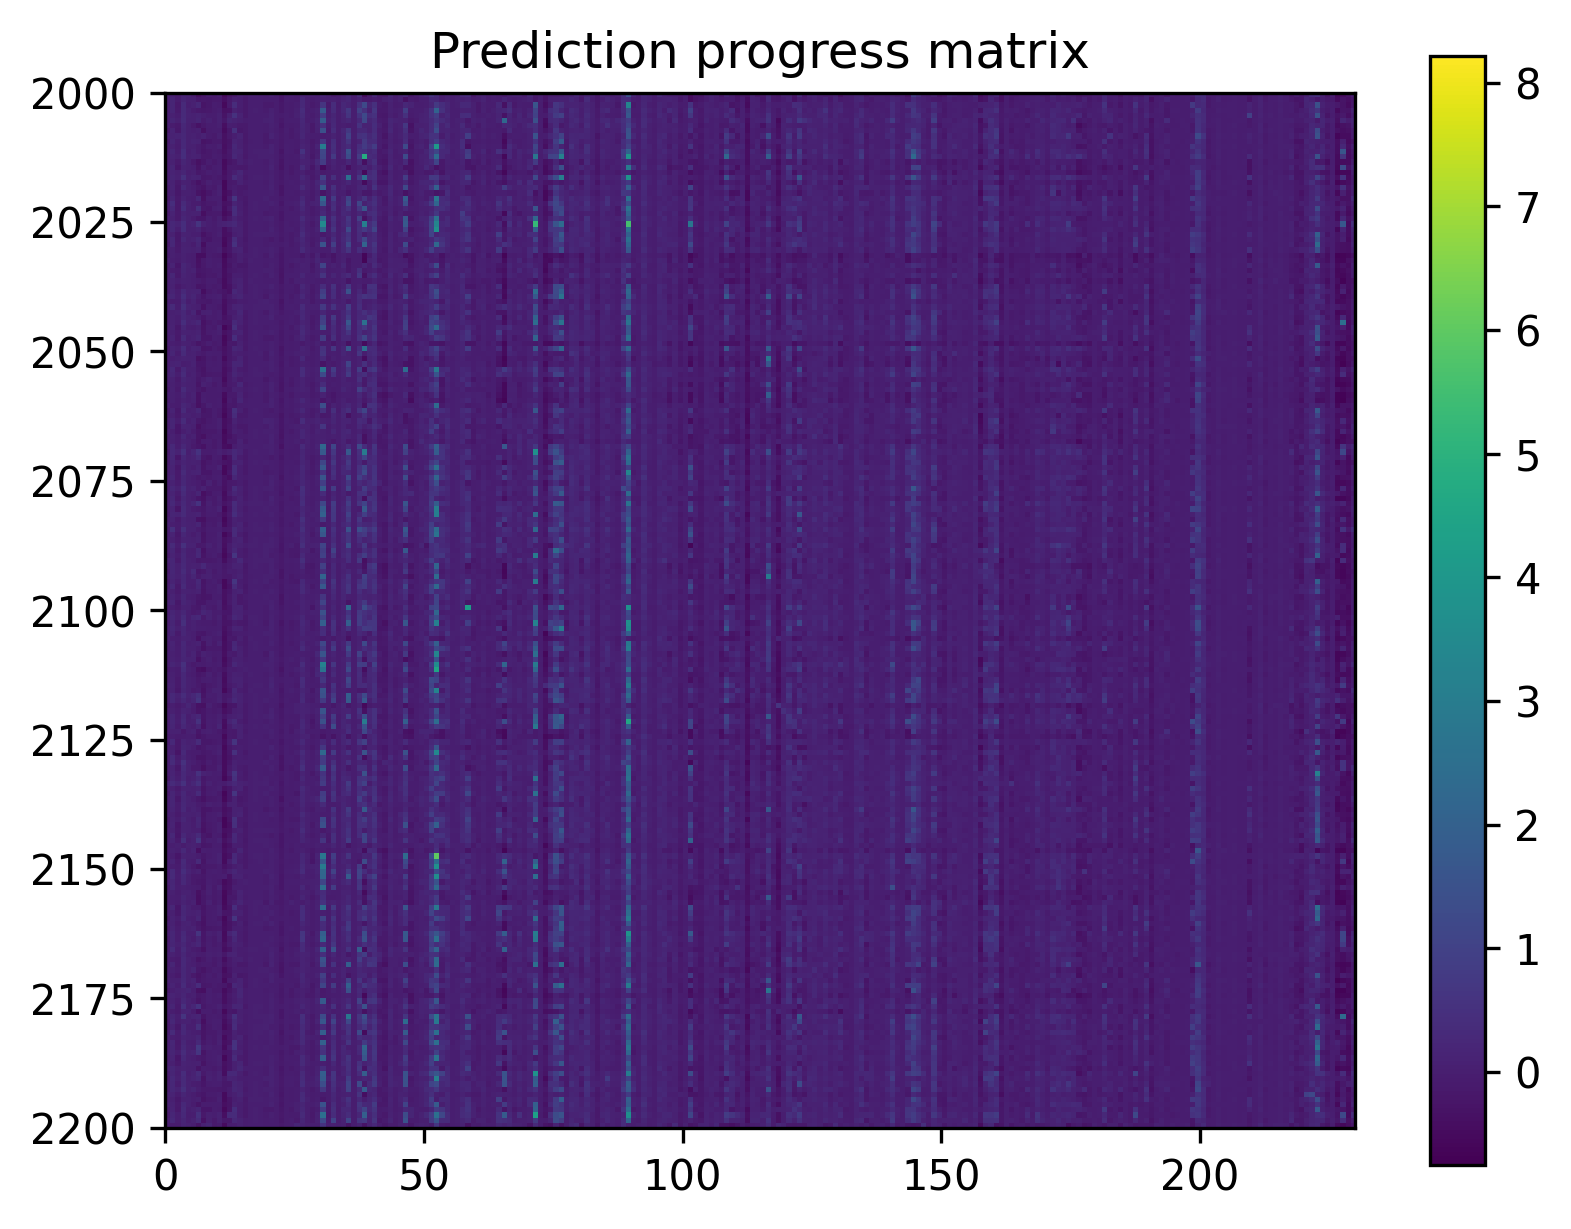

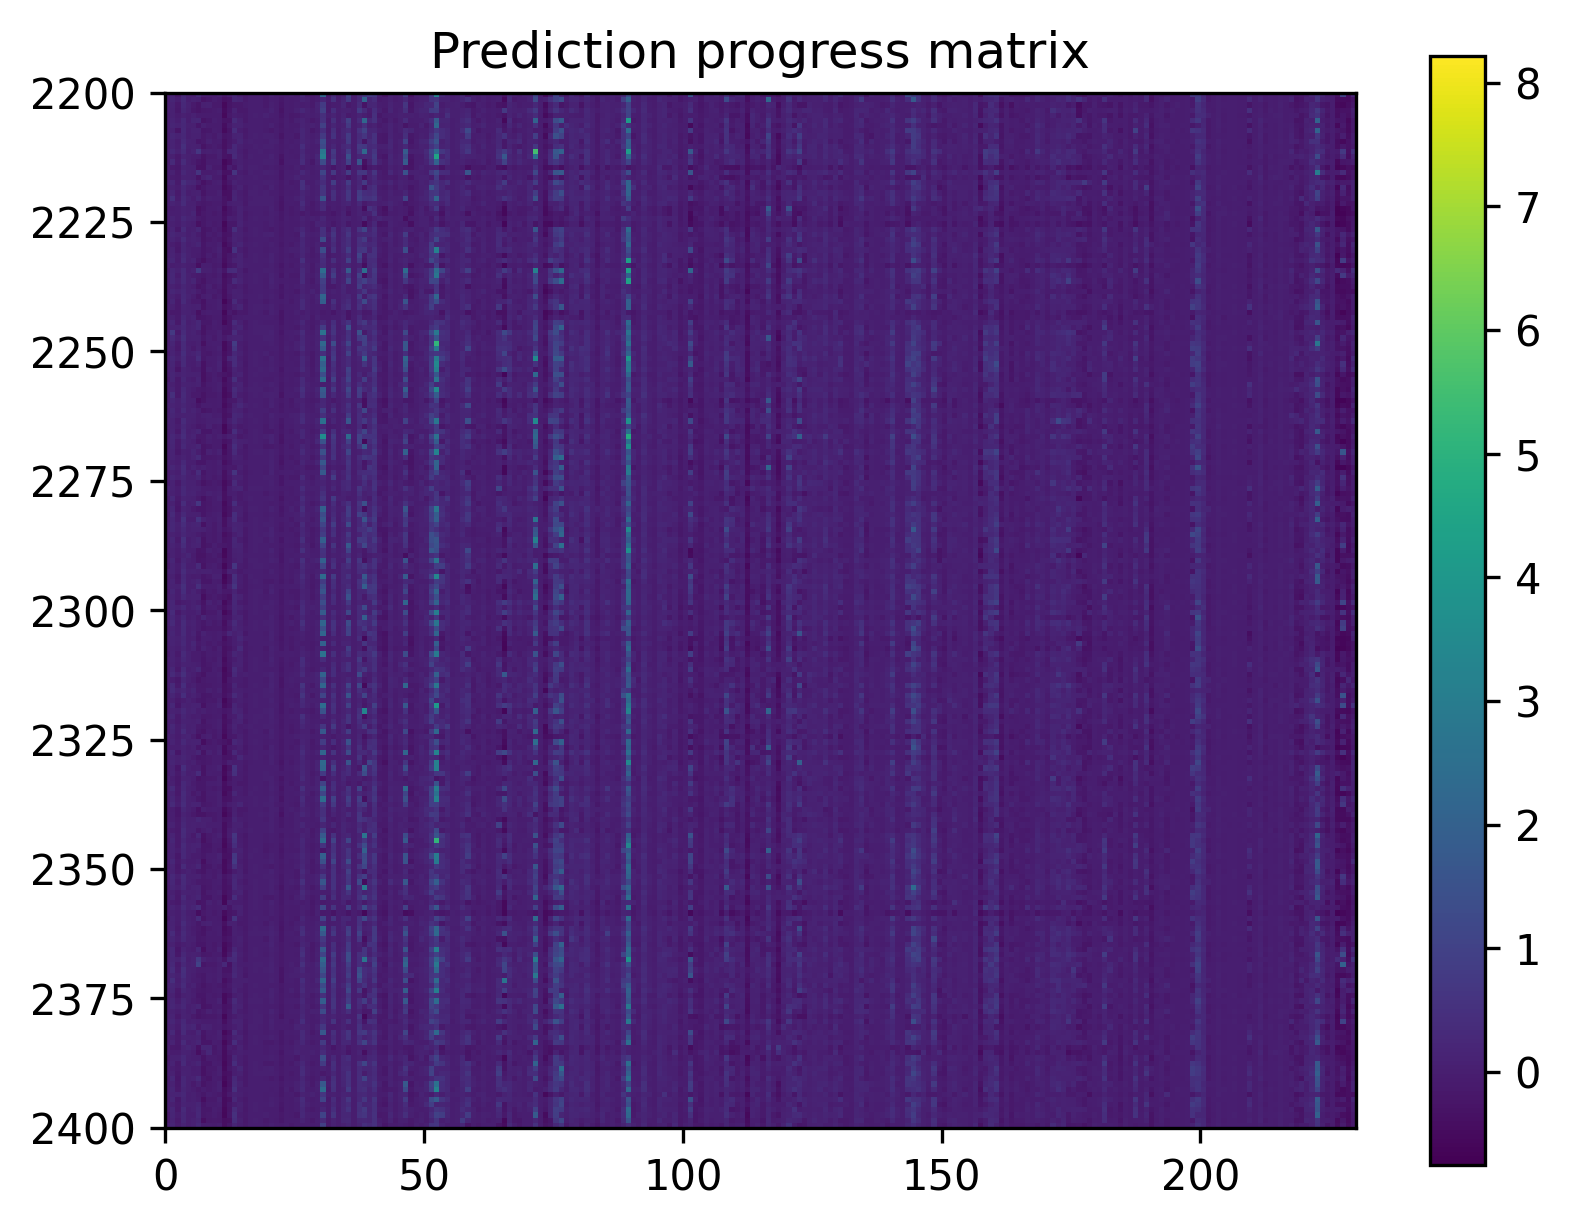

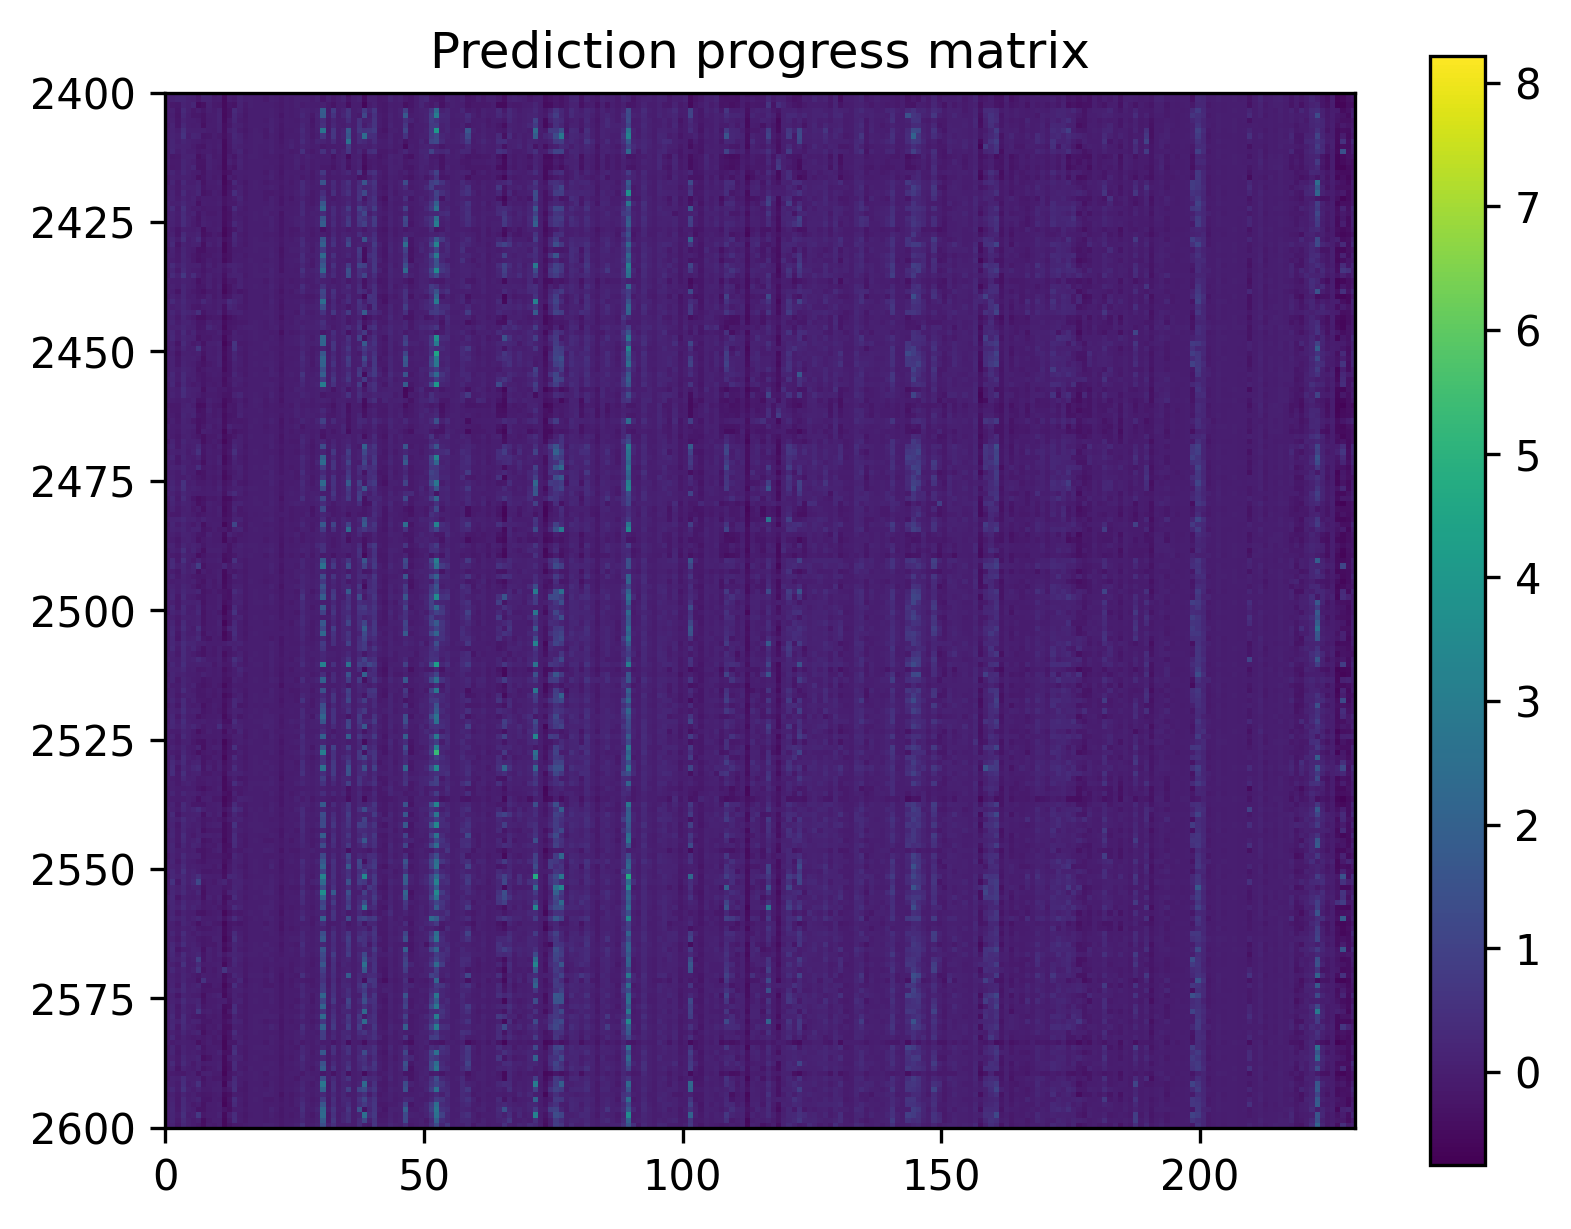

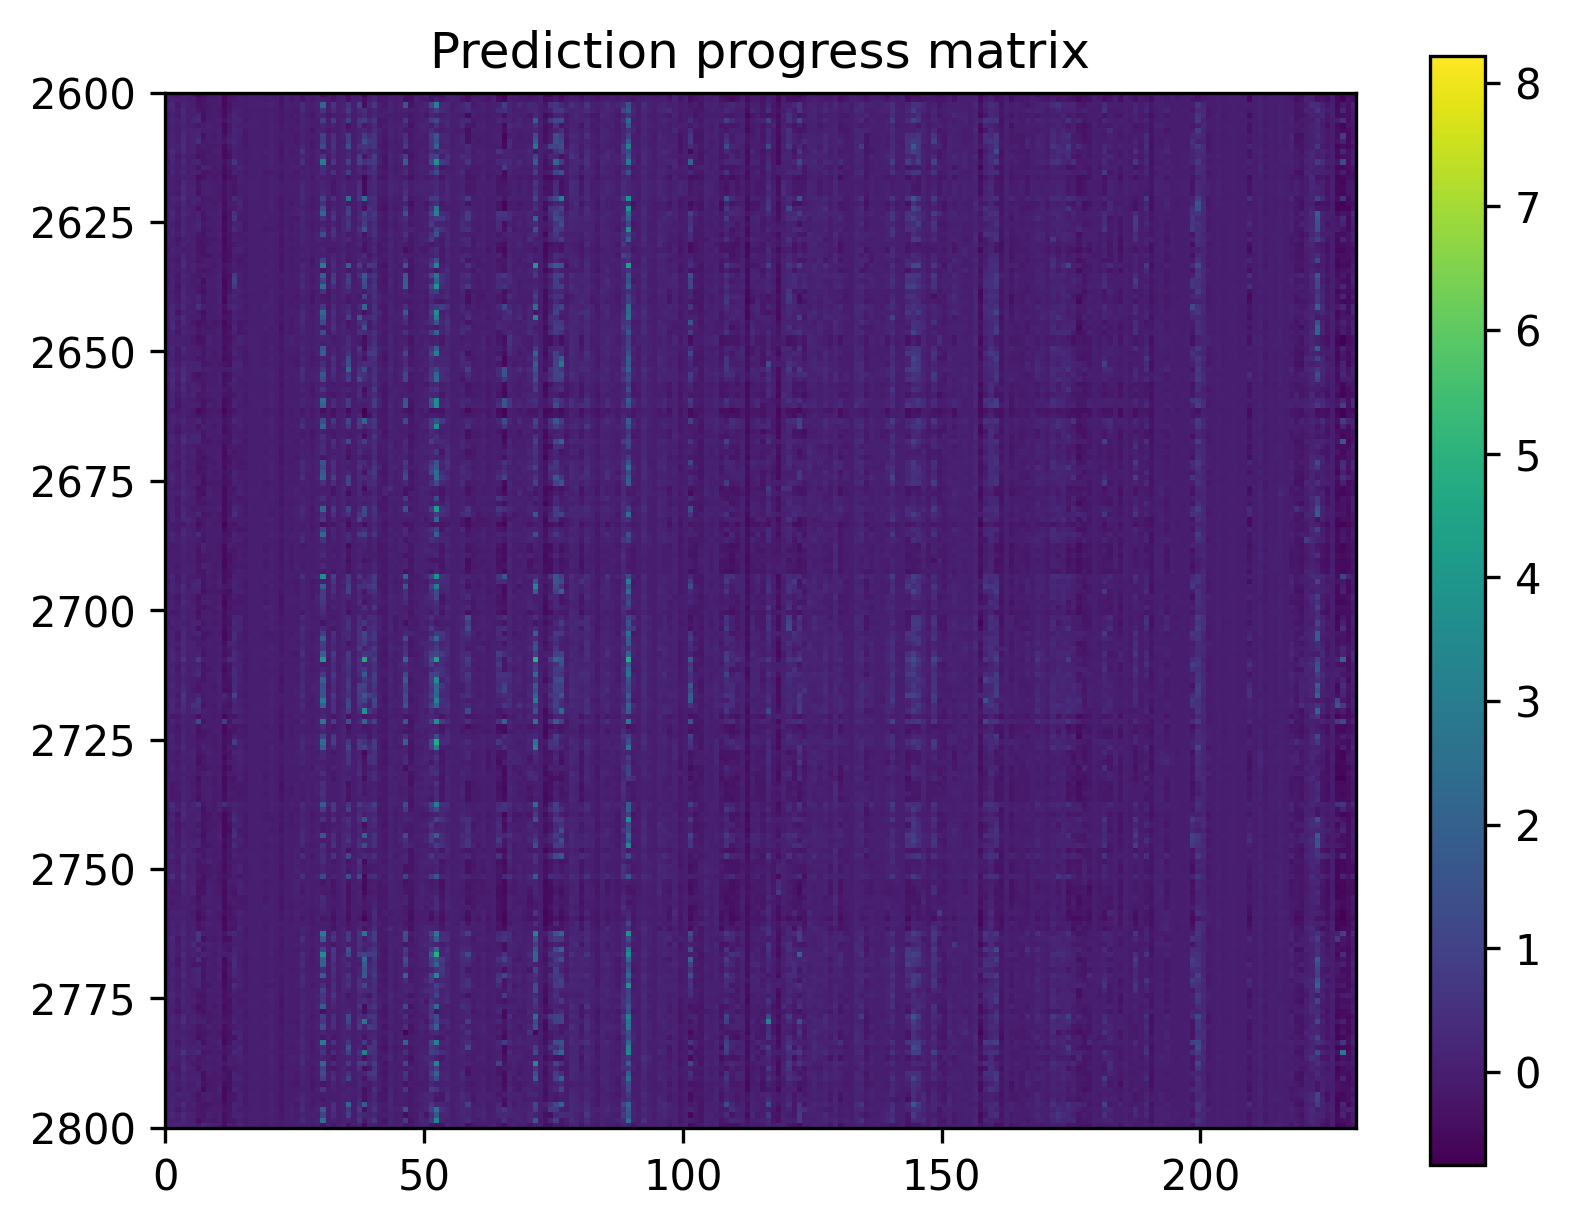

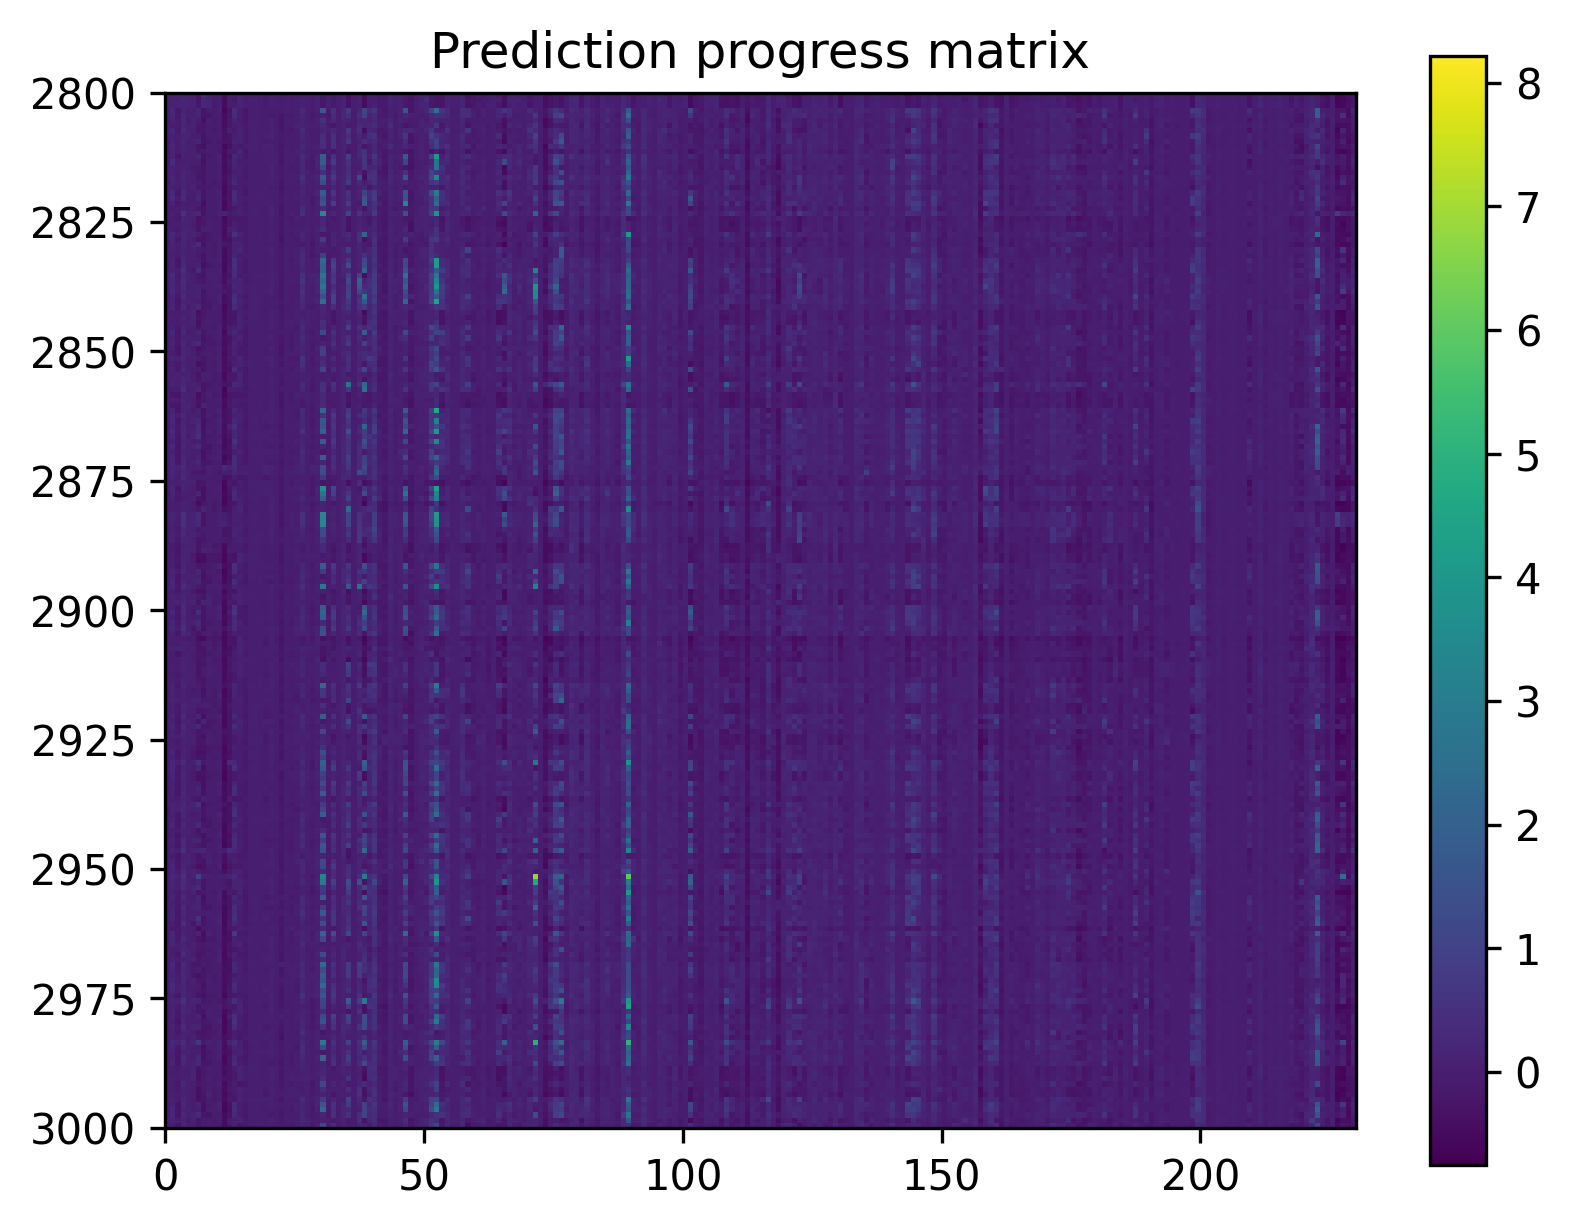

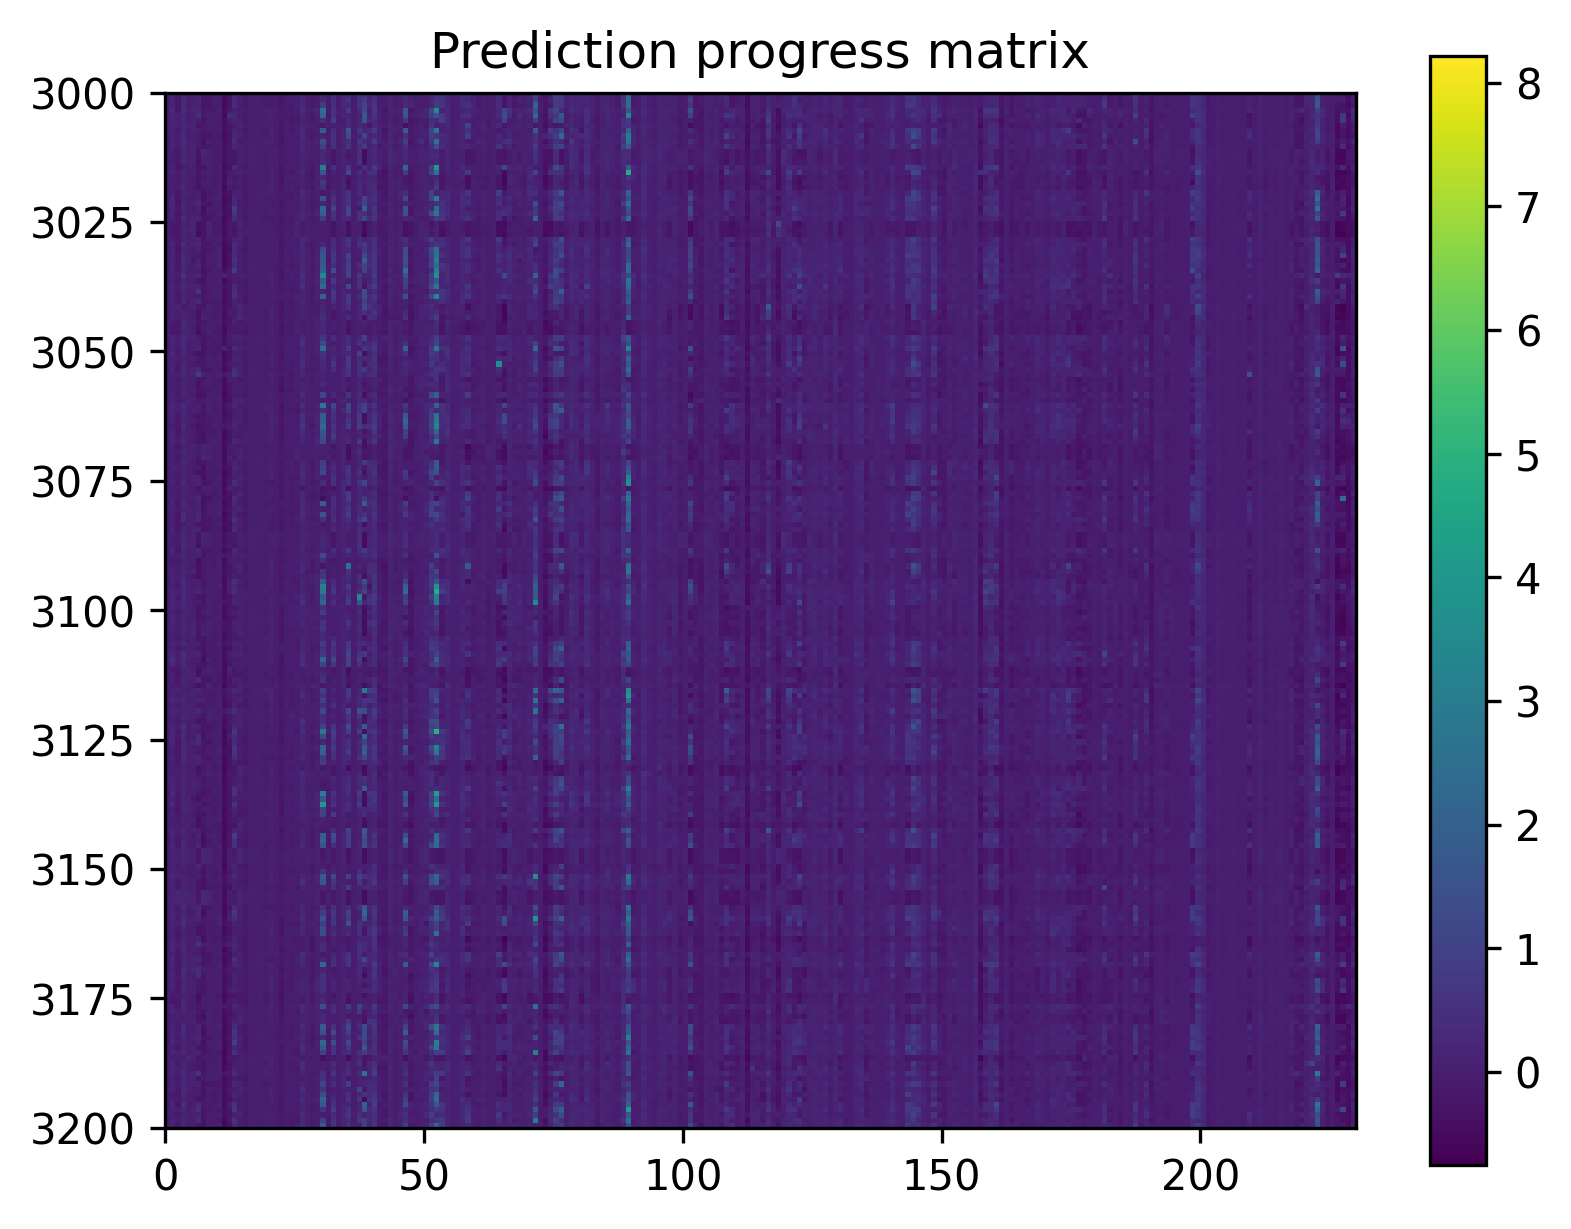

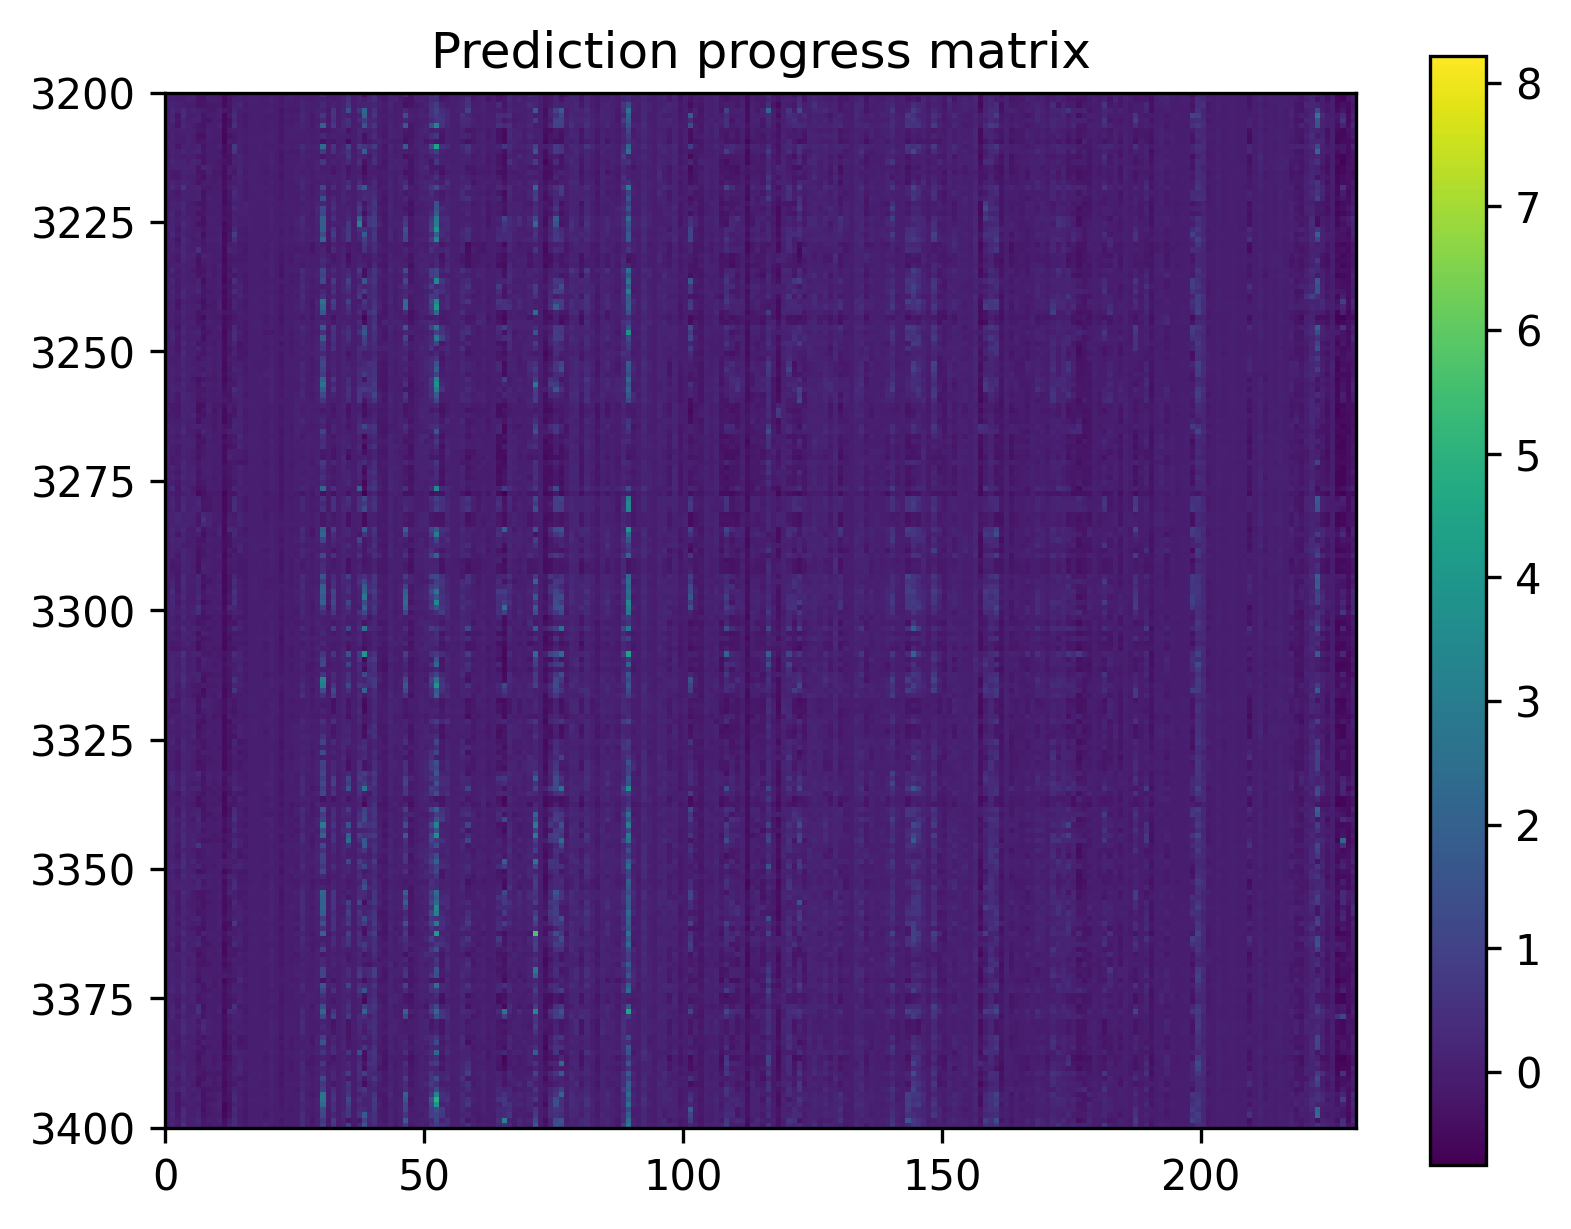

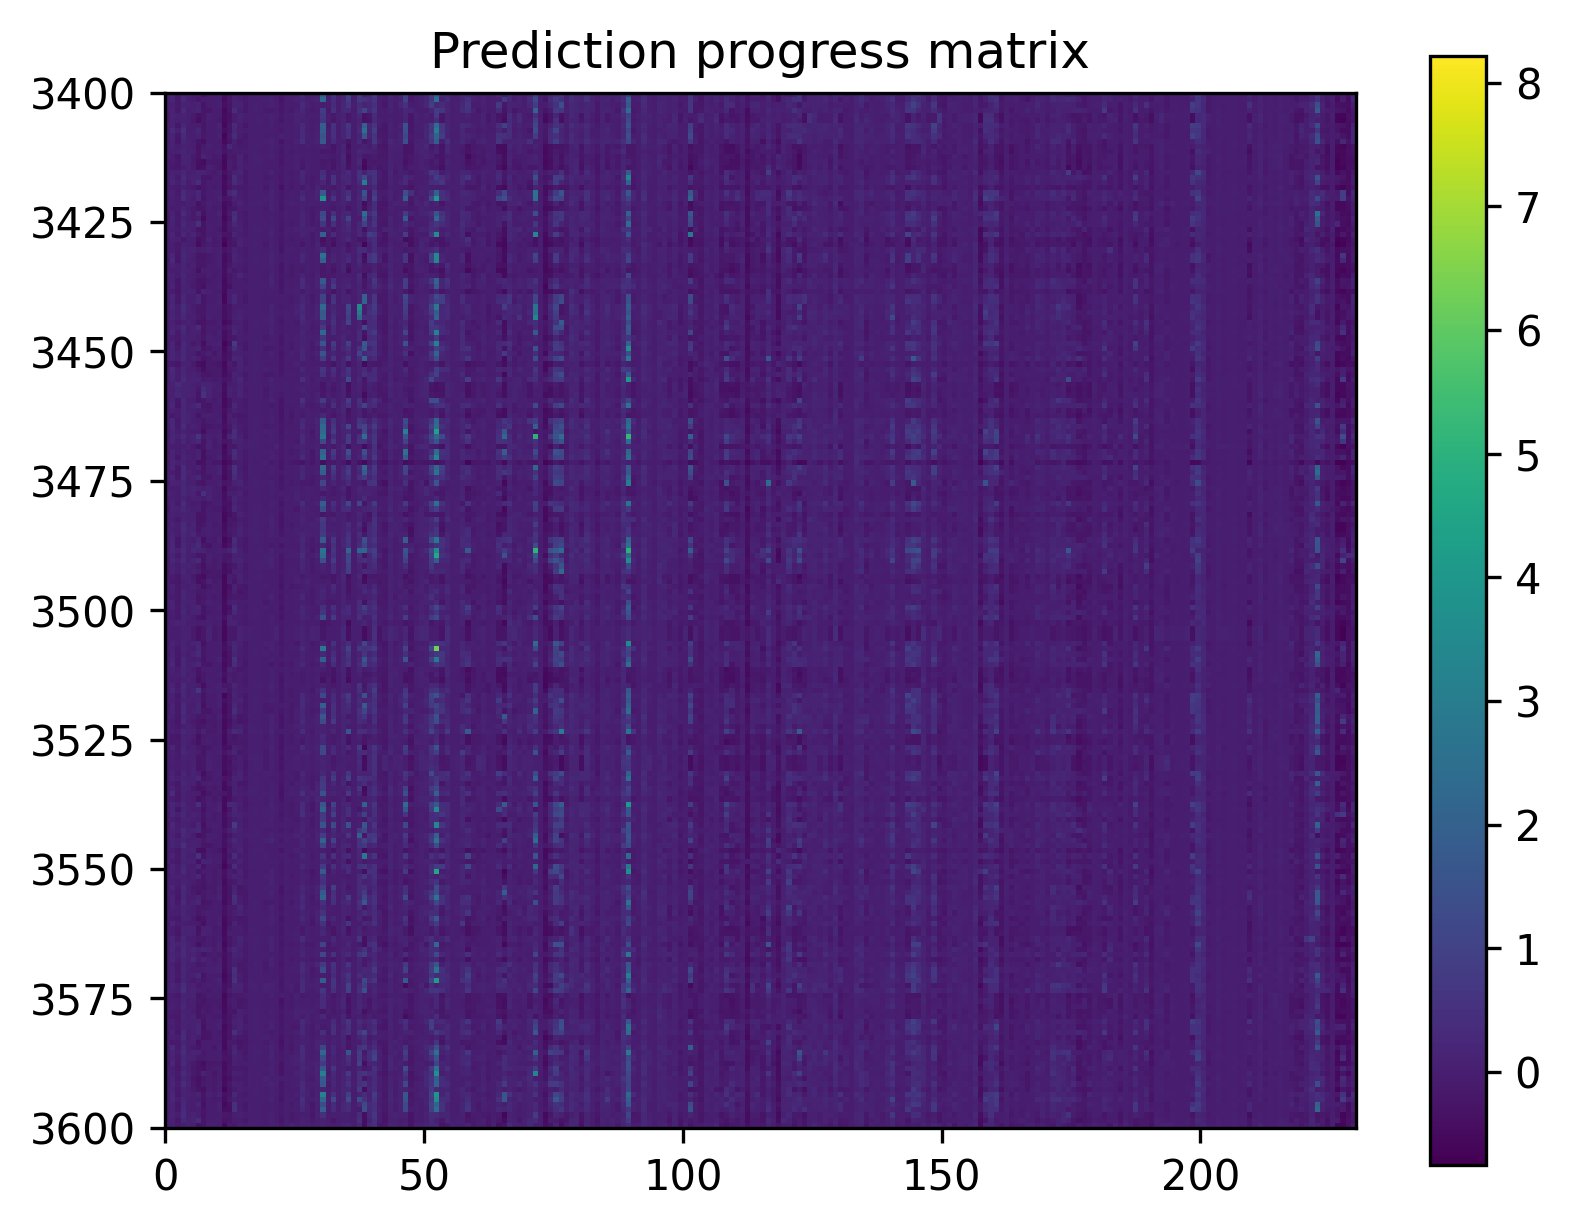

In [93]:
l = 200
for i in range(0, matrix_test.shape[0] // l):
    plot_matrix(matrix_test[i*l:(i+1)*l].flip(0),
                vmin=test_min, vmax=test_max, xmin=(i+1)*l, xmax=i*l)

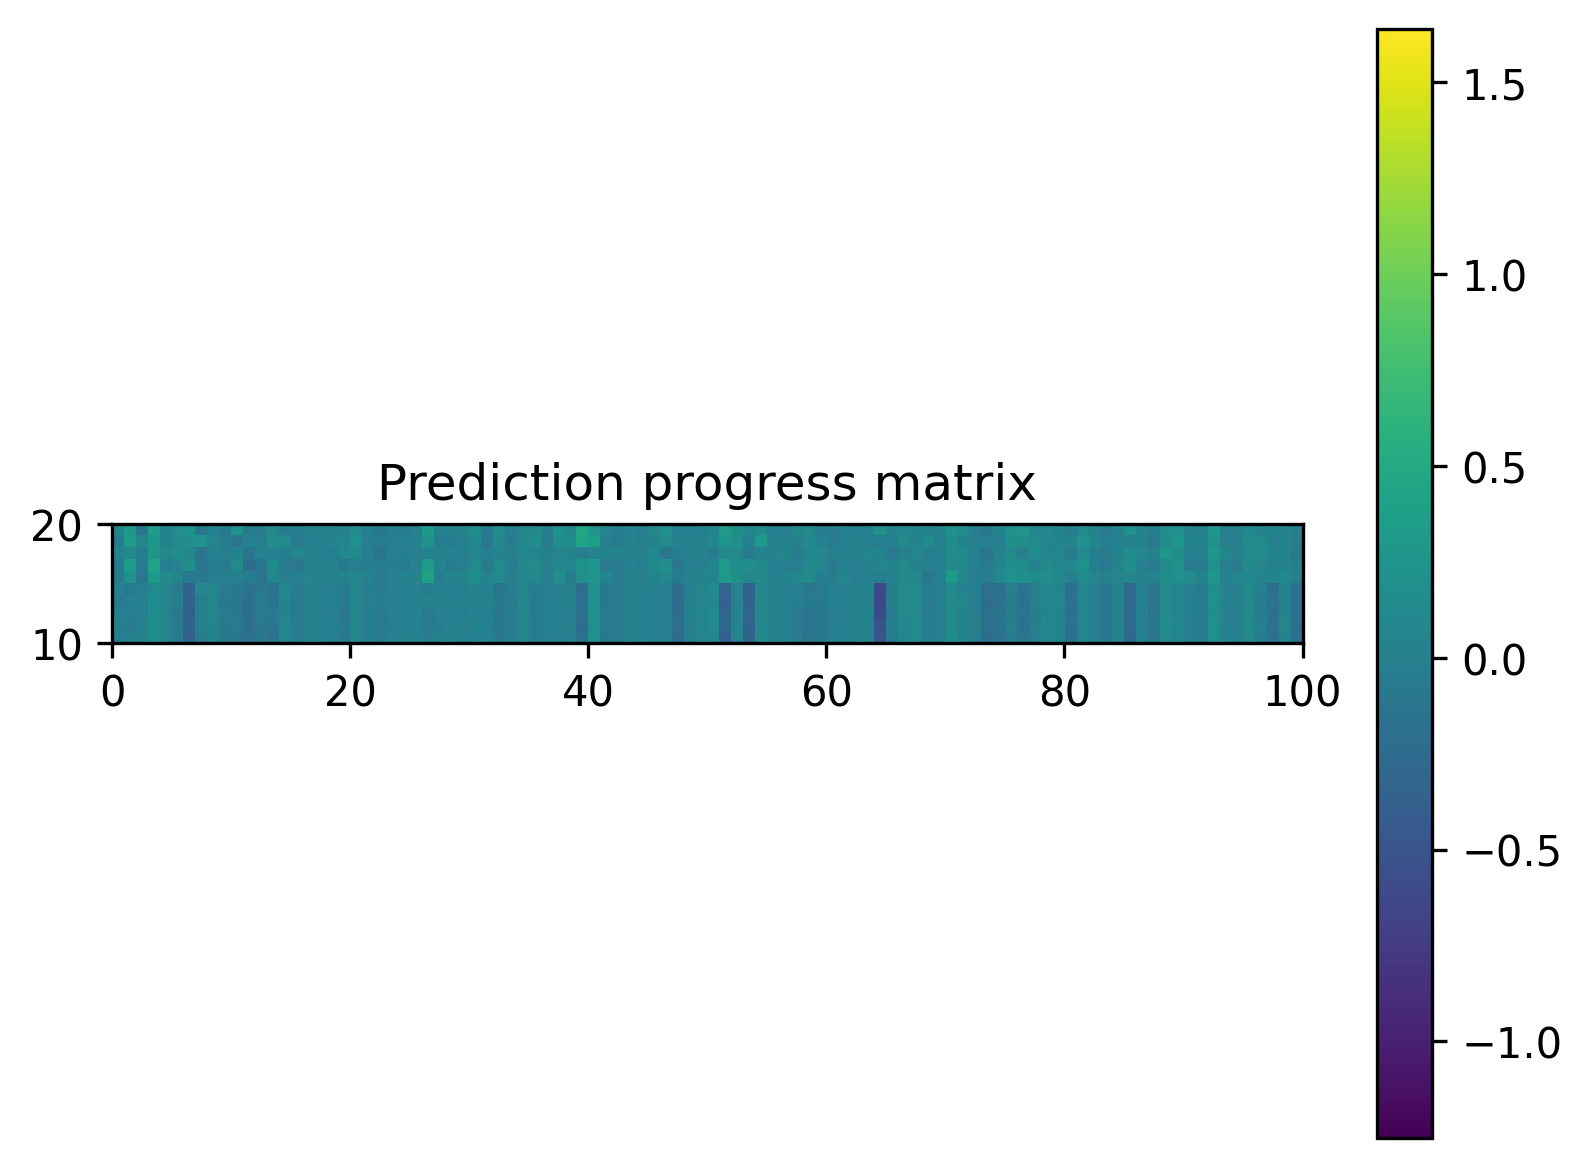

In [56]:
plot_matrix(matrix_test[10:20, :100], vmin=total_min, vmax=total_max, xmin=10, xmax=20)

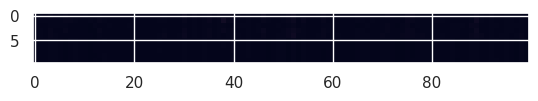

In [33]:
plt.imshow(matrix_test[10:20, :100], vmin=total_min, vmax=total_max)

In [34]:
t = torch.rand(10, 3)
print(t)
print(t.flip(0))

tensor([[0.2412, 0.5130, 0.4643],
        [0.5497, 0.1231, 0.8335],
        [0.7829, 0.8953, 0.2524],
        [0.6974, 0.2316, 0.3274],
        [0.2509, 0.7217, 0.7779],
        [0.0951, 0.0779, 0.5522],
        [0.3859, 0.4388, 0.4205],
        [0.2128, 0.8163, 0.3538],
        [0.9467, 0.5916, 0.3613],
        [0.8060, 0.1923, 0.6322]])
tensor([[0.8060, 0.1923, 0.6322],
        [0.9467, 0.5916, 0.3613],
        [0.2128, 0.8163, 0.3538],
        [0.3859, 0.4388, 0.4205],
        [0.0951, 0.0779, 0.5522],
        [0.2509, 0.7217, 0.7779],
        [0.6974, 0.2316, 0.3274],
        [0.7829, 0.8953, 0.2524],
        [0.5497, 0.1231, 0.8335],
        [0.2412, 0.5130, 0.4643]])


In [94]:
dataset_test_archive[1000].origin

'aces'

In [95]:
colors = sample_colormap('viridis', 4)
colordict = {k: v for (k, v) in zip(['train', 'elm', 'rd_gen', 'aces'], colors)}
data_color = [colordict[p.origin] for p in dataset_test_archive]

In [96]:
colordict

{'train': array([0.267004, 0.004874, 0.329415, 1.      ]),
 'elm': array([0.190631, 0.407061, 0.556089, 1.      ]),
 'rd_gen': array([0.20803 , 0.718701, 0.472873, 1.      ]),
 'aces': array([0.993248, 0.906157, 0.143936, 1.      ])}

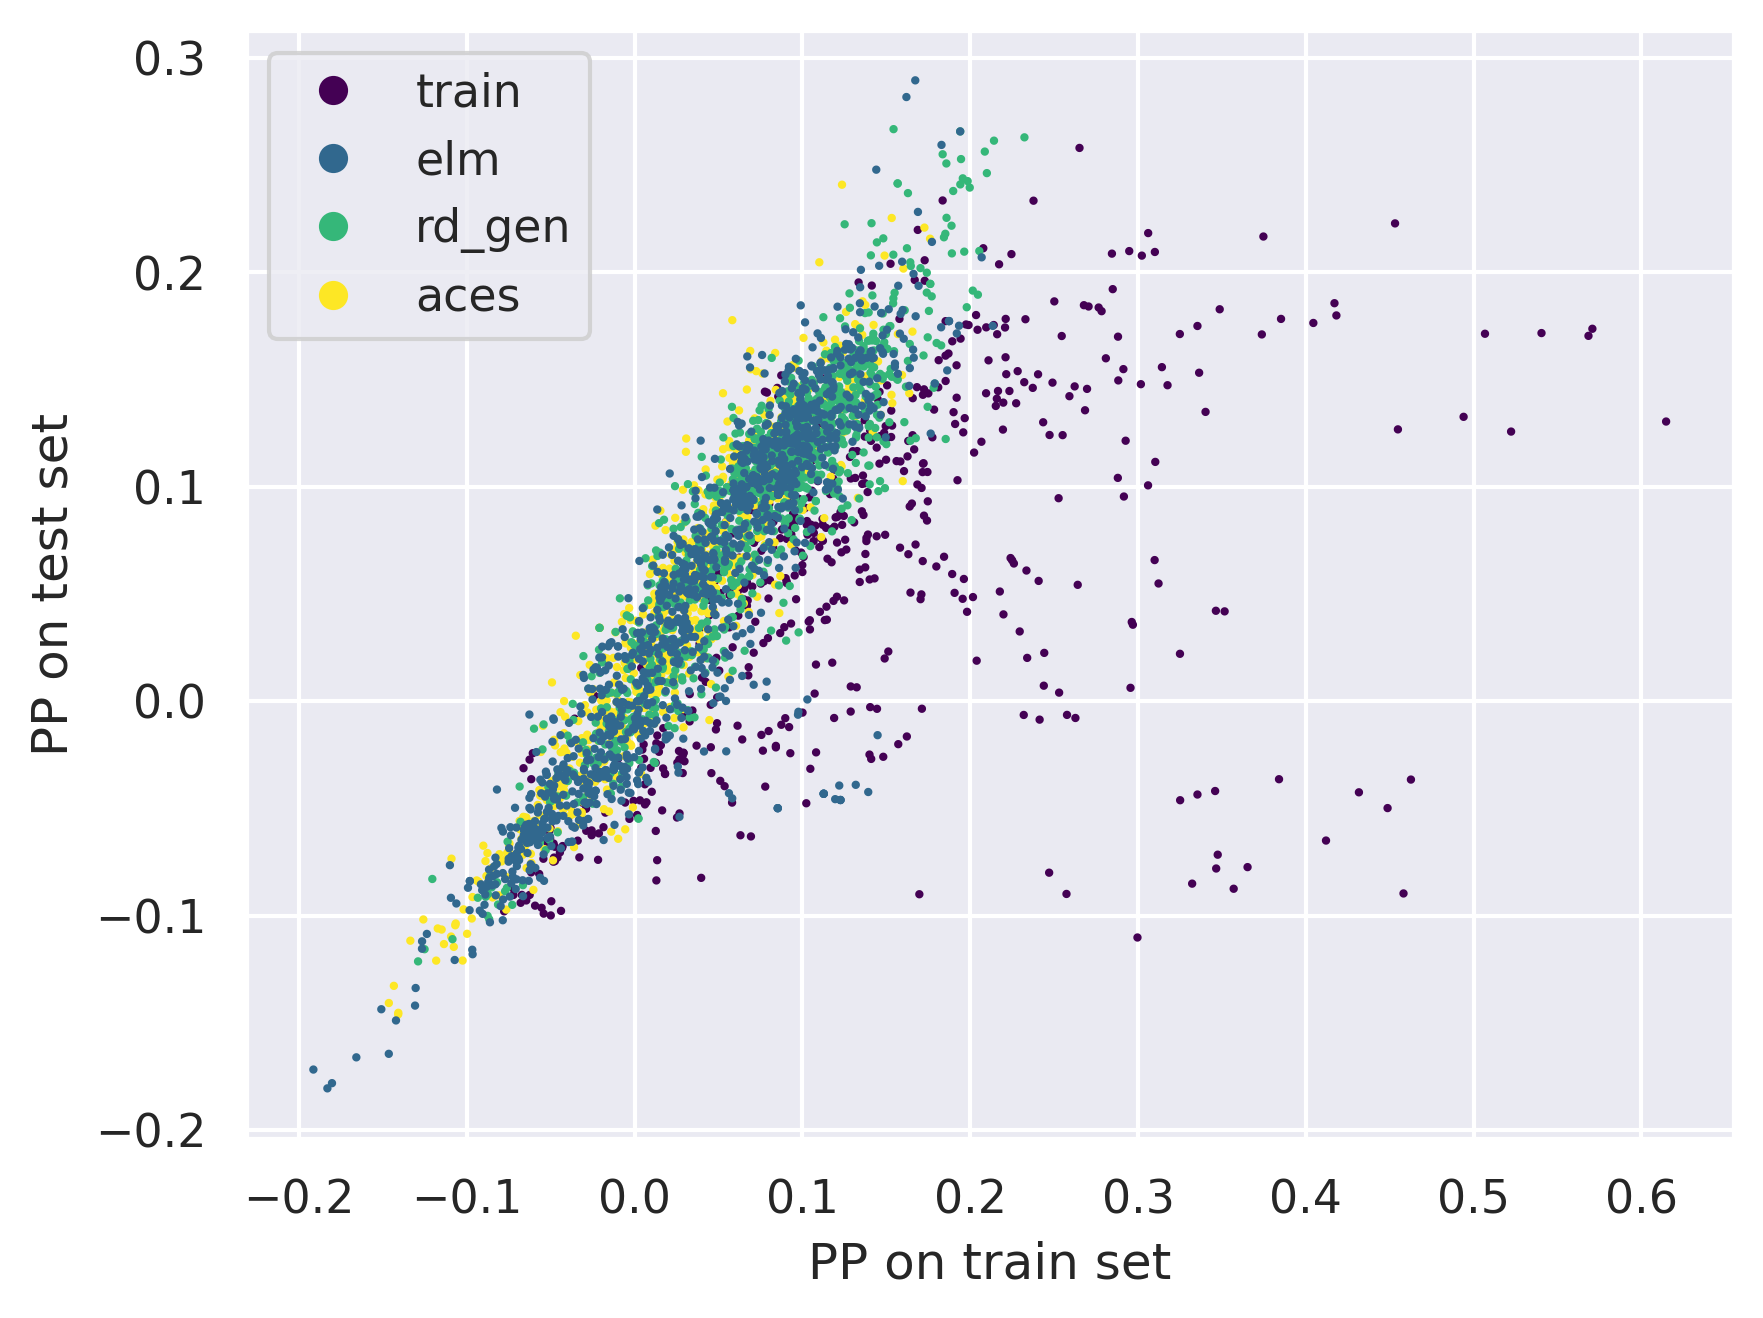

In [97]:
pp_avg_train = matrix_train.mean(-1)
pp_avg_test = matrix_test.mean(-1)
plt.figure(dpi=300)
plt.scatter(pp_avg_train, pp_avg_test, s=1, c=data_color)
plt.xlabel('PP on train set')
plt.ylabel('PP on test set')
handles = []
for name, c in colordict.items():
    handles.append(mlines.Line2D([], [], color=c, marker='o', linestyle='None', label=name))
plt.legend(handles=handles)

In [98]:
# average and std for all sets
train = [p for p in dataset_test_archive if p.origin == 'train']
elm = [p for p in dataset_test_archive if p.origin == 'elm']
aces = [p for p in dataset_test_archive if p.origin == 'aces']
rd_gen = [p for p in dataset_test_archive if p.origin == 'rd_gen']
print(f'train mean {np.mean([p.quality[quality_key] for p in train])}')
print(f'elm mean {np.mean([p.quality[quality_key] for p in elm])}')
print(f'aces mean {np.mean([p.quality[quality_key] for p in aces])}')
print(f'rd_gen mean {np.mean([p.quality[quality_key] for p in rd_gen])}')

train mean 0.05698135346184103
elm mean 0.05068398656866628
aces mean 0.04784571058443901
rd_gen mean 0.09043987850682902


In [83]:
# remove train set from dataset
looks_like_train_set = []
train_instructions = [p.instruction for p in train]
train_completions = [p.completion for p in train]
for p in dataset_train_archive:
    # if p.instruction.replace(' -> bool:', ':') in train_instructions:
    if p.completion in train_completions:
        looks_like_train_set.append(p)

In [84]:
len(looks_like_train_set)

708

In [76]:
set([p.origin for p in looks_like_train_set])

{'aces', 'elm', 'rd_gen', 'train'}

In [94]:
archive[-1]

{'name': 'Tutorial4:0',
 'sat': 'def sat(s: List[str]):\n    return len(set(s)) == 1000 and all((x.count("a") > x.count("b")) and (\'b\' in x) for x in s)',
 'ans_type': 'List[str]',
 'sol_header': 'def sol():',
 'sol_docstring': '    """Find a list of 1000 distinct strings which each have more \'a\'s than \'b\'s and at least one \'b\'."""',
 'sol_bodies': ['    return ["a" * (i + 2) + "b" for i in range(1000)]'],
 'module': 'tutorial.py',
 'notes': '',
 'weight': 1.0}

In [98]:
rd_gen[132].completion

"def g():\n    return ['a' * (i + 2) + 'b' for i in range(1000)]"

In [99]:
aces[132].completion

"def g():\n    return ['a' * (i + 2) + 'b' for i in range(1000)]"

In [102]:
elm[132].idx

'ELMMLP_132:0'

In [82]:
print(dataset_train_archive[576].instruction)

def f(s: str) -> bool:
    return set(s) <= set('18-+*/') and s.count('8') == 3 and (s.count('1') == 1) and (eval(s) == 63)


In [73]:
print(dataset_train_archive[5].instruction.replace(' -> bool:', ':') == dataset_train_archive[0].instruction)
print(dataset_train_archive[553].origin)

True
rd_gen


In [48]:
all(p.origin == 'train' for p in looks_like_train_set)

True

In [60]:
correlation, p_value = scipy.stats.pearsonr(pp_avg_train, pp_avg_test)
print("Pearson's correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson's correlation coefficient: 0.9588339573156338
P-value: 0.0


In [61]:
dataset_train_archive[-1]

Problem(idx='ACES_960:0', instruction="def f(solution, s='radar') -> bool:\n    return solution == solution[::-1]", completion="def g(s='radar'):\n    return s + s[-2::-1]", quality={'pp_diff': [-0.04200875759124756, 0.062496066093444824, 0.06155073642730713, 0.26557955145835876, 0.03922748565673828, -0.028494536876678467, -0.029305100440979004, -0.054722607135772705, 0.0038474202156066895, 0.08994287252426147, -0.09184378385543823, 0.3530771732330322, -0.10570383071899414, 0.04573237895965576, 0.08912765979766846, 0.033675432205200195, -0.016822755336761475, -0.018636703491210938, -0.005247235298156738, -0.012159645557403564, -0.03773379325866699, -0.01373755931854248, -0.017834246158599854, -0.03146308660507202, 0.0230330228805542, -0.051027894020080566, 0.006116747856140137, -0.003907680511474609, 0.09324818849563599, 0.09384119510650635, -0.12256962060928345, 0.22139471769332886, 0.04632014036178589, 0.013776540756225586, 0.1449134349822998, -0.035281479358673096, -0.06639337539672

In [62]:
ds = json.load(open('data/dataset.json'))

In [63]:
len(ds)

4138

In [64]:
dst = load_dataset(path_train_archive)

In [65]:
len(dst)

4138

In [66]:
i = 0
indices = []
for p, pp in zip(dst, ds):
    if quality_key in p.quality:
        indices.append(pp['origin'])

In [67]:
pp.keys()

dict_keys(['fitness', 'program_str', 'emb', 'explanation_emb', 'idx_generation', 'target_skills', 'puzzle_history', 'problem_func', 'solution_func', 'quality', 'description', 'is_valid', 'is_valid_explanation', 'name', 'origin'])

In [123]:
pp

{'fitness': 1.0,
 'program_str': '\nfrom typing import List\ndef f(nums: List[int]) -> bool:\n    if not nums:\n        return False\n    return all(n > 1 and all(n % i != 0 for i in range(2, int(n ** 0.5) + 1)) for n in nums)\ndef g(start=2, end=20):\n    return [num for num in range(start, end) if all(num % i != 0 for i in range(2, int(num ** 0.5) + 1))]\nassert f(g()) == True\n',
 'emb': [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'explanation_emb': 'The puzzle involves checking for prime numbers within a given range using a brute force approach.',
 'idx_generation': 10,
 'target_skills': [],
 'puzzle_history': ['from typing import List \ndef f(nums: List[int], tot=5359, n=11) -> bool:\n    return len(nums) == len(set(nums)) == n and sum(nums) == tot and all((i >= i % 2 > 0 for i in nums))\ndef g(tot = 5359, n = 11):\n    return list(range(1, 2 * n - 1, 2)) + [tot - sum(range(1, 2 * n - 1, 2))]\nassert f(g()) == True'],
 'problem_func': 'from typing import List\nd

In [110]:
matrix_train_o = torch.tensor([p.quality['pp_diff'] for p in dataset_train_archive])
matrix_test_o = torch.tensor([p.quality['pp_diff'] for p in dataset_test_archive])

Text(0, 0.5, 'normalized PP on train set')

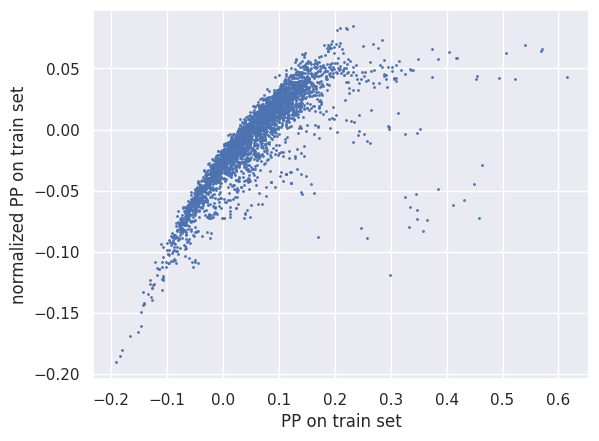

In [113]:
pp_avg_train = matrix_train.mean(-1)
pp_avg_train_o = matrix_train_o.mean(-1)
plt.scatter(pp_avg_train, pp_avg_train_o, s=1)
plt.xlabel('PP on train set')
plt.ylabel('normalized PP on train set')

Text(0, 0.5, 'normalized PP on test set')

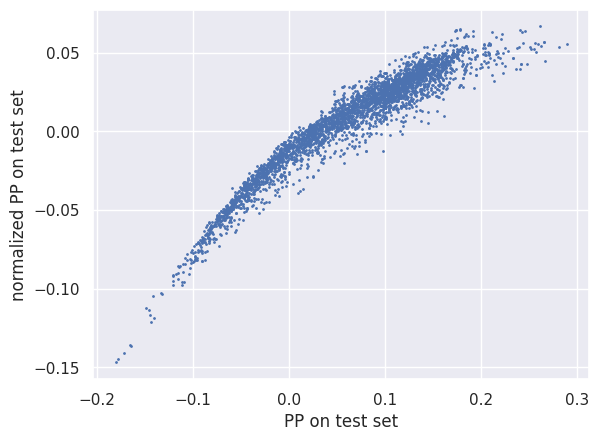

In [116]:
pp_avg_test = matrix_test.mean(-1)
pp_avg_test_o = matrix_test_o.mean(-1)
plt.scatter(pp_avg_test, pp_avg_test_o, s=1)
plt.xlabel('PP on test set')
plt.ylabel('normalized PP on test set')

In [7]:
# scratchpad
import json
from tqdm import tqdm

data_path = '/home/laetitia/work/code-eval/data/p3_pb_dataset.json'
d = json.load(open(data_path, 'r'))
d2 = json.load(open('/home/laetitia/work/code-eval/data/dataset.json', 'r'))
assert len(d) == len(d2)

In [4]:
for i in range(len(d)):
    for j in range(len(d)):
        if d2[j]['name'] == d[i]['idx']:
            if 'sol_docstring' in d2[i]:
                    descr = d2[i]['sol_docstring']
            else:
                    descr = d2[i]['description']
            d[i]['description'] = descr

In [9]:
print(d[1200]['description'])
print(d[1200]['instruction'])

['The puzzle involves checking if a given 9x9 Sudoku board is valid or not.']
def f(board: List[List[int]]) -> bool:

    def is_valid_unit(unit):
        unit = [num for num in unit if num != 0]
        return len(set(unit)) == len(unit)

    def is_valid_sudoku(board):
        for row in board:
            if not is_valid_unit(row):
                return False
        for col in zip(*board):
            if not is_valid_unit(col):
                return False
        for i in range(0, 9, 3):
            for j in range(0, 9, 3):
                square = [board[x][y] for x in range(i, i + 3) for y in range(j, j + 3)]
                if not is_valid_unit(square):
                    return False
        return True
    return is_valid_sudoku(board)


In [23]:
for i in range(len(d)):
    if 'sol_docstring' in d2[i]:
        dd[i]['description'] = d2[i]['sol_docstring']

In [11]:
d[0]['description']

'    """Find a string with 1000 \'o\'s but no two adjacent \'o\'s."""'

In [13]:
all(len(el['description']) >- 0 for el in d)


True

In [17]:
json.dump(d, open(data_path, 'w'))

In [20]:
dd = json.load(open('/home/laetitia/work/code-eval/data/high_quality_dataset_quality_puzzles_train_1_pp_diff.json', 'r'))

In [22]:
dd[10]['description']

''

In [24]:
json.dump(d, open('/home/laetitia/work/code-eval/data/high_quality_dataset_quality_puzzles_train_1_pp_diff.json', 'w'))